# Research Notebook for Churn Prediction
<b>AI300 - Adrian Chan</b>

<h3> Import Dataset

In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [23]:
# Data Preparation

df = pd.read_csv("data/combined_table.csv")

df

,account_id,customer_id,tenure_months,num_referrals,has_multiple_lines,total_monthly_fee,total_refunds,churn_label,zip_code,age,gender,area_id
0,BFIN-DLMOA,0013-EXCHZ,3,3,No,83.90,0.00,Yes,93010,75,Female,607
1,AFEO-XOOCP,0014-BMAQU,63,8,Yes,84.65,0.00,No,94558,52,Male,963
2,DEMQ-MFXWC,0016-QLJIS,65,3,Yes,90.45,0.00,No,95681,43,Female,1390
3,AIPP-VTDXJ,0019-EFAEP,72,0,Yes,101.30,0.00,No,91942,32,Female,303
4,CJHA-SRKIB,0019-GFNTW,56,0,No,45.05,0.00,No,93441,39,Female,716
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,XFNW-OGLLY,9412-ARGBX,48,0,No,95.50,0.00,Yes,90241,47,Female,72
7039,SVZS-SEWJU,9522-ZSINC,13,0,No,19.95,0.00,No,95409,34,Male,1226
7040,SENC-XOATR,9524-EGPJC,18,0,Yes,90.10,48.26,Yes,94595,33,Female,991
7041,CYDP-LCTZB,9975-SKRNR,1,0,No,18.90,0.00,No,96126,24,Male,1611


In [24]:
print(df.shape)

(7043, 12)


<h3> Data Cleaning and Feature Engineering 

In [25]:
df.isnull().sum()

account_id             0
customer_id            0
tenure_months          0
num_referrals          0
has_multiple_lines     0
total_monthly_fee      0
total_refunds          0
churn_label           52
zip_code               0
age                    0
gender                 0
area_id                0
dtype: int64

In [26]:
df_updated = df.dropna()
df_updated

,account_id,customer_id,tenure_months,num_referrals,has_multiple_lines,total_monthly_fee,total_refunds,churn_label,zip_code,age,gender,area_id
0,BFIN-DLMOA,0013-EXCHZ,3,3,No,83.90,0.00,Yes,93010,75,Female,607
1,AFEO-XOOCP,0014-BMAQU,63,8,Yes,84.65,0.00,No,94558,52,Male,963
2,DEMQ-MFXWC,0016-QLJIS,65,3,Yes,90.45,0.00,No,95681,43,Female,1390
3,AIPP-VTDXJ,0019-EFAEP,72,0,Yes,101.30,0.00,No,91942,32,Female,303
4,CJHA-SRKIB,0019-GFNTW,56,0,No,45.05,0.00,No,93441,39,Female,716
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,XFNW-OGLLY,9412-ARGBX,48,0,No,95.50,0.00,Yes,90241,47,Female,72
7039,SVZS-SEWJU,9522-ZSINC,13,0,No,19.95,0.00,No,95409,34,Male,1226
7040,SENC-XOATR,9524-EGPJC,18,0,Yes,90.10,48.26,Yes,94595,33,Female,991
7041,CYDP-LCTZB,9975-SKRNR,1,0,No,18.90,0.00,No,96126,24,Male,1611


In [27]:
df_updated['churn_label'] = df['churn_label'].map({'Yes': 1, 'No': 0})
df_updated['has_multiple_lines'] = df['has_multiple_lines'].map({'Yes': 1, 'No': 0})

df_updated

,account_id,customer_id,tenure_months,num_referrals,has_multiple_lines,total_monthly_fee,total_refunds,churn_label,zip_code,age,gender,area_id
0,BFIN-DLMOA,0013-EXCHZ,3,3,0,83.90,0.00,1.0,93010,75,Female,607
1,AFEO-XOOCP,0014-BMAQU,63,8,1,84.65,0.00,0.0,94558,52,Male,963
2,DEMQ-MFXWC,0016-QLJIS,65,3,1,90.45,0.00,0.0,95681,43,Female,1390
3,AIPP-VTDXJ,0019-EFAEP,72,0,1,101.30,0.00,0.0,91942,32,Female,303
4,CJHA-SRKIB,0019-GFNTW,56,0,0,45.05,0.00,0.0,93441,39,Female,716
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,XFNW-OGLLY,9412-ARGBX,48,0,0,95.50,0.00,1.0,90241,47,Female,72
7039,SVZS-SEWJU,9522-ZSINC,13,0,0,19.95,0.00,0.0,95409,34,Male,1226
7040,SENC-XOATR,9524-EGPJC,18,0,1,90.10,48.26,1.0,94595,33,Female,991
7041,CYDP-LCTZB,9975-SKRNR,1,0,0,18.90,0.00,0.0,96126,24,Male,1611


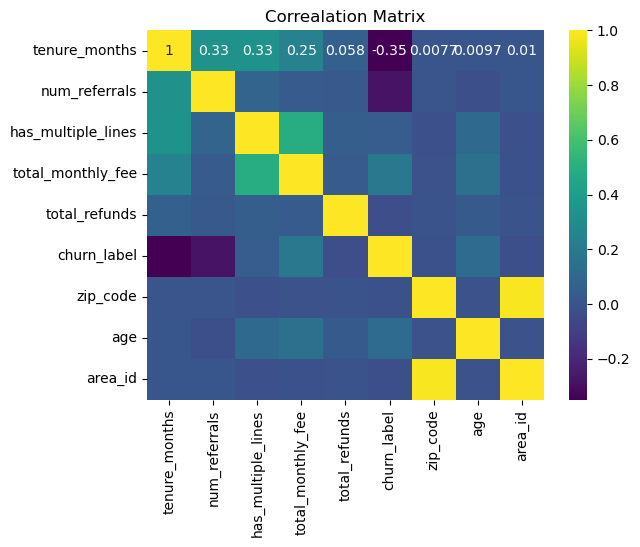

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_updated.corr()

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correalation Matrix')

plt.show()

In [29]:
import plotly.express as px

fig = px.box(df_updated, x="age", y="total_monthly_fee", color="churn_label", notched=True, width=3000, height=800)

fig.show()

In [30]:
import plotly.express as px
fig = px.scatter(df_updated, x="total_monthly_fee", y="tenure_months", color="churn_label")
fig.show()

<h3> Experimenting with Model No. 1 - CatBoost

In [31]:
from sklearn.model_selection import train_test_split
import catboost as cb

features_cb = ['tenure_months',
              'num_referrals',
              'has_multiple_lines',
              'total_monthly_fee',
              'total_refunds',
              'zip_code',
              'age',
              'area_id']

X1 = df_updated[features_cb]
y1 = df_updated['churn_label']

model_cb = cb.CatBoostClassifier(
    iterations = 1000, 
    learning_rate = 0.1,
    depth = 6,
    loss_function='Logloss',
    eval_metric='AUC'
)

#Split the data into training and testing sets
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

model_cb.fit(X1_train, y1_train, eval_set=(X1_val, y1_val))

auc_score = model_cb.best_score_['validation']['AUC']

print("AUC Score:", auc_score)

0:	test: 0.8063567	best: 0.8063567 (0)	total: 18.9ms	remaining: 18.9s
1:	test: 0.8246865	best: 0.8246865 (1)	total: 23.8ms	remaining: 11.9s
2:	test: 0.8353149	best: 0.8353149 (2)	total: 28.9ms	remaining: 9.59s
3:	test: 0.8391081	best: 0.8391081 (3)	total: 32.8ms	remaining: 8.18s
4:	test: 0.8389646	best: 0.8391081 (3)	total: 37.4ms	remaining: 7.44s
5:	test: 0.8409804	best: 0.8409804 (5)	total: 41.9ms	remaining: 6.95s
6:	test: 0.8419509	best: 0.8419509 (6)	total: 45.7ms	remaining: 6.49s
7:	test: 0.8431213	best: 0.8431213 (7)	total: 52.7ms	remaining: 6.54s
8:	test: 0.8474362	best: 0.8474362 (8)	total: 57.5ms	remaining: 6.33s
9:	test: 0.8492385	best: 0.8492385 (9)	total: 61.7ms	remaining: 6.11s
10:	test: 0.8491940	best: 0.8492385 (9)	total: 65.8ms	remaining: 5.92s
11:	test: 0.8503460	best: 0.8503460 (11)	total: 69.8ms	remaining: 5.74s
12:	test: 0.8527537	best: 0.8527537 (12)	total: 73.6ms	remaining: 5.59s
13:	test: 0.8538386	best: 0.8538386 (13)	total: 77.3ms	remaining: 5.45s
14:	test: 0.8

132:	test: 0.8670193	best: 0.8687458 (92)	total: 631ms	remaining: 4.11s
133:	test: 0.8671842	best: 0.8687458 (92)	total: 636ms	remaining: 4.11s
134:	test: 0.8671403	best: 0.8687458 (92)	total: 640ms	remaining: 4.1s
135:	test: 0.8668865	best: 0.8687458 (92)	total: 644ms	remaining: 4.09s
136:	test: 0.8667567	best: 0.8687458 (92)	total: 649ms	remaining: 4.09s
137:	test: 0.8668385	best: 0.8687458 (92)	total: 655ms	remaining: 4.09s
138:	test: 0.8669749	best: 0.8687458 (92)	total: 659ms	remaining: 4.08s
139:	test: 0.8668871	best: 0.8687458 (92)	total: 663ms	remaining: 4.08s
140:	test: 0.8668231	best: 0.8687458 (92)	total: 668ms	remaining: 4.07s
141:	test: 0.8665741	best: 0.8687458 (92)	total: 673ms	remaining: 4.07s
142:	test: 0.8666583	best: 0.8687458 (92)	total: 679ms	remaining: 4.07s
143:	test: 0.8666583	best: 0.8687458 (92)	total: 684ms	remaining: 4.07s
144:	test: 0.8666275	best: 0.8687458 (92)	total: 690ms	remaining: 4.07s
145:	test: 0.8665397	best: 0.8687458 (92)	total: 693ms	remaining:

270:	test: 0.8651085	best: 0.8687458 (92)	total: 1.24s	remaining: 3.33s
271:	test: 0.8650824	best: 0.8687458 (92)	total: 1.24s	remaining: 3.32s
272:	test: 0.8650658	best: 0.8687458 (92)	total: 1.25s	remaining: 3.31s
273:	test: 0.8649864	best: 0.8687458 (92)	total: 1.25s	remaining: 3.31s
274:	test: 0.8651429	best: 0.8687458 (92)	total: 1.25s	remaining: 3.31s
275:	test: 0.8651109	best: 0.8687458 (92)	total: 1.26s	remaining: 3.31s
276:	test: 0.8651144	best: 0.8687458 (92)	total: 1.26s	remaining: 3.3s
277:	test: 0.8651725	best: 0.8687458 (92)	total: 1.27s	remaining: 3.3s
278:	test: 0.8653065	best: 0.8687458 (92)	total: 1.27s	remaining: 3.29s
279:	test: 0.8652342	best: 0.8687458 (92)	total: 1.28s	remaining: 3.29s
280:	test: 0.8651607	best: 0.8687458 (92)	total: 1.28s	remaining: 3.28s
281:	test: 0.8652793	best: 0.8687458 (92)	total: 1.28s	remaining: 3.27s
282:	test: 0.8652473	best: 0.8687458 (92)	total: 1.29s	remaining: 3.27s
283:	test: 0.8653492	best: 0.8687458 (92)	total: 1.29s	remaining: 

400:	test: 0.8626256	best: 0.8687458 (92)	total: 1.83s	remaining: 2.74s
401:	test: 0.8627833	best: 0.8687458 (92)	total: 1.84s	remaining: 2.74s
402:	test: 0.8628283	best: 0.8687458 (92)	total: 1.84s	remaining: 2.73s
403:	test: 0.8628852	best: 0.8687458 (92)	total: 1.86s	remaining: 2.74s
404:	test: 0.8628722	best: 0.8687458 (92)	total: 1.87s	remaining: 2.74s
405:	test: 0.8628307	best: 0.8687458 (92)	total: 1.88s	remaining: 2.75s
406:	test: 0.8629860	best: 0.8687458 (92)	total: 1.88s	remaining: 2.74s
407:	test: 0.8628390	best: 0.8687458 (92)	total: 1.89s	remaining: 2.74s
408:	test: 0.8627738	best: 0.8687458 (92)	total: 1.89s	remaining: 2.73s
409:	test: 0.8628888	best: 0.8687458 (92)	total: 1.9s	remaining: 2.73s
410:	test: 0.8628129	best: 0.8687458 (92)	total: 1.9s	remaining: 2.72s
411:	test: 0.8629303	best: 0.8687458 (92)	total: 1.91s	remaining: 2.72s
412:	test: 0.8628224	best: 0.8687458 (92)	total: 1.91s	remaining: 2.71s
413:	test: 0.8628414	best: 0.8687458 (92)	total: 1.91s	remaining: 

558:	test: 0.8607995	best: 0.8687458 (92)	total: 2.43s	remaining: 1.92s
559:	test: 0.8609228	best: 0.8687458 (92)	total: 2.44s	remaining: 1.91s
560:	test: 0.8608849	best: 0.8687458 (92)	total: 2.44s	remaining: 1.91s
561:	test: 0.8609240	best: 0.8687458 (92)	total: 2.44s	remaining: 1.9s
562:	test: 0.8609157	best: 0.8687458 (92)	total: 2.45s	remaining: 1.9s
563:	test: 0.8608470	best: 0.8687458 (92)	total: 2.45s	remaining: 1.9s
564:	test: 0.8608588	best: 0.8687458 (92)	total: 2.46s	remaining: 1.89s
565:	test: 0.8608161	best: 0.8687458 (92)	total: 2.46s	remaining: 1.89s
566:	test: 0.8606359	best: 0.8687458 (92)	total: 2.46s	remaining: 1.88s
567:	test: 0.8606703	best: 0.8687458 (92)	total: 2.46s	remaining: 1.88s
568:	test: 0.8607106	best: 0.8687458 (92)	total: 2.47s	remaining: 1.87s
569:	test: 0.8607462	best: 0.8687458 (92)	total: 2.47s	remaining: 1.86s
570:	test: 0.8607924	best: 0.8687458 (92)	total: 2.48s	remaining: 1.86s
571:	test: 0.8607770	best: 0.8687458 (92)	total: 2.48s	remaining: 1

724:	test: 0.8591905	best: 0.8687458 (92)	total: 3.02s	remaining: 1.15s
725:	test: 0.8591561	best: 0.8687458 (92)	total: 3.02s	remaining: 1.14s
726:	test: 0.8591490	best: 0.8687458 (92)	total: 3.03s	remaining: 1.14s
727:	test: 0.8591454	best: 0.8687458 (92)	total: 3.03s	remaining: 1.13s
728:	test: 0.8590292	best: 0.8687458 (92)	total: 3.04s	remaining: 1.13s
729:	test: 0.8590197	best: 0.8687458 (92)	total: 3.04s	remaining: 1.12s
730:	test: 0.8590162	best: 0.8687458 (92)	total: 3.04s	remaining: 1.12s
731:	test: 0.8589818	best: 0.8687458 (92)	total: 3.04s	remaining: 1.11s
732:	test: 0.8589782	best: 0.8687458 (92)	total: 3.05s	remaining: 1.11s
733:	test: 0.8589391	best: 0.8687458 (92)	total: 3.05s	remaining: 1.11s
734:	test: 0.8588739	best: 0.8687458 (92)	total: 3.06s	remaining: 1.1s
735:	test: 0.8589403	best: 0.8687458 (92)	total: 3.06s	remaining: 1.1s
736:	test: 0.8588644	best: 0.8687458 (92)	total: 3.06s	remaining: 1.09s
737:	test: 0.8587494	best: 0.8687458 (92)	total: 3.07s	remaining: 

883:	test: 0.8571178	best: 0.8687458 (92)	total: 3.6s	remaining: 472ms
884:	test: 0.8569897	best: 0.8687458 (92)	total: 3.6s	remaining: 468ms
885:	test: 0.8569174	best: 0.8687458 (92)	total: 3.61s	remaining: 464ms
886:	test: 0.8570241	best: 0.8687458 (92)	total: 3.61s	remaining: 460ms
887:	test: 0.8569589	best: 0.8687458 (92)	total: 3.62s	remaining: 456ms
888:	test: 0.8568688	best: 0.8687458 (92)	total: 3.62s	remaining: 452ms
889:	test: 0.8569293	best: 0.8687458 (92)	total: 3.62s	remaining: 448ms
890:	test: 0.8570822	best: 0.8687458 (92)	total: 3.63s	remaining: 444ms
891:	test: 0.8571474	best: 0.8687458 (92)	total: 3.63s	remaining: 440ms
892:	test: 0.8571213	best: 0.8687458 (92)	total: 3.63s	remaining: 436ms
893:	test: 0.8574047	best: 0.8687458 (92)	total: 3.64s	remaining: 431ms
894:	test: 0.8573727	best: 0.8687458 (92)	total: 3.64s	remaining: 427ms
895:	test: 0.8574439	best: 0.8687458 (92)	total: 3.65s	remaining: 423ms
896:	test: 0.8574866	best: 0.8687458 (92)	total: 3.65s	remaining: 

<h3> Experimenting with Model No. 2 - XGBoost

In [32]:
# !pip install xgboost==1.7.6

In [33]:
# from xgboost import XGBClassifier

features_xg = ['tenure_months',
              'num_referrals',
              'has_multiple_lines',
              'total_monthly_fee',
              'total_refunds',
              'zip_code',
              'age',
              'area_id']

X2 = df_updated[features_xg]
y2 = df_updated['churn_label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Instantiate the model object
model_xg = XGBClassifier(learning_rate=0.1, random_state=42)

# Fit the model with the training data
model_xg.fit(X2_train, y2_train)

# Predict the target on the test data set
y2_predict = model_xg.predict(X2_test)
# y2_predict.proba = model_xg.predict_proba(X2_test)[:, 1]

auc_score_2 = metrics.roc_auc_score(y2_test, y2_predict)
# auc_score_2_1 = metrics.roc_auc_score(y2_test, y2_predict_proba)
print(f'AUC for XGBoost:', auc_score_2)
# print(f'AUC for XGBoost:', auc_score_2_1)

AUC for XGBoost: 0.7319316252288487


<h3> Selecting CatBoost as final model 

In [35]:
from sklearn.model_selection import train_test_split
import catboost as cb

# X = df_updated.drop('churn_label', axis=1)
# y = df_updated('churn_label')

features = ['tenure_months',
              'num_referrals',
              'has_multiple_lines',
              'total_monthly_fee',
              'total_refunds',
              'zip_code',
              'age',
              'area_id']

X = df_updated[features]
y = df_updated['churn_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = cb.CatBoostClassifier(
    iterations = 1000, 
    learning_rate = 0.1,
    depth = 6,
    loss_function='Logloss',
    eval_metric='AUC'
)

model.fit(X_train, y_train)

0:	total: 3.11ms	remaining: 3.11s
1:	total: 6.05ms	remaining: 3.02s
2:	total: 10.1ms	remaining: 3.35s
3:	total: 13.6ms	remaining: 3.38s
4:	total: 17ms	remaining: 3.39s
5:	total: 20.7ms	remaining: 3.43s
6:	total: 24ms	remaining: 3.41s
7:	total: 27.1ms	remaining: 3.36s
8:	total: 30.3ms	remaining: 3.33s
9:	total: 33.3ms	remaining: 3.29s
10:	total: 36.6ms	remaining: 3.29s
11:	total: 39.9ms	remaining: 3.28s
12:	total: 43ms	remaining: 3.26s
13:	total: 45.9ms	remaining: 3.23s
14:	total: 48.8ms	remaining: 3.21s
15:	total: 51.9ms	remaining: 3.19s
16:	total: 55.4ms	remaining: 3.2s
17:	total: 57.4ms	remaining: 3.13s
18:	total: 60.7ms	remaining: 3.13s
19:	total: 63.7ms	remaining: 3.12s
20:	total: 66.7ms	remaining: 3.11s
21:	total: 69.9ms	remaining: 3.11s
22:	total: 72.8ms	remaining: 3.09s
23:	total: 75.8ms	remaining: 3.08s
24:	total: 79ms	remaining: 3.08s
25:	total: 82ms	remaining: 3.07s
26:	total: 85.4ms	remaining: 3.08s
27:	total: 88.4ms	remaining: 3.07s
28:	total: 91.5ms	remaining: 3.06s
29:	to

242:	total: 789ms	remaining: 2.46s
243:	total: 792ms	remaining: 2.45s
244:	total: 795ms	remaining: 2.45s
245:	total: 799ms	remaining: 2.45s
246:	total: 803ms	remaining: 2.45s
247:	total: 806ms	remaining: 2.44s
248:	total: 809ms	remaining: 2.44s
249:	total: 812ms	remaining: 2.44s
250:	total: 815ms	remaining: 2.43s
251:	total: 819ms	remaining: 2.43s
252:	total: 822ms	remaining: 2.42s
253:	total: 825ms	remaining: 2.42s
254:	total: 828ms	remaining: 2.42s
255:	total: 831ms	remaining: 2.42s
256:	total: 834ms	remaining: 2.41s
257:	total: 838ms	remaining: 2.41s
258:	total: 841ms	remaining: 2.4s
259:	total: 844ms	remaining: 2.4s
260:	total: 848ms	remaining: 2.4s
261:	total: 851ms	remaining: 2.4s
262:	total: 854ms	remaining: 2.39s
263:	total: 857ms	remaining: 2.39s
264:	total: 860ms	remaining: 2.39s
265:	total: 864ms	remaining: 2.38s
266:	total: 867ms	remaining: 2.38s
267:	total: 870ms	remaining: 2.38s
268:	total: 873ms	remaining: 2.37s
269:	total: 876ms	remaining: 2.37s
270:	total: 879ms	remain

529:	total: 1.77s	remaining: 1.57s
530:	total: 1.77s	remaining: 1.56s
531:	total: 1.77s	remaining: 1.56s
532:	total: 1.78s	remaining: 1.56s
533:	total: 1.78s	remaining: 1.56s
534:	total: 1.79s	remaining: 1.55s
535:	total: 1.79s	remaining: 1.55s
536:	total: 1.79s	remaining: 1.55s
537:	total: 1.8s	remaining: 1.54s
538:	total: 1.8s	remaining: 1.54s
539:	total: 1.81s	remaining: 1.54s
540:	total: 1.81s	remaining: 1.54s
541:	total: 1.81s	remaining: 1.53s
542:	total: 1.82s	remaining: 1.53s
543:	total: 1.82s	remaining: 1.53s
544:	total: 1.83s	remaining: 1.52s
545:	total: 1.83s	remaining: 1.52s
546:	total: 1.83s	remaining: 1.52s
547:	total: 1.84s	remaining: 1.51s
548:	total: 1.84s	remaining: 1.51s
549:	total: 1.84s	remaining: 1.51s
550:	total: 1.85s	remaining: 1.5s
551:	total: 1.85s	remaining: 1.5s
552:	total: 1.85s	remaining: 1.5s
553:	total: 1.86s	remaining: 1.5s
554:	total: 1.86s	remaining: 1.49s
555:	total: 1.86s	remaining: 1.49s
556:	total: 1.87s	remaining: 1.49s
557:	total: 1.87s	remainin

802:	total: 2.79s	remaining: 684ms
803:	total: 2.79s	remaining: 681ms
804:	total: 2.79s	remaining: 677ms
805:	total: 2.8s	remaining: 674ms
806:	total: 2.8s	remaining: 670ms
807:	total: 2.81s	remaining: 667ms
808:	total: 2.81s	remaining: 664ms
809:	total: 2.81s	remaining: 661ms
810:	total: 2.82s	remaining: 657ms
811:	total: 2.82s	remaining: 654ms
812:	total: 2.83s	remaining: 650ms
813:	total: 2.83s	remaining: 647ms
814:	total: 2.84s	remaining: 644ms
815:	total: 2.84s	remaining: 641ms
816:	total: 2.84s	remaining: 637ms
817:	total: 2.85s	remaining: 634ms
818:	total: 2.85s	remaining: 631ms
819:	total: 2.86s	remaining: 627ms
820:	total: 2.86s	remaining: 624ms
821:	total: 2.86s	remaining: 620ms
822:	total: 2.87s	remaining: 617ms
823:	total: 2.87s	remaining: 613ms
824:	total: 2.88s	remaining: 610ms
825:	total: 2.88s	remaining: 607ms
826:	total: 2.88s	remaining: 603ms
827:	total: 2.89s	remaining: 600ms
828:	total: 2.89s	remaining: 597ms
829:	total: 2.9s	remaining: 593ms
830:	total: 2.9s	remain

<h3> Hyperparameter Tuning for CatBoost

In [37]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier 

# Assuming you have your training data (X_train, y_train) prepared

# Create a CatBoostClassifier instance
model_cb_rscv = CatBoostClassifier()

# Define the hyperparameter grid
param_grid = {
    'iterations': np.arange(100, 1000, 100),
    'learning_rate': np.logspace(-3, 0, 10),
    'depth': np.arange(3, 10),
    'l2_leaf_reg': np.logspace(-3, 0, 10),
    'loss_function': ['Logloss', 'CrossEntropy']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model_cb_rscv,
    param_distributions=param_grid,
    n_iter=10,  # Number of iterations
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    random_state=42  # Maintaining random state for consistency
)

# Fit the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

0:	learn: 0.6738032	total: 3.85ms	remaining: 381ms
1:	learn: 0.6561287	total: 7.52ms	remaining: 369ms
2:	learn: 0.6401486	total: 10.6ms	remaining: 342ms
3:	learn: 0.6245460	total: 13ms	remaining: 312ms
4:	learn: 0.6094349	total: 15.9ms	remaining: 303ms
5:	learn: 0.5956133	total: 18.5ms	remaining: 290ms
6:	learn: 0.5843792	total: 21.1ms	remaining: 280ms
7:	learn: 0.5726462	total: 23.9ms	remaining: 275ms
8:	learn: 0.5616041	total: 26.7ms	remaining: 270ms
9:	learn: 0.5515344	total: 29.2ms	remaining: 263ms
10:	learn: 0.5419296	total: 31.9ms	remaining: 258ms
11:	learn: 0.5327710	total: 34.8ms	remaining: 255ms
12:	learn: 0.5234244	total: 37.6ms	remaining: 252ms
13:	learn: 0.5156208	total: 39.9ms	remaining: 245ms
14:	learn: 0.5078579	total: 42.2ms	remaining: 239ms
15:	learn: 0.5004963	total: 44.6ms	remaining: 234ms
16:	learn: 0.4939027	total: 47.1ms	remaining: 230ms
17:	learn: 0.4883836	total: 49.5ms	remaining: 225ms
18:	learn: 0.4819981	total: 52ms	remaining: 222ms
19:	learn: 0.4765727	total

0:	learn: 0.6728659	total: 5.45ms	remaining: 540ms
1:	learn: 0.6547854	total: 11ms	remaining: 538ms
2:	learn: 0.6378749	total: 16.1ms	remaining: 520ms
3:	learn: 0.6222298	total: 21.6ms	remaining: 518ms
4:	learn: 0.6070356	total: 27ms	remaining: 512ms
5:	learn: 0.5930963	total: 30.6ms	remaining: 479ms
6:	learn: 0.5800082	total: 35.4ms	remaining: 470ms
7:	learn: 0.5687225	total: 38.9ms	remaining: 447ms
8:	learn: 0.5578037	total: 44ms	remaining: 444ms
9:	learn: 0.5473497	total: 48.6ms	remaining: 437ms
10:	learn: 0.5384553	total: 51.8ms	remaining: 419ms
11:	learn: 0.5292183	total: 55.3ms	remaining: 406ms
12:	learn: 0.5211146	total: 58.9ms	remaining: 394ms
13:	learn: 0.5132064	total: 63.1ms	remaining: 388ms
14:	learn: 0.5058109	total: 67.1ms	remaining: 380ms
15:	learn: 0.4978640	total: 70.2ms	remaining: 368ms
16:	learn: 0.4926314	total: 72.5ms	remaining: 354ms
17:	learn: 0.4869526	total: 75.2ms	remaining: 343ms
18:	learn: 0.4801724	total: 79ms	remaining: 337ms
19:	learn: 0.4743393	total: 81

75:	learn: 0.3590677	total: 239ms	remaining: 75.6ms
76:	learn: 0.3582474	total: 243ms	remaining: 72.6ms
77:	learn: 0.3576363	total: 247ms	remaining: 69.6ms
78:	learn: 0.3564205	total: 251ms	remaining: 66.7ms
79:	learn: 0.3558097	total: 254ms	remaining: 63.6ms
80:	learn: 0.3548426	total: 260ms	remaining: 61ms
81:	learn: 0.3538137	total: 263ms	remaining: 57.8ms
82:	learn: 0.3528313	total: 267ms	remaining: 54.6ms
83:	learn: 0.3520343	total: 270ms	remaining: 51.4ms
84:	learn: 0.3511923	total: 273ms	remaining: 48.2ms
85:	learn: 0.3503396	total: 276ms	remaining: 44.9ms
86:	learn: 0.3491947	total: 279ms	remaining: 41.7ms
87:	learn: 0.3486488	total: 282ms	remaining: 38.5ms
88:	learn: 0.3478775	total: 286ms	remaining: 35.3ms
89:	learn: 0.3472219	total: 289ms	remaining: 32.1ms
90:	learn: 0.3467680	total: 293ms	remaining: 29ms
91:	learn: 0.3463923	total: 296ms	remaining: 25.7ms
92:	learn: 0.3459237	total: 300ms	remaining: 22.6ms
93:	learn: 0.3453273	total: 304ms	remaining: 19.4ms
94:	learn: 0.344

94:	learn: 0.6421869	total: 225ms	remaining: 961ms
95:	learn: 0.6417237	total: 228ms	remaining: 959ms
96:	learn: 0.6410726	total: 230ms	remaining: 957ms
97:	learn: 0.6406573	total: 232ms	remaining: 954ms
98:	learn: 0.6402168	total: 235ms	remaining: 951ms
99:	learn: 0.6397601	total: 237ms	remaining: 947ms
100:	learn: 0.6392169	total: 239ms	remaining: 945ms
101:	learn: 0.6386775	total: 242ms	remaining: 942ms
102:	learn: 0.6381716	total: 244ms	remaining: 939ms
103:	learn: 0.6376690	total: 246ms	remaining: 937ms
104:	learn: 0.6371604	total: 249ms	remaining: 935ms
105:	learn: 0.6366877	total: 251ms	remaining: 933ms
106:	learn: 0.6361827	total: 253ms	remaining: 930ms
107:	learn: 0.6357540	total: 255ms	remaining: 926ms
108:	learn: 0.6352617	total: 257ms	remaining: 922ms
109:	learn: 0.6347839	total: 259ms	remaining: 918ms
110:	learn: 0.6342977	total: 261ms	remaining: 915ms
111:	learn: 0.6337867	total: 263ms	remaining: 912ms
112:	learn: 0.6334038	total: 265ms	remaining: 908ms
113:	learn: 0.6329

271:	learn: 0.5741633	total: 601ms	remaining: 504ms
272:	learn: 0.5738193	total: 603ms	remaining: 501ms
273:	learn: 0.5734683	total: 605ms	remaining: 499ms
274:	learn: 0.5731730	total: 607ms	remaining: 496ms
275:	learn: 0.5728804	total: 608ms	remaining: 494ms
276:	learn: 0.5725710	total: 610ms	remaining: 491ms
277:	learn: 0.5722379	total: 612ms	remaining: 489ms
278:	learn: 0.5719407	total: 629ms	remaining: 498ms
279:	learn: 0.5716417	total: 632ms	remaining: 497ms
280:	learn: 0.5713070	total: 634ms	remaining: 494ms
281:	learn: 0.5710397	total: 636ms	remaining: 492ms
282:	learn: 0.5707696	total: 638ms	remaining: 489ms
283:	learn: 0.5704803	total: 639ms	remaining: 486ms
284:	learn: 0.5701451	total: 641ms	remaining: 484ms
285:	learn: 0.5698523	total: 643ms	remaining: 481ms
286:	learn: 0.5695737	total: 645ms	remaining: 479ms
287:	learn: 0.5692632	total: 647ms	remaining: 476ms
288:	learn: 0.5689679	total: 648ms	remaining: 473ms
289:	learn: 0.5686478	total: 650ms	remaining: 471ms
290:	learn: 

470:	learn: 0.5249714	total: 985ms	remaining: 60.7ms
471:	learn: 0.5247642	total: 988ms	remaining: 58.6ms
472:	learn: 0.5245002	total: 990ms	remaining: 56.5ms
473:	learn: 0.5243065	total: 992ms	remaining: 54.4ms
474:	learn: 0.5241292	total: 994ms	remaining: 52.3ms
475:	learn: 0.5238936	total: 996ms	remaining: 50.2ms
476:	learn: 0.5236582	total: 999ms	remaining: 48.2ms
477:	learn: 0.5234354	total: 1s	remaining: 46.1ms
478:	learn: 0.5232571	total: 1s	remaining: 44ms
479:	learn: 0.5230583	total: 1s	remaining: 41.9ms
480:	learn: 0.5228376	total: 1.01s	remaining: 39.8ms
481:	learn: 0.5226199	total: 1.01s	remaining: 37.7ms
482:	learn: 0.5224762	total: 1.01s	remaining: 35.6ms
483:	learn: 0.5222838	total: 1.01s	remaining: 33.5ms
484:	learn: 0.5220972	total: 1.01s	remaining: 31.4ms
485:	learn: 0.5218710	total: 1.02s	remaining: 29.3ms
486:	learn: 0.5217139	total: 1.02s	remaining: 27.2ms
487:	learn: 0.5215287	total: 1.02s	remaining: 25.1ms
488:	learn: 0.5213547	total: 1.02s	remaining: 23ms
489:	l

142:	learn: 0.6181562	total: 294ms	remaining: 735ms
143:	learn: 0.6178198	total: 297ms	remaining: 733ms
144:	learn: 0.6174170	total: 299ms	remaining: 731ms
145:	learn: 0.6170525	total: 300ms	remaining: 729ms
146:	learn: 0.6166414	total: 303ms	remaining: 727ms
147:	learn: 0.6161819	total: 305ms	remaining: 724ms
148:	learn: 0.6157633	total: 306ms	remaining: 722ms
149:	learn: 0.6154367	total: 309ms	remaining: 721ms
150:	learn: 0.6150500	total: 311ms	remaining: 718ms
151:	learn: 0.6147410	total: 313ms	remaining: 716ms
152:	learn: 0.6143450	total: 315ms	remaining: 714ms
153:	learn: 0.6138766	total: 317ms	remaining: 713ms
154:	learn: 0.6134267	total: 319ms	remaining: 710ms
155:	learn: 0.6129545	total: 321ms	remaining: 708ms
156:	learn: 0.6125774	total: 323ms	remaining: 706ms
157:	learn: 0.6122140	total: 325ms	remaining: 704ms
158:	learn: 0.6117754	total: 327ms	remaining: 702ms
159:	learn: 0.6114434	total: 329ms	remaining: 699ms
160:	learn: 0.6110706	total: 331ms	remaining: 696ms
161:	learn: 

307:	learn: 0.5613756	total: 670ms	remaining: 417ms
308:	learn: 0.5610974	total: 673ms	remaining: 416ms
309:	learn: 0.5609099	total: 675ms	remaining: 414ms
310:	learn: 0.5606014	total: 676ms	remaining: 411ms
311:	learn: 0.5602698	total: 679ms	remaining: 409ms
312:	learn: 0.5600067	total: 681ms	remaining: 407ms
313:	learn: 0.5596726	total: 685ms	remaining: 406ms
314:	learn: 0.5592830	total: 688ms	remaining: 404ms
315:	learn: 0.5589605	total: 690ms	remaining: 402ms
316:	learn: 0.5586276	total: 692ms	remaining: 399ms
317:	learn: 0.5583280	total: 694ms	remaining: 397ms
318:	learn: 0.5580668	total: 696ms	remaining: 395ms
319:	learn: 0.5578435	total: 698ms	remaining: 392ms
320:	learn: 0.5575715	total: 700ms	remaining: 390ms
321:	learn: 0.5573169	total: 702ms	remaining: 388ms
322:	learn: 0.5570000	total: 704ms	remaining: 386ms
323:	learn: 0.5567435	total: 706ms	remaining: 384ms
324:	learn: 0.5565183	total: 709ms	remaining: 382ms
325:	learn: 0.5562107	total: 711ms	remaining: 379ms
326:	learn: 

473:	learn: 0.5221666	total: 1.05s	remaining: 57.6ms
474:	learn: 0.5219849	total: 1.05s	remaining: 55.4ms
475:	learn: 0.5216971	total: 1.05s	remaining: 53.2ms
476:	learn: 0.5215018	total: 1.06s	remaining: 51ms
477:	learn: 0.5213224	total: 1.06s	remaining: 48.8ms
478:	learn: 0.5210658	total: 1.06s	remaining: 46.6ms
479:	learn: 0.5208107	total: 1.06s	remaining: 44.4ms
480:	learn: 0.5205786	total: 1.07s	remaining: 42.2ms
481:	learn: 0.5203428	total: 1.07s	remaining: 39.9ms
482:	learn: 0.5201577	total: 1.07s	remaining: 37.7ms
483:	learn: 0.5199783	total: 1.07s	remaining: 35.5ms
484:	learn: 0.5198348	total: 1.07s	remaining: 33.3ms
485:	learn: 0.5196480	total: 1.08s	remaining: 31ms
486:	learn: 0.5194872	total: 1.08s	remaining: 28.8ms
487:	learn: 0.5192713	total: 1.08s	remaining: 26.6ms
488:	learn: 0.5191075	total: 1.08s	remaining: 24.4ms
489:	learn: 0.5189679	total: 1.08s	remaining: 22.2ms
490:	learn: 0.5187487	total: 1.09s	remaining: 19.9ms
491:	learn: 0.5185991	total: 1.09s	remaining: 17.7

203:	learn: 0.5937668	total: 468ms	remaining: 679ms
204:	learn: 0.5934240	total: 470ms	remaining: 677ms
205:	learn: 0.5930760	total: 473ms	remaining: 675ms
206:	learn: 0.5927881	total: 475ms	remaining: 673ms
207:	learn: 0.5924921	total: 478ms	remaining: 670ms
208:	learn: 0.5921937	total: 480ms	remaining: 668ms
209:	learn: 0.5917346	total: 482ms	remaining: 666ms
210:	learn: 0.5913175	total: 485ms	remaining: 664ms
211:	learn: 0.5909838	total: 487ms	remaining: 661ms
212:	learn: 0.5906259	total: 489ms	remaining: 659ms
213:	learn: 0.5903453	total: 491ms	remaining: 657ms
214:	learn: 0.5899921	total: 494ms	remaining: 654ms
215:	learn: 0.5896359	total: 497ms	remaining: 654ms
216:	learn: 0.5893450	total: 500ms	remaining: 652ms
217:	learn: 0.5890806	total: 503ms	remaining: 651ms
218:	learn: 0.5888358	total: 505ms	remaining: 649ms
219:	learn: 0.5883360	total: 508ms	remaining: 647ms
220:	learn: 0.5879248	total: 511ms	remaining: 645ms
221:	learn: 0.5876532	total: 513ms	remaining: 643ms
222:	learn: 

386:	learn: 0.5392349	total: 844ms	remaining: 246ms
387:	learn: 0.5389555	total: 846ms	remaining: 244ms
388:	learn: 0.5386929	total: 848ms	remaining: 242ms
389:	learn: 0.5383727	total: 850ms	remaining: 240ms
390:	learn: 0.5381082	total: 852ms	remaining: 237ms
391:	learn: 0.5378572	total: 854ms	remaining: 235ms
392:	learn: 0.5376663	total: 856ms	remaining: 233ms
393:	learn: 0.5374315	total: 858ms	remaining: 231ms
394:	learn: 0.5371695	total: 860ms	remaining: 229ms
395:	learn: 0.5368892	total: 862ms	remaining: 226ms
396:	learn: 0.5366266	total: 865ms	remaining: 224ms
397:	learn: 0.5363947	total: 867ms	remaining: 222ms
398:	learn: 0.5361806	total: 868ms	remaining: 220ms
399:	learn: 0.5360310	total: 870ms	remaining: 217ms
400:	learn: 0.5358567	total: 872ms	remaining: 215ms
401:	learn: 0.5355741	total: 874ms	remaining: 213ms
402:	learn: 0.5353356	total: 875ms	remaining: 211ms
403:	learn: 0.5351271	total: 877ms	remaining: 208ms
404:	learn: 0.5348575	total: 879ms	remaining: 206ms
405:	learn: 

58:	learn: 0.6576062	total: 124ms	remaining: 929ms
59:	learn: 0.6570140	total: 127ms	remaining: 931ms
60:	learn: 0.6564229	total: 129ms	remaining: 928ms
61:	learn: 0.6558303	total: 131ms	remaining: 926ms
62:	learn: 0.6552263	total: 133ms	remaining: 924ms
63:	learn: 0.6547541	total: 135ms	remaining: 920ms
64:	learn: 0.6542720	total: 154ms	remaining: 1.03s
65:	learn: 0.6537785	total: 157ms	remaining: 1.03s
66:	learn: 0.6531953	total: 160ms	remaining: 1.03s
67:	learn: 0.6526107	total: 162ms	remaining: 1.03s
68:	learn: 0.6520470	total: 164ms	remaining: 1.02s
69:	learn: 0.6514763	total: 166ms	remaining: 1.02s
70:	learn: 0.6509235	total: 167ms	remaining: 1.01s
71:	learn: 0.6503384	total: 169ms	remaining: 1.01s
72:	learn: 0.6498287	total: 171ms	remaining: 1s
73:	learn: 0.6492489	total: 173ms	remaining: 997ms
74:	learn: 0.6486660	total: 175ms	remaining: 994ms
75:	learn: 0.6482069	total: 178ms	remaining: 991ms
76:	learn: 0.6477926	total: 180ms	remaining: 987ms
77:	learn: 0.6472406	total: 182ms	

246:	learn: 0.5759764	total: 515ms	remaining: 528ms
247:	learn: 0.5755828	total: 518ms	remaining: 526ms
248:	learn: 0.5752087	total: 520ms	remaining: 524ms
249:	learn: 0.5749355	total: 522ms	remaining: 522ms
250:	learn: 0.5746031	total: 524ms	remaining: 520ms
251:	learn: 0.5742766	total: 526ms	remaining: 517ms
252:	learn: 0.5740283	total: 528ms	remaining: 516ms
253:	learn: 0.5737350	total: 531ms	remaining: 514ms
254:	learn: 0.5734144	total: 533ms	remaining: 512ms
255:	learn: 0.5730558	total: 535ms	remaining: 510ms
256:	learn: 0.5727939	total: 537ms	remaining: 508ms
257:	learn: 0.5725276	total: 538ms	remaining: 505ms
258:	learn: 0.5721401	total: 540ms	remaining: 503ms
259:	learn: 0.5717416	total: 542ms	remaining: 501ms
260:	learn: 0.5714454	total: 545ms	remaining: 499ms
261:	learn: 0.5711649	total: 546ms	remaining: 496ms
262:	learn: 0.5708688	total: 548ms	remaining: 494ms
263:	learn: 0.5705525	total: 550ms	remaining: 492ms
264:	learn: 0.5701688	total: 552ms	remaining: 490ms
265:	learn: 

448:	learn: 0.5223914	total: 904ms	remaining: 103ms
449:	learn: 0.5221791	total: 907ms	remaining: 101ms
450:	learn: 0.5219317	total: 909ms	remaining: 98.7ms
451:	learn: 0.5216952	total: 911ms	remaining: 96.7ms
452:	learn: 0.5215222	total: 912ms	remaining: 94.7ms
453:	learn: 0.5212971	total: 914ms	remaining: 92.6ms
454:	learn: 0.5210457	total: 916ms	remaining: 90.6ms
455:	learn: 0.5208737	total: 918ms	remaining: 88.6ms
456:	learn: 0.5205824	total: 920ms	remaining: 86.6ms
457:	learn: 0.5203645	total: 922ms	remaining: 84.6ms
458:	learn: 0.5201337	total: 925ms	remaining: 82.6ms
459:	learn: 0.5198862	total: 926ms	remaining: 80.6ms
460:	learn: 0.5196737	total: 929ms	remaining: 78.6ms
461:	learn: 0.5194595	total: 931ms	remaining: 76.6ms
462:	learn: 0.5192114	total: 934ms	remaining: 74.7ms
463:	learn: 0.5189800	total: 936ms	remaining: 72.6ms
464:	learn: 0.5187549	total: 938ms	remaining: 70.6ms
465:	learn: 0.5185806	total: 940ms	remaining: 68.6ms
466:	learn: 0.5183911	total: 941ms	remaining: 66

117:	learn: 0.6262757	total: 241ms	remaining: 779ms
118:	learn: 0.6259005	total: 243ms	remaining: 778ms
119:	learn: 0.6253508	total: 245ms	remaining: 777ms
120:	learn: 0.6246583	total: 248ms	remaining: 776ms
121:	learn: 0.6242335	total: 250ms	remaining: 775ms
122:	learn: 0.6237439	total: 252ms	remaining: 774ms
123:	learn: 0.6232392	total: 255ms	remaining: 772ms
124:	learn: 0.6228153	total: 258ms	remaining: 773ms
125:	learn: 0.6223440	total: 260ms	remaining: 772ms
126:	learn: 0.6220028	total: 263ms	remaining: 773ms
127:	learn: 0.6215628	total: 265ms	remaining: 771ms
128:	learn: 0.6212032	total: 268ms	remaining: 770ms
129:	learn: 0.6206681	total: 270ms	remaining: 769ms
130:	learn: 0.6201904	total: 272ms	remaining: 768ms
131:	learn: 0.6197411	total: 275ms	remaining: 766ms
132:	learn: 0.6192818	total: 277ms	remaining: 765ms
133:	learn: 0.6188806	total: 280ms	remaining: 764ms
134:	learn: 0.6182690	total: 282ms	remaining: 763ms
135:	learn: 0.6177231	total: 284ms	remaining: 761ms
136:	learn: 

305:	learn: 0.5576829	total: 624ms	remaining: 395ms
306:	learn: 0.5574042	total: 626ms	remaining: 393ms
307:	learn: 0.5571816	total: 628ms	remaining: 391ms
308:	learn: 0.5569414	total: 630ms	remaining: 389ms
309:	learn: 0.5566233	total: 632ms	remaining: 387ms
310:	learn: 0.5564280	total: 634ms	remaining: 385ms
311:	learn: 0.5561046	total: 636ms	remaining: 383ms
312:	learn: 0.5559058	total: 637ms	remaining: 381ms
313:	learn: 0.5556857	total: 640ms	remaining: 379ms
314:	learn: 0.5554603	total: 642ms	remaining: 377ms
315:	learn: 0.5551789	total: 644ms	remaining: 375ms
316:	learn: 0.5548697	total: 646ms	remaining: 373ms
317:	learn: 0.5545580	total: 648ms	remaining: 371ms
318:	learn: 0.5542852	total: 650ms	remaining: 369ms
319:	learn: 0.5540627	total: 651ms	remaining: 366ms
320:	learn: 0.5538577	total: 653ms	remaining: 364ms
321:	learn: 0.5536197	total: 655ms	remaining: 362ms
322:	learn: 0.5533465	total: 657ms	remaining: 360ms
323:	learn: 0.5531378	total: 658ms	remaining: 358ms
324:	learn: 

489:	learn: 0.5159496	total: 1s	remaining: 20.4ms
490:	learn: 0.5157945	total: 1s	remaining: 18.4ms
491:	learn: 0.5155915	total: 1.01s	remaining: 16.4ms
492:	learn: 0.5154048	total: 1.01s	remaining: 14.3ms
493:	learn: 0.5152234	total: 1.01s	remaining: 12.3ms
494:	learn: 0.5150836	total: 1.01s	remaining: 10.2ms
495:	learn: 0.5149046	total: 1.02s	remaining: 8.2ms
496:	learn: 0.5147040	total: 1.02s	remaining: 6.15ms
497:	learn: 0.5144907	total: 1.02s	remaining: 4.11ms
498:	learn: 0.5142999	total: 1.02s	remaining: 2.05ms
499:	learn: 0.5141860	total: 1.03s	remaining: 0us
0:	learn: 0.6578914	total: 3.11ms	remaining: 2.79s
1:	learn: 0.6300615	total: 5.83ms	remaining: 2.62s
2:	learn: 0.6059220	total: 9.73ms	remaining: 2.91s
3:	learn: 0.5833019	total: 13.5ms	remaining: 3.02s
4:	learn: 0.5643120	total: 16.9ms	remaining: 3.03s
5:	learn: 0.5488657	total: 20.6ms	remaining: 3.07s
6:	learn: 0.5333788	total: 23.8ms	remaining: 3.03s
7:	learn: 0.5204439	total: 28.3ms	remaining: 3.16s
8:	learn: 0.5092251

181:	learn: 0.3334161	total: 730ms	remaining: 2.88s
182:	learn: 0.3330688	total: 734ms	remaining: 2.88s
183:	learn: 0.3328914	total: 741ms	remaining: 2.88s
184:	learn: 0.3326926	total: 748ms	remaining: 2.89s
185:	learn: 0.3322874	total: 754ms	remaining: 2.9s
186:	learn: 0.3320633	total: 760ms	remaining: 2.9s
187:	learn: 0.3318553	total: 767ms	remaining: 2.9s
188:	learn: 0.3315056	total: 772ms	remaining: 2.9s
189:	learn: 0.3310595	total: 778ms	remaining: 2.91s
190:	learn: 0.3306361	total: 784ms	remaining: 2.91s
191:	learn: 0.3303051	total: 788ms	remaining: 2.9s
192:	learn: 0.3299554	total: 793ms	remaining: 2.9s
193:	learn: 0.3297091	total: 799ms	remaining: 2.91s
194:	learn: 0.3293951	total: 804ms	remaining: 2.91s
195:	learn: 0.3289279	total: 810ms	remaining: 2.91s
196:	learn: 0.3286674	total: 816ms	remaining: 2.91s
197:	learn: 0.3283454	total: 826ms	remaining: 2.93s
198:	learn: 0.3281407	total: 833ms	remaining: 2.94s
199:	learn: 0.3279287	total: 843ms	remaining: 2.95s
200:	learn: 0.3276

372:	learn: 0.2823544	total: 1.97s	remaining: 2.78s
373:	learn: 0.2821679	total: 1.98s	remaining: 2.78s
374:	learn: 0.2819180	total: 1.98s	remaining: 2.78s
375:	learn: 0.2817601	total: 1.99s	remaining: 2.77s
376:	learn: 0.2815427	total: 2s	remaining: 2.77s
377:	learn: 0.2812550	total: 2s	remaining: 2.77s
378:	learn: 0.2810902	total: 2.01s	remaining: 2.77s
379:	learn: 0.2809190	total: 2.02s	remaining: 2.76s
380:	learn: 0.2806770	total: 2.02s	remaining: 2.76s
381:	learn: 0.2804143	total: 2.03s	remaining: 2.75s
382:	learn: 0.2801796	total: 2.04s	remaining: 2.75s
383:	learn: 0.2799958	total: 2.04s	remaining: 2.75s
384:	learn: 0.2797657	total: 2.05s	remaining: 2.75s
385:	learn: 0.2795480	total: 2.06s	remaining: 2.74s
386:	learn: 0.2793197	total: 2.07s	remaining: 2.74s
387:	learn: 0.2792029	total: 2.08s	remaining: 2.74s
388:	learn: 0.2790328	total: 2.08s	remaining: 2.73s
389:	learn: 0.2788201	total: 2.09s	remaining: 2.73s
390:	learn: 0.2785835	total: 2.1s	remaining: 2.73s
391:	learn: 0.27839

545:	learn: 0.2490234	total: 3.2s	remaining: 2.08s
546:	learn: 0.2488283	total: 3.21s	remaining: 2.07s
547:	learn: 0.2486277	total: 3.21s	remaining: 2.06s
548:	learn: 0.2484098	total: 3.22s	remaining: 2.06s
549:	learn: 0.2482925	total: 3.23s	remaining: 2.05s
550:	learn: 0.2480559	total: 3.23s	remaining: 2.05s
551:	learn: 0.2478088	total: 3.24s	remaining: 2.04s
552:	learn: 0.2476158	total: 3.25s	remaining: 2.04s
553:	learn: 0.2474273	total: 3.25s	remaining: 2.03s
554:	learn: 0.2472196	total: 3.26s	remaining: 2.03s
555:	learn: 0.2470360	total: 3.27s	remaining: 2.02s
556:	learn: 0.2469450	total: 3.28s	remaining: 2.02s
557:	learn: 0.2468164	total: 3.28s	remaining: 2.01s
558:	learn: 0.2466076	total: 3.29s	remaining: 2.01s
559:	learn: 0.2464021	total: 3.29s	remaining: 2s
560:	learn: 0.2462053	total: 3.3s	remaining: 1.99s
561:	learn: 0.2460231	total: 3.31s	remaining: 1.99s
562:	learn: 0.2458556	total: 3.31s	remaining: 1.98s
563:	learn: 0.2457656	total: 3.32s	remaining: 1.98s
564:	learn: 0.245

746:	learn: 0.2168972	total: 4.39s	remaining: 900ms
747:	learn: 0.2167537	total: 4.4s	remaining: 894ms
748:	learn: 0.2165823	total: 4.4s	remaining: 888ms
749:	learn: 0.2164429	total: 4.41s	remaining: 882ms
750:	learn: 0.2161894	total: 4.42s	remaining: 876ms
751:	learn: 0.2161068	total: 4.42s	remaining: 871ms
752:	learn: 0.2159322	total: 4.43s	remaining: 864ms
753:	learn: 0.2157809	total: 4.43s	remaining: 858ms
754:	learn: 0.2157249	total: 4.43s	remaining: 852ms
755:	learn: 0.2155955	total: 4.44s	remaining: 846ms
756:	learn: 0.2154821	total: 4.44s	remaining: 839ms
757:	learn: 0.2152201	total: 4.45s	remaining: 833ms
758:	learn: 0.2150587	total: 4.45s	remaining: 827ms
759:	learn: 0.2149455	total: 4.45s	remaining: 821ms
760:	learn: 0.2147908	total: 4.46s	remaining: 814ms
761:	learn: 0.2146165	total: 4.46s	remaining: 808ms
762:	learn: 0.2145584	total: 4.47s	remaining: 802ms
763:	learn: 0.2144508	total: 4.47s	remaining: 796ms
764:	learn: 0.2142940	total: 4.47s	remaining: 790ms
765:	learn: 0.

45:	learn: 0.3895790	total: 217ms	remaining: 4.02s
46:	learn: 0.3886360	total: 221ms	remaining: 4.01s
47:	learn: 0.3880298	total: 224ms	remaining: 3.98s
48:	learn: 0.3872066	total: 229ms	remaining: 3.97s
49:	learn: 0.3861005	total: 235ms	remaining: 3.99s
50:	learn: 0.3850813	total: 242ms	remaining: 4.03s
51:	learn: 0.3843813	total: 249ms	remaining: 4.07s
52:	learn: 0.3835218	total: 256ms	remaining: 4.09s
53:	learn: 0.3825701	total: 260ms	remaining: 4.07s
54:	learn: 0.3820184	total: 266ms	remaining: 4.09s
55:	learn: 0.3812309	total: 271ms	remaining: 4.09s
56:	learn: 0.3806403	total: 276ms	remaining: 4.08s
57:	learn: 0.3801184	total: 281ms	remaining: 4.08s
58:	learn: 0.3793995	total: 287ms	remaining: 4.09s
59:	learn: 0.3789074	total: 291ms	remaining: 4.07s
60:	learn: 0.3783193	total: 295ms	remaining: 4.06s
61:	learn: 0.3774944	total: 302ms	remaining: 4.08s
62:	learn: 0.3766713	total: 305ms	remaining: 4.06s
63:	learn: 0.3762408	total: 309ms	remaining: 4.04s
64:	learn: 0.3756198	total: 315

212:	learn: 0.3224737	total: 1.23s	remaining: 3.98s
213:	learn: 0.3221800	total: 1.24s	remaining: 3.98s
214:	learn: 0.3219914	total: 1.25s	remaining: 3.98s
215:	learn: 0.3218101	total: 1.26s	remaining: 3.98s
216:	learn: 0.3214201	total: 1.26s	remaining: 3.98s
217:	learn: 0.3212022	total: 1.27s	remaining: 3.97s
218:	learn: 0.3210215	total: 1.27s	remaining: 3.96s
219:	learn: 0.3207397	total: 1.28s	remaining: 3.95s
220:	learn: 0.3204658	total: 1.28s	remaining: 3.95s
221:	learn: 0.3202461	total: 1.29s	remaining: 3.94s
222:	learn: 0.3199015	total: 1.29s	remaining: 3.92s
223:	learn: 0.3196779	total: 1.3s	remaining: 3.92s
224:	learn: 0.3194378	total: 1.3s	remaining: 3.91s
225:	learn: 0.3190980	total: 1.31s	remaining: 3.9s
226:	learn: 0.3187588	total: 1.32s	remaining: 3.91s
227:	learn: 0.3185903	total: 1.32s	remaining: 3.9s
228:	learn: 0.3182741	total: 1.33s	remaining: 3.89s
229:	learn: 0.3179960	total: 1.33s	remaining: 3.88s
230:	learn: 0.3178133	total: 1.34s	remaining: 3.87s
231:	learn: 0.31

404:	learn: 0.2764736	total: 2.05s	remaining: 2.51s
405:	learn: 0.2763210	total: 2.06s	remaining: 2.5s
406:	learn: 0.2760952	total: 2.07s	remaining: 2.5s
407:	learn: 0.2759721	total: 2.07s	remaining: 2.5s
408:	learn: 0.2758509	total: 2.08s	remaining: 2.49s
409:	learn: 0.2756335	total: 2.08s	remaining: 2.49s
410:	learn: 0.2755628	total: 2.08s	remaining: 2.48s
411:	learn: 0.2754368	total: 2.09s	remaining: 2.48s
412:	learn: 0.2752402	total: 2.09s	remaining: 2.47s
413:	learn: 0.2750745	total: 2.1s	remaining: 2.46s
414:	learn: 0.2749501	total: 2.1s	remaining: 2.45s
415:	learn: 0.2747489	total: 2.1s	remaining: 2.45s
416:	learn: 0.2744753	total: 2.11s	remaining: 2.44s
417:	learn: 0.2742705	total: 2.11s	remaining: 2.44s
418:	learn: 0.2740218	total: 2.12s	remaining: 2.43s
419:	learn: 0.2738903	total: 2.12s	remaining: 2.42s
420:	learn: 0.2737418	total: 2.13s	remaining: 2.42s
421:	learn: 0.2734687	total: 2.13s	remaining: 2.41s
422:	learn: 0.2732957	total: 2.13s	remaining: 2.41s
423:	learn: 0.2731

603:	learn: 0.2411886	total: 2.85s	remaining: 1.4s
604:	learn: 0.2409984	total: 2.86s	remaining: 1.39s
605:	learn: 0.2408779	total: 2.87s	remaining: 1.39s
606:	learn: 0.2406437	total: 2.87s	remaining: 1.39s
607:	learn: 0.2404690	total: 2.9s	remaining: 1.39s
608:	learn: 0.2403117	total: 2.91s	remaining: 1.39s
609:	learn: 0.2401435	total: 2.92s	remaining: 1.39s
610:	learn: 0.2399453	total: 2.92s	remaining: 1.38s
611:	learn: 0.2397873	total: 2.93s	remaining: 1.38s
612:	learn: 0.2396802	total: 2.93s	remaining: 1.37s
613:	learn: 0.2394998	total: 2.94s	remaining: 1.37s
614:	learn: 0.2392521	total: 2.94s	remaining: 1.36s
615:	learn: 0.2390527	total: 2.95s	remaining: 1.36s
616:	learn: 0.2388883	total: 2.95s	remaining: 1.35s
617:	learn: 0.2386902	total: 2.96s	remaining: 1.35s
618:	learn: 0.2385488	total: 2.96s	remaining: 1.34s
619:	learn: 0.2384260	total: 2.97s	remaining: 1.34s
620:	learn: 0.2382181	total: 2.97s	remaining: 1.34s
621:	learn: 0.2380482	total: 2.98s	remaining: 1.33s
622:	learn: 0.

779:	learn: 0.2134840	total: 3.64s	remaining: 559ms
780:	learn: 0.2132960	total: 3.64s	remaining: 555ms
781:	learn: 0.2132098	total: 3.64s	remaining: 550ms
782:	learn: 0.2130744	total: 3.65s	remaining: 545ms
783:	learn: 0.2128070	total: 3.65s	remaining: 540ms
784:	learn: 0.2126646	total: 3.65s	remaining: 536ms
785:	learn: 0.2125579	total: 3.66s	remaining: 531ms
786:	learn: 0.2123472	total: 3.67s	remaining: 527ms
787:	learn: 0.2120664	total: 3.67s	remaining: 522ms
788:	learn: 0.2119334	total: 3.67s	remaining: 517ms
789:	learn: 0.2117494	total: 3.68s	remaining: 512ms
790:	learn: 0.2117170	total: 3.68s	remaining: 508ms
791:	learn: 0.2114825	total: 3.69s	remaining: 503ms
792:	learn: 0.2113113	total: 3.69s	remaining: 498ms
793:	learn: 0.2112015	total: 3.69s	remaining: 493ms
794:	learn: 0.2111018	total: 3.7s	remaining: 489ms
795:	learn: 0.2109234	total: 3.7s	remaining: 484ms
796:	learn: 0.2107821	total: 3.71s	remaining: 479ms
797:	learn: 0.2106361	total: 3.71s	remaining: 474ms
798:	learn: 0.

42:	learn: 0.3919952	total: 218ms	remaining: 4.34s
43:	learn: 0.3905990	total: 227ms	remaining: 4.41s
44:	learn: 0.3895307	total: 234ms	remaining: 4.45s
45:	learn: 0.3888456	total: 239ms	remaining: 4.44s
46:	learn: 0.3881968	total: 245ms	remaining: 4.44s
47:	learn: 0.3872565	total: 250ms	remaining: 4.44s
48:	learn: 0.3865160	total: 255ms	remaining: 4.42s
49:	learn: 0.3853108	total: 258ms	remaining: 4.39s
50:	learn: 0.3844814	total: 262ms	remaining: 4.37s
51:	learn: 0.3837766	total: 266ms	remaining: 4.34s
52:	learn: 0.3830725	total: 270ms	remaining: 4.32s
53:	learn: 0.3819887	total: 274ms	remaining: 4.29s
54:	learn: 0.3811335	total: 278ms	remaining: 4.27s
55:	learn: 0.3802302	total: 281ms	remaining: 4.24s
56:	learn: 0.3793246	total: 285ms	remaining: 4.21s
57:	learn: 0.3786766	total: 289ms	remaining: 4.19s
58:	learn: 0.3780554	total: 293ms	remaining: 4.17s
59:	learn: 0.3770732	total: 297ms	remaining: 4.15s
60:	learn: 0.3765977	total: 301ms	remaining: 4.14s
61:	learn: 0.3758195	total: 305

240:	learn: 0.3162699	total: 1.01s	remaining: 2.77s
241:	learn: 0.3159616	total: 1.02s	remaining: 2.79s
242:	learn: 0.3157165	total: 1.03s	remaining: 2.79s
243:	learn: 0.3155248	total: 1.04s	remaining: 2.79s
244:	learn: 0.3153412	total: 1.04s	remaining: 2.79s
245:	learn: 0.3151759	total: 1.05s	remaining: 2.78s
246:	learn: 0.3148944	total: 1.05s	remaining: 2.78s
247:	learn: 0.3145854	total: 1.05s	remaining: 2.77s
248:	learn: 0.3143134	total: 1.06s	remaining: 2.77s
249:	learn: 0.3140382	total: 1.06s	remaining: 2.76s
250:	learn: 0.3137955	total: 1.07s	remaining: 2.76s
251:	learn: 0.3135162	total: 1.07s	remaining: 2.75s
252:	learn: 0.3132621	total: 1.07s	remaining: 2.75s
253:	learn: 0.3130254	total: 1.08s	remaining: 2.74s
254:	learn: 0.3126474	total: 1.08s	remaining: 2.74s
255:	learn: 0.3123203	total: 1.09s	remaining: 2.73s
256:	learn: 0.3120366	total: 1.09s	remaining: 2.73s
257:	learn: 0.3118294	total: 1.09s	remaining: 2.72s
258:	learn: 0.3113455	total: 1.1s	remaining: 2.71s
259:	learn: 0

420:	learn: 0.2761865	total: 1.81s	remaining: 2.06s
421:	learn: 0.2759238	total: 1.81s	remaining: 2.05s
422:	learn: 0.2757476	total: 1.82s	remaining: 2.05s
423:	learn: 0.2756023	total: 1.83s	remaining: 2.05s
424:	learn: 0.2754709	total: 1.83s	remaining: 2.05s
425:	learn: 0.2752775	total: 1.84s	remaining: 2.05s
426:	learn: 0.2751001	total: 1.84s	remaining: 2.04s
427:	learn: 0.2748423	total: 1.85s	remaining: 2.04s
428:	learn: 0.2746710	total: 1.85s	remaining: 2.03s
429:	learn: 0.2745038	total: 1.85s	remaining: 2.03s
430:	learn: 0.2743029	total: 1.86s	remaining: 2.02s
431:	learn: 0.2741144	total: 1.86s	remaining: 2.02s
432:	learn: 0.2738867	total: 1.86s	remaining: 2.01s
433:	learn: 0.2737172	total: 1.87s	remaining: 2.01s
434:	learn: 0.2734934	total: 1.87s	remaining: 2s
435:	learn: 0.2731848	total: 1.88s	remaining: 2s
436:	learn: 0.2728989	total: 1.88s	remaining: 1.99s
437:	learn: 0.2726724	total: 1.88s	remaining: 1.99s
438:	learn: 0.2724072	total: 1.89s	remaining: 1.98s
439:	learn: 0.2723

588:	learn: 0.2436661	total: 2.42s	remaining: 1.28s
589:	learn: 0.2435140	total: 2.42s	remaining: 1.27s
590:	learn: 0.2432882	total: 2.43s	remaining: 1.27s
591:	learn: 0.2430428	total: 2.44s	remaining: 1.27s
592:	learn: 0.2426910	total: 2.44s	remaining: 1.26s
593:	learn: 0.2424065	total: 2.45s	remaining: 1.26s
594:	learn: 0.2423126	total: 2.45s	remaining: 1.26s
595:	learn: 0.2421937	total: 2.45s	remaining: 1.25s
596:	learn: 0.2420227	total: 2.46s	remaining: 1.25s
597:	learn: 0.2418430	total: 2.46s	remaining: 1.24s
598:	learn: 0.2417353	total: 2.46s	remaining: 1.24s
599:	learn: 0.2415828	total: 2.47s	remaining: 1.23s
600:	learn: 0.2414791	total: 2.47s	remaining: 1.23s
601:	learn: 0.2413667	total: 2.48s	remaining: 1.23s
602:	learn: 0.2411900	total: 2.48s	remaining: 1.22s
603:	learn: 0.2410429	total: 2.48s	remaining: 1.22s
604:	learn: 0.2409238	total: 2.49s	remaining: 1.21s
605:	learn: 0.2407520	total: 2.49s	remaining: 1.21s
606:	learn: 0.2405662	total: 2.49s	remaining: 1.2s
607:	learn: 0

761:	learn: 0.2164647	total: 3.19s	remaining: 578ms
762:	learn: 0.2162792	total: 3.2s	remaining: 574ms
763:	learn: 0.2161194	total: 3.21s	remaining: 571ms
764:	learn: 0.2159658	total: 3.21s	remaining: 567ms
765:	learn: 0.2158099	total: 3.22s	remaining: 563ms
766:	learn: 0.2156324	total: 3.22s	remaining: 559ms
767:	learn: 0.2155160	total: 3.23s	remaining: 555ms
768:	learn: 0.2154073	total: 3.23s	remaining: 551ms
769:	learn: 0.2152732	total: 3.24s	remaining: 546ms
770:	learn: 0.2151480	total: 3.24s	remaining: 542ms
771:	learn: 0.2150498	total: 3.25s	remaining: 538ms
772:	learn: 0.2149192	total: 3.25s	remaining: 534ms
773:	learn: 0.2147835	total: 3.25s	remaining: 530ms
774:	learn: 0.2146364	total: 3.26s	remaining: 525ms
775:	learn: 0.2144524	total: 3.26s	remaining: 521ms
776:	learn: 0.2142981	total: 3.27s	remaining: 517ms
777:	learn: 0.2142548	total: 3.27s	remaining: 513ms
778:	learn: 0.2141527	total: 3.28s	remaining: 509ms
779:	learn: 0.2140543	total: 3.28s	remaining: 505ms
780:	learn: 0

40:	learn: 0.3916398	total: 209ms	remaining: 4.38s
41:	learn: 0.3904388	total: 213ms	remaining: 4.36s
42:	learn: 0.3889129	total: 217ms	remaining: 4.33s
43:	learn: 0.3876952	total: 222ms	remaining: 4.31s
44:	learn: 0.3866329	total: 226ms	remaining: 4.3s
45:	learn: 0.3855061	total: 231ms	remaining: 4.29s
46:	learn: 0.3848467	total: 234ms	remaining: 4.25s
47:	learn: 0.3835547	total: 237ms	remaining: 4.21s
48:	learn: 0.3825892	total: 242ms	remaining: 4.19s
49:	learn: 0.3816633	total: 245ms	remaining: 4.16s
50:	learn: 0.3810497	total: 249ms	remaining: 4.14s
51:	learn: 0.3796807	total: 252ms	remaining: 4.11s
52:	learn: 0.3788091	total: 255ms	remaining: 4.08s
53:	learn: 0.3777273	total: 258ms	remaining: 4.05s
54:	learn: 0.3765356	total: 262ms	remaining: 4.02s
55:	learn: 0.3759971	total: 265ms	remaining: 3.99s
56:	learn: 0.3750739	total: 269ms	remaining: 3.97s
57:	learn: 0.3742319	total: 272ms	remaining: 3.94s
58:	learn: 0.3736390	total: 275ms	remaining: 3.91s
59:	learn: 0.3729276	total: 277m

255:	learn: 0.3064931	total: 1.01s	remaining: 2.53s
256:	learn: 0.3062784	total: 1.01s	remaining: 2.54s
257:	learn: 0.3060496	total: 1.02s	remaining: 2.54s
258:	learn: 0.3057638	total: 1.03s	remaining: 2.54s
259:	learn: 0.3055298	total: 1.03s	remaining: 2.54s
260:	learn: 0.3052395	total: 1.04s	remaining: 2.54s
261:	learn: 0.3048994	total: 1.04s	remaining: 2.53s
262:	learn: 0.3046466	total: 1.04s	remaining: 2.53s
263:	learn: 0.3043710	total: 1.05s	remaining: 2.52s
264:	learn: 0.3039250	total: 1.05s	remaining: 2.52s
265:	learn: 0.3036719	total: 1.05s	remaining: 2.52s
266:	learn: 0.3033475	total: 1.06s	remaining: 2.51s
267:	learn: 0.3030667	total: 1.06s	remaining: 2.5s
268:	learn: 0.3027936	total: 1.07s	remaining: 2.5s
269:	learn: 0.3024400	total: 1.07s	remaining: 2.5s
270:	learn: 0.3022239	total: 1.07s	remaining: 2.49s
271:	learn: 0.3019043	total: 1.08s	remaining: 2.48s
272:	learn: 0.3016064	total: 1.08s	remaining: 2.48s
273:	learn: 0.3012726	total: 1.08s	remaining: 2.47s
274:	learn: 0.3

446:	learn: 0.2634321	total: 1.81s	remaining: 1.83s
447:	learn: 0.2632666	total: 1.82s	remaining: 1.83s
448:	learn: 0.2630983	total: 1.82s	remaining: 1.83s
449:	learn: 0.2628417	total: 1.83s	remaining: 1.83s
450:	learn: 0.2625951	total: 1.84s	remaining: 1.83s
451:	learn: 0.2624041	total: 1.84s	remaining: 1.83s
452:	learn: 0.2621735	total: 1.85s	remaining: 1.82s
453:	learn: 0.2619605	total: 1.85s	remaining: 1.82s
454:	learn: 0.2617955	total: 1.85s	remaining: 1.81s
455:	learn: 0.2616101	total: 1.86s	remaining: 1.81s
456:	learn: 0.2614145	total: 1.86s	remaining: 1.8s
457:	learn: 0.2611967	total: 1.87s	remaining: 1.8s
458:	learn: 0.2610125	total: 1.87s	remaining: 1.8s
459:	learn: 0.2608114	total: 1.87s	remaining: 1.79s
460:	learn: 0.2606560	total: 1.88s	remaining: 1.79s
461:	learn: 0.2605903	total: 1.88s	remaining: 1.78s
462:	learn: 0.2603178	total: 1.89s	remaining: 1.78s
463:	learn: 0.2602016	total: 1.89s	remaining: 1.77s
464:	learn: 0.2599616	total: 1.89s	remaining: 1.77s
465:	learn: 0.2

641:	learn: 0.2288973	total: 2.62s	remaining: 1.05s
642:	learn: 0.2287571	total: 2.63s	remaining: 1.05s
643:	learn: 0.2285886	total: 2.63s	remaining: 1.05s
644:	learn: 0.2284200	total: 2.64s	remaining: 1.04s
645:	learn: 0.2282865	total: 2.65s	remaining: 1.04s
646:	learn: 0.2281439	total: 2.65s	remaining: 1.04s
647:	learn: 0.2280587	total: 2.66s	remaining: 1.03s
648:	learn: 0.2279452	total: 2.67s	remaining: 1.03s
649:	learn: 0.2277949	total: 2.67s	remaining: 1.03s
650:	learn: 0.2274648	total: 2.68s	remaining: 1.02s
651:	learn: 0.2272925	total: 2.69s	remaining: 1.02s
652:	learn: 0.2272172	total: 2.69s	remaining: 1.02s
653:	learn: 0.2270250	total: 2.7s	remaining: 1.01s
654:	learn: 0.2269598	total: 2.7s	remaining: 1.01s
655:	learn: 0.2268098	total: 2.71s	remaining: 1.01s
656:	learn: 0.2266372	total: 2.72s	remaining: 1.01s
657:	learn: 0.2264995	total: 2.73s	remaining: 1s
658:	learn: 0.2264046	total: 2.74s	remaining: 1s
659:	learn: 0.2261824	total: 2.75s	remaining: 999ms
660:	learn: 0.226060

828:	learn: 0.2013259	total: 3.83s	remaining: 328ms
829:	learn: 0.2011565	total: 3.83s	remaining: 323ms
830:	learn: 0.2009817	total: 3.84s	remaining: 319ms
831:	learn: 0.2008584	total: 3.85s	remaining: 314ms
832:	learn: 0.2007054	total: 3.85s	remaining: 310ms
833:	learn: 0.2005646	total: 3.86s	remaining: 306ms
834:	learn: 0.2003944	total: 3.87s	remaining: 301ms
835:	learn: 0.2002556	total: 3.87s	remaining: 296ms
836:	learn: 0.2001909	total: 3.88s	remaining: 292ms
837:	learn: 0.2000676	total: 3.88s	remaining: 287ms
838:	learn: 0.1999576	total: 3.89s	remaining: 283ms
839:	learn: 0.1997891	total: 3.9s	remaining: 278ms
840:	learn: 0.1996866	total: 3.9s	remaining: 274ms
841:	learn: 0.1995851	total: 3.91s	remaining: 269ms
842:	learn: 0.1994388	total: 3.92s	remaining: 265ms
843:	learn: 0.1993205	total: 3.92s	remaining: 260ms
844:	learn: 0.1991596	total: 3.93s	remaining: 256ms
845:	learn: 0.1989428	total: 3.93s	remaining: 251ms
846:	learn: 0.1988000	total: 3.94s	remaining: 247ms
847:	learn: 0.

102:	learn: 0.3580741	total: 655ms	remaining: 5.07s
103:	learn: 0.3576847	total: 661ms	remaining: 5.05s
104:	learn: 0.3572731	total: 666ms	remaining: 5.04s
105:	learn: 0.3569395	total: 670ms	remaining: 5.02s
106:	learn: 0.3566552	total: 675ms	remaining: 5s
107:	learn: 0.3562980	total: 681ms	remaining: 4.99s
108:	learn: 0.3560758	total: 686ms	remaining: 4.98s
109:	learn: 0.3558774	total: 691ms	remaining: 4.97s
110:	learn: 0.3556573	total: 699ms	remaining: 4.97s
111:	learn: 0.3554503	total: 706ms	remaining: 4.97s
112:	learn: 0.3552258	total: 713ms	remaining: 4.97s
113:	learn: 0.3549350	total: 721ms	remaining: 4.97s
114:	learn: 0.3544939	total: 729ms	remaining: 4.97s
115:	learn: 0.3541919	total: 737ms	remaining: 4.98s
116:	learn: 0.3536881	total: 746ms	remaining: 4.99s
117:	learn: 0.3534901	total: 754ms	remaining: 5s
118:	learn: 0.3532070	total: 762ms	remaining: 5s
119:	learn: 0.3530292	total: 770ms	remaining: 5s
120:	learn: 0.3526210	total: 778ms	remaining: 5.01s
121:	learn: 0.3522171	to

293:	learn: 0.3024248	total: 1.46s	remaining: 3s
294:	learn: 0.3022952	total: 1.46s	remaining: 3s
295:	learn: 0.3020634	total: 1.47s	remaining: 3s
296:	learn: 0.3016966	total: 1.48s	remaining: 3s
297:	learn: 0.3015695	total: 1.49s	remaining: 3s
298:	learn: 0.3013036	total: 1.49s	remaining: 3s
299:	learn: 0.3010847	total: 1.5s	remaining: 3s
300:	learn: 0.3009136	total: 1.51s	remaining: 3s
301:	learn: 0.3006762	total: 1.51s	remaining: 2.99s
302:	learn: 0.3005198	total: 1.51s	remaining: 2.98s
303:	learn: 0.3002660	total: 1.52s	remaining: 2.98s
304:	learn: 0.3000535	total: 1.52s	remaining: 2.97s
305:	learn: 0.2997777	total: 1.53s	remaining: 2.96s
306:	learn: 0.2995712	total: 1.53s	remaining: 2.96s
307:	learn: 0.2992297	total: 1.53s	remaining: 2.95s
308:	learn: 0.2989712	total: 1.54s	remaining: 2.94s
309:	learn: 0.2987702	total: 1.54s	remaining: 2.93s
310:	learn: 0.2985782	total: 1.54s	remaining: 2.92s
311:	learn: 0.2981871	total: 1.55s	remaining: 2.92s
312:	learn: 0.2979422	total: 1.55s	re

490:	learn: 0.2581860	total: 2.25s	remaining: 1.87s
491:	learn: 0.2579413	total: 2.26s	remaining: 1.87s
492:	learn: 0.2578495	total: 2.26s	remaining: 1.87s
493:	learn: 0.2577080	total: 2.27s	remaining: 1.86s
494:	learn: 0.2574819	total: 2.27s	remaining: 1.86s
495:	learn: 0.2572963	total: 2.28s	remaining: 1.86s
496:	learn: 0.2571531	total: 2.28s	remaining: 1.85s
497:	learn: 0.2570086	total: 2.29s	remaining: 1.85s
498:	learn: 0.2567946	total: 2.29s	remaining: 1.84s
499:	learn: 0.2565532	total: 2.29s	remaining: 1.84s
500:	learn: 0.2564477	total: 2.3s	remaining: 1.83s
501:	learn: 0.2563110	total: 2.3s	remaining: 1.82s
502:	learn: 0.2561495	total: 2.31s	remaining: 1.82s
503:	learn: 0.2559777	total: 2.31s	remaining: 1.81s
504:	learn: 0.2556182	total: 2.31s	remaining: 1.81s
505:	learn: 0.2553640	total: 2.32s	remaining: 1.8s
506:	learn: 0.2551541	total: 2.32s	remaining: 1.8s
507:	learn: 0.2550057	total: 2.33s	remaining: 1.8s
508:	learn: 0.2548217	total: 2.33s	remaining: 1.79s
509:	learn: 0.254

668:	learn: 0.2277983	total: 3.02s	remaining: 1.04s
669:	learn: 0.2276095	total: 3.03s	remaining: 1.04s
670:	learn: 0.2274695	total: 3.04s	remaining: 1.04s
671:	learn: 0.2273709	total: 3.05s	remaining: 1.03s
672:	learn: 0.2272189	total: 3.06s	remaining: 1.03s
673:	learn: 0.2271051	total: 3.06s	remaining: 1.03s
674:	learn: 0.2269431	total: 3.06s	remaining: 1.02s
675:	learn: 0.2267265	total: 3.07s	remaining: 1.02s
676:	learn: 0.2265373	total: 3.07s	remaining: 1.01s
677:	learn: 0.2263955	total: 3.08s	remaining: 1.01s
678:	learn: 0.2263295	total: 3.08s	remaining: 1s
679:	learn: 0.2262013	total: 3.08s	remaining: 998ms
680:	learn: 0.2260238	total: 3.09s	remaining: 993ms
681:	learn: 0.2258919	total: 3.09s	remaining: 989ms
682:	learn: 0.2257913	total: 3.1s	remaining: 984ms
683:	learn: 0.2256686	total: 3.1s	remaining: 979ms
684:	learn: 0.2255203	total: 3.1s	remaining: 974ms
685:	learn: 0.2253402	total: 3.11s	remaining: 970ms
686:	learn: 0.2252051	total: 3.11s	remaining: 965ms
687:	learn: 0.2251

870:	learn: 0.1988836	total: 3.83s	remaining: 127ms
871:	learn: 0.1987677	total: 3.83s	remaining: 123ms
872:	learn: 0.1985606	total: 3.84s	remaining: 119ms
873:	learn: 0.1984635	total: 3.85s	remaining: 114ms
874:	learn: 0.1983701	total: 3.85s	remaining: 110ms
875:	learn: 0.1981252	total: 3.86s	remaining: 106ms
876:	learn: 0.1980026	total: 3.86s	remaining: 101ms
877:	learn: 0.1978786	total: 3.86s	remaining: 96.8ms
878:	learn: 0.1977594	total: 3.87s	remaining: 92.4ms
879:	learn: 0.1976815	total: 3.87s	remaining: 88ms
880:	learn: 0.1975772	total: 3.88s	remaining: 83.6ms
881:	learn: 0.1974693	total: 3.88s	remaining: 79.2ms
882:	learn: 0.1973771	total: 3.88s	remaining: 74.8ms
883:	learn: 0.1972931	total: 3.89s	remaining: 70.4ms
884:	learn: 0.1972248	total: 3.89s	remaining: 66ms
885:	learn: 0.1969255	total: 3.89s	remaining: 61.5ms
886:	learn: 0.1967039	total: 3.9s	remaining: 57.1ms
887:	learn: 0.1965449	total: 3.9s	remaining: 52.7ms
888:	learn: 0.1964266	total: 3.9s	remaining: 48.3ms
889:	le

166:	learn: 0.3384184	total: 621ms	remaining: 2.35s
167:	learn: 0.3381331	total: 628ms	remaining: 2.36s
168:	learn: 0.3379566	total: 637ms	remaining: 2.38s
169:	learn: 0.3377040	total: 643ms	remaining: 2.38s
170:	learn: 0.3373433	total: 649ms	remaining: 2.39s
171:	learn: 0.3370303	total: 653ms	remaining: 2.38s
172:	learn: 0.3367498	total: 657ms	remaining: 2.38s
173:	learn: 0.3363257	total: 660ms	remaining: 2.37s
174:	learn: 0.3360850	total: 663ms	remaining: 2.37s
175:	learn: 0.3358131	total: 666ms	remaining: 2.36s
176:	learn: 0.3355254	total: 669ms	remaining: 2.36s
177:	learn: 0.3351454	total: 673ms	remaining: 2.35s
178:	learn: 0.3346158	total: 676ms	remaining: 2.34s
179:	learn: 0.3341980	total: 679ms	remaining: 2.34s
180:	learn: 0.3339275	total: 683ms	remaining: 2.34s
181:	learn: 0.3334161	total: 688ms	remaining: 2.33s
182:	learn: 0.3330688	total: 691ms	remaining: 2.33s
183:	learn: 0.3328914	total: 695ms	remaining: 2.33s
184:	learn: 0.3326926	total: 699ms	remaining: 2.32s
185:	learn: 

366:	learn: 0.2838760	total: 1.44s	remaining: 1.7s
367:	learn: 0.2837268	total: 1.45s	remaining: 1.7s
368:	learn: 0.2834252	total: 1.46s	remaining: 1.7s
369:	learn: 0.2831614	total: 1.47s	remaining: 1.7s
370:	learn: 0.2829234	total: 1.47s	remaining: 1.7s
371:	learn: 0.2825803	total: 1.47s	remaining: 1.7s
372:	learn: 0.2823544	total: 1.48s	remaining: 1.69s
373:	learn: 0.2821679	total: 1.48s	remaining: 1.69s
374:	learn: 0.2819180	total: 1.49s	remaining: 1.68s
375:	learn: 0.2817601	total: 1.49s	remaining: 1.68s
376:	learn: 0.2815427	total: 1.49s	remaining: 1.67s
377:	learn: 0.2812550	total: 1.5s	remaining: 1.67s
378:	learn: 0.2810902	total: 1.5s	remaining: 1.67s
379:	learn: 0.2809190	total: 1.5s	remaining: 1.66s
380:	learn: 0.2806770	total: 1.51s	remaining: 1.66s
381:	learn: 0.2804143	total: 1.51s	remaining: 1.65s
382:	learn: 0.2801796	total: 1.51s	remaining: 1.65s
383:	learn: 0.2799958	total: 1.52s	remaining: 1.65s
384:	learn: 0.2797657	total: 1.52s	remaining: 1.64s
385:	learn: 0.2795480

573:	learn: 0.2441388	total: 2.25s	remaining: 885ms
574:	learn: 0.2439323	total: 2.25s	remaining: 881ms
575:	learn: 0.2436181	total: 2.26s	remaining: 879ms
576:	learn: 0.2434713	total: 2.27s	remaining: 876ms
577:	learn: 0.2433091	total: 2.28s	remaining: 876ms
578:	learn: 0.2431748	total: 2.29s	remaining: 873ms
579:	learn: 0.2429606	total: 2.29s	remaining: 870ms
580:	learn: 0.2428702	total: 2.3s	remaining: 868ms
581:	learn: 0.2426539	total: 2.31s	remaining: 865ms
582:	learn: 0.2424797	total: 2.31s	remaining: 861ms
583:	learn: 0.2422595	total: 2.32s	remaining: 857ms
584:	learn: 0.2421305	total: 2.32s	remaining: 853ms
585:	learn: 0.2419184	total: 2.33s	remaining: 849ms
586:	learn: 0.2417891	total: 2.33s	remaining: 845ms
587:	learn: 0.2415117	total: 2.33s	remaining: 841ms
588:	learn: 0.2414012	total: 2.34s	remaining: 837ms
589:	learn: 0.2412912	total: 2.34s	remaining: 833ms
590:	learn: 0.2412310	total: 2.35s	remaining: 829ms
591:	learn: 0.2410056	total: 2.35s	remaining: 825ms
592:	learn: 0

778:	learn: 0.2119042	total: 3.06s	remaining: 82.4ms
779:	learn: 0.2117503	total: 3.06s	remaining: 78.6ms
780:	learn: 0.2115622	total: 3.07s	remaining: 74.7ms
781:	learn: 0.2114628	total: 3.08s	remaining: 70.9ms
782:	learn: 0.2113174	total: 3.08s	remaining: 67ms
783:	learn: 0.2111379	total: 3.09s	remaining: 63ms
784:	learn: 0.2110014	total: 3.09s	remaining: 59.1ms
785:	learn: 0.2109030	total: 3.1s	remaining: 55.1ms
786:	learn: 0.2106858	total: 3.1s	remaining: 51.2ms
787:	learn: 0.2105057	total: 3.1s	remaining: 47.3ms
788:	learn: 0.2103770	total: 3.11s	remaining: 43.3ms
789:	learn: 0.2102049	total: 3.11s	remaining: 39.4ms
790:	learn: 0.2099986	total: 3.11s	remaining: 35.4ms
791:	learn: 0.2098325	total: 3.12s	remaining: 31.5ms
792:	learn: 0.2097134	total: 3.12s	remaining: 27.6ms
793:	learn: 0.2095895	total: 3.13s	remaining: 23.6ms
794:	learn: 0.2094356	total: 3.13s	remaining: 19.7ms
795:	learn: 0.2093081	total: 3.14s	remaining: 15.8ms
796:	learn: 0.2091971	total: 3.14s	remaining: 11.8ms


152:	learn: 0.3409960	total: 612ms	remaining: 2.59s
153:	learn: 0.3407266	total: 618ms	remaining: 2.59s
154:	learn: 0.3403846	total: 625ms	remaining: 2.6s
155:	learn: 0.3401900	total: 631ms	remaining: 2.6s
156:	learn: 0.3399929	total: 636ms	remaining: 2.61s
157:	learn: 0.3398054	total: 640ms	remaining: 2.6s
158:	learn: 0.3395390	total: 644ms	remaining: 2.6s
159:	learn: 0.3391390	total: 647ms	remaining: 2.59s
160:	learn: 0.3388471	total: 650ms	remaining: 2.58s
161:	learn: 0.3386551	total: 654ms	remaining: 2.57s
162:	learn: 0.3382114	total: 658ms	remaining: 2.57s
163:	learn: 0.3379428	total: 661ms	remaining: 2.56s
164:	learn: 0.3375508	total: 665ms	remaining: 2.56s
165:	learn: 0.3371829	total: 668ms	remaining: 2.55s
166:	learn: 0.3370927	total: 671ms	remaining: 2.54s
167:	learn: 0.3368115	total: 676ms	remaining: 2.54s
168:	learn: 0.3366499	total: 679ms	remaining: 2.54s
169:	learn: 0.3364070	total: 682ms	remaining: 2.53s
170:	learn: 0.3360629	total: 686ms	remaining: 2.52s
171:	learn: 0.33

311:	learn: 0.2966322	total: 1.21s	remaining: 1.89s
312:	learn: 0.2964211	total: 1.22s	remaining: 1.9s
313:	learn: 0.2960961	total: 1.23s	remaining: 1.9s
314:	learn: 0.2958613	total: 1.23s	remaining: 1.9s
315:	learn: 0.2956644	total: 1.24s	remaining: 1.9s
316:	learn: 0.2955060	total: 1.24s	remaining: 1.89s
317:	learn: 0.2952605	total: 1.25s	remaining: 1.89s
318:	learn: 0.2950328	total: 1.25s	remaining: 1.89s
319:	learn: 0.2948624	total: 1.25s	remaining: 1.88s
320:	learn: 0.2946873	total: 1.26s	remaining: 1.88s
321:	learn: 0.2944776	total: 1.26s	remaining: 1.87s
322:	learn: 0.2942443	total: 1.26s	remaining: 1.87s
323:	learn: 0.2941104	total: 1.27s	remaining: 1.86s
324:	learn: 0.2938899	total: 1.27s	remaining: 1.86s
325:	learn: 0.2936909	total: 1.28s	remaining: 1.86s
326:	learn: 0.2934425	total: 1.28s	remaining: 1.85s
327:	learn: 0.2932405	total: 1.29s	remaining: 1.85s
328:	learn: 0.2931184	total: 1.29s	remaining: 1.84s
329:	learn: 0.2929006	total: 1.29s	remaining: 1.84s
330:	learn: 0.29

513:	learn: 0.2564189	total: 2.02s	remaining: 1.12s
514:	learn: 0.2561802	total: 2.03s	remaining: 1.12s
515:	learn: 0.2559900	total: 2.03s	remaining: 1.12s
516:	learn: 0.2558311	total: 2.04s	remaining: 1.12s
517:	learn: 0.2556320	total: 2.04s	remaining: 1.11s
518:	learn: 0.2555207	total: 2.05s	remaining: 1.11s
519:	learn: 0.2552201	total: 2.05s	remaining: 1.1s
520:	learn: 0.2550136	total: 2.06s	remaining: 1.1s
521:	learn: 0.2548389	total: 2.06s	remaining: 1.1s
522:	learn: 0.2547165	total: 2.06s	remaining: 1.09s
523:	learn: 0.2545286	total: 2.07s	remaining: 1.09s
524:	learn: 0.2544091	total: 2.07s	remaining: 1.08s
525:	learn: 0.2542174	total: 2.08s	remaining: 1.08s
526:	learn: 0.2541069	total: 2.08s	remaining: 1.08s
527:	learn: 0.2539499	total: 2.08s	remaining: 1.07s
528:	learn: 0.2537785	total: 2.09s	remaining: 1.07s
529:	learn: 0.2536397	total: 2.09s	remaining: 1.06s
530:	learn: 0.2532570	total: 2.09s	remaining: 1.06s
531:	learn: 0.2531648	total: 2.1s	remaining: 1.06s
532:	learn: 0.25

700:	learn: 0.2245251	total: 2.82s	remaining: 398ms
701:	learn: 0.2244297	total: 2.83s	remaining: 395ms
702:	learn: 0.2243213	total: 2.83s	remaining: 391ms
703:	learn: 0.2242075	total: 2.84s	remaining: 387ms
704:	learn: 0.2240480	total: 2.85s	remaining: 384ms
705:	learn: 0.2238760	total: 2.85s	remaining: 379ms
706:	learn: 0.2237013	total: 2.85s	remaining: 375ms
707:	learn: 0.2234825	total: 2.86s	remaining: 371ms
708:	learn: 0.2233220	total: 2.86s	remaining: 367ms
709:	learn: 0.2232246	total: 2.86s	remaining: 363ms
710:	learn: 0.2230676	total: 2.87s	remaining: 359ms
711:	learn: 0.2229983	total: 2.87s	remaining: 355ms
712:	learn: 0.2227210	total: 2.88s	remaining: 351ms
713:	learn: 0.2226325	total: 2.88s	remaining: 347ms
714:	learn: 0.2225090	total: 2.88s	remaining: 343ms
715:	learn: 0.2224131	total: 2.89s	remaining: 339ms
716:	learn: 0.2222583	total: 2.89s	remaining: 335ms
717:	learn: 0.2221293	total: 2.89s	remaining: 331ms
718:	learn: 0.2220097	total: 2.9s	remaining: 327ms
719:	learn: 0

64:	learn: 0.3735467	total: 298ms	remaining: 3.37s
65:	learn: 0.3731271	total: 303ms	remaining: 3.37s
66:	learn: 0.3725989	total: 309ms	remaining: 3.38s
67:	learn: 0.3720553	total: 317ms	remaining: 3.41s
68:	learn: 0.3714594	total: 324ms	remaining: 3.43s
69:	learn: 0.3708361	total: 329ms	remaining: 3.44s
70:	learn: 0.3702907	total: 333ms	remaining: 3.42s
71:	learn: 0.3699021	total: 337ms	remaining: 3.41s
72:	learn: 0.3691973	total: 341ms	remaining: 3.4s
73:	learn: 0.3686321	total: 345ms	remaining: 3.38s
74:	learn: 0.3682338	total: 349ms	remaining: 3.38s
75:	learn: 0.3676946	total: 353ms	remaining: 3.37s
76:	learn: 0.3672163	total: 357ms	remaining: 3.35s
77:	learn: 0.3667906	total: 361ms	remaining: 3.34s
78:	learn: 0.3663597	total: 365ms	remaining: 3.33s
79:	learn: 0.3658748	total: 370ms	remaining: 3.33s
80:	learn: 0.3654211	total: 374ms	remaining: 3.32s
81:	learn: 0.3651994	total: 378ms	remaining: 3.31s
82:	learn: 0.3647061	total: 382ms	remaining: 3.3s
83:	learn: 0.3640174	total: 386ms

245:	learn: 0.3151759	total: 1.11s	remaining: 2.51s
246:	learn: 0.3148944	total: 1.12s	remaining: 2.51s
247:	learn: 0.3145854	total: 1.12s	remaining: 2.5s
248:	learn: 0.3143134	total: 1.13s	remaining: 2.5s
249:	learn: 0.3140382	total: 1.14s	remaining: 2.5s
250:	learn: 0.3137955	total: 1.14s	remaining: 2.5s
251:	learn: 0.3135162	total: 1.15s	remaining: 2.5s
252:	learn: 0.3132621	total: 1.15s	remaining: 2.49s
253:	learn: 0.3130254	total: 1.16s	remaining: 2.49s
254:	learn: 0.3126474	total: 1.16s	remaining: 2.48s
255:	learn: 0.3123203	total: 1.17s	remaining: 2.48s
256:	learn: 0.3120366	total: 1.17s	remaining: 2.47s
257:	learn: 0.3118294	total: 1.17s	remaining: 2.47s
258:	learn: 0.3113455	total: 1.18s	remaining: 2.46s
259:	learn: 0.3112001	total: 1.18s	remaining: 2.46s
260:	learn: 0.3109864	total: 1.19s	remaining: 2.45s
261:	learn: 0.3107432	total: 1.19s	remaining: 2.44s
262:	learn: 0.3105036	total: 1.19s	remaining: 2.44s
263:	learn: 0.3103492	total: 1.2s	remaining: 2.43s
264:	learn: 0.3101

433:	learn: 0.2737172	total: 1.93s	remaining: 1.63s
434:	learn: 0.2734934	total: 1.94s	remaining: 1.62s
435:	learn: 0.2731848	total: 1.94s	remaining: 1.62s
436:	learn: 0.2728989	total: 1.95s	remaining: 1.62s
437:	learn: 0.2726724	total: 1.96s	remaining: 1.62s
438:	learn: 0.2724072	total: 1.96s	remaining: 1.61s
439:	learn: 0.2723076	total: 1.97s	remaining: 1.61s
440:	learn: 0.2720960	total: 1.97s	remaining: 1.61s
441:	learn: 0.2718287	total: 1.98s	remaining: 1.6s
442:	learn: 0.2715728	total: 1.99s	remaining: 1.6s
443:	learn: 0.2713601	total: 1.99s	remaining: 1.6s
444:	learn: 0.2710937	total: 2s	remaining: 1.59s
445:	learn: 0.2710184	total: 2s	remaining: 1.59s
446:	learn: 0.2707776	total: 2.01s	remaining: 1.59s
447:	learn: 0.2706477	total: 2.01s	remaining: 1.58s
448:	learn: 0.2704835	total: 2.02s	remaining: 1.58s
449:	learn: 0.2703130	total: 2.02s	remaining: 1.57s
450:	learn: 0.2701013	total: 2.03s	remaining: 1.57s
451:	learn: 0.2699147	total: 2.04s	remaining: 1.57s
452:	learn: 0.2695340

615:	learn: 0.2389195	total: 2.96s	remaining: 883ms
616:	learn: 0.2387881	total: 2.96s	remaining: 879ms
617:	learn: 0.2386043	total: 2.97s	remaining: 875ms
618:	learn: 0.2384379	total: 2.98s	remaining: 870ms
619:	learn: 0.2383810	total: 2.98s	remaining: 865ms
620:	learn: 0.2382715	total: 2.99s	remaining: 861ms
621:	learn: 0.2381088	total: 2.99s	remaining: 857ms
622:	learn: 0.2379119	total: 3s	remaining: 852ms
623:	learn: 0.2377645	total: 3s	remaining: 848ms
624:	learn: 0.2375672	total: 3.01s	remaining: 843ms
625:	learn: 0.2374747	total: 3.02s	remaining: 839ms
626:	learn: 0.2372393	total: 3.03s	remaining: 835ms
627:	learn: 0.2369838	total: 3.03s	remaining: 831ms
628:	learn: 0.2368311	total: 3.04s	remaining: 827ms
629:	learn: 0.2367142	total: 3.05s	remaining: 822ms
630:	learn: 0.2365763	total: 3.05s	remaining: 818ms
631:	learn: 0.2364483	total: 3.06s	remaining: 815ms
632:	learn: 0.2362692	total: 3.07s	remaining: 811ms
633:	learn: 0.2361199	total: 3.08s	remaining: 806ms
634:	learn: 0.2359

799:	learn: 0.2106307	total: 4.17s	remaining: 0us
0:	learn: 0.6594461	total: 7.61ms	remaining: 6.08s
1:	learn: 0.6302012	total: 12.8ms	remaining: 5.11s
2:	learn: 0.6050021	total: 17.9ms	remaining: 4.77s
3:	learn: 0.5812915	total: 23.4ms	remaining: 4.65s
4:	learn: 0.5613850	total: 27.2ms	remaining: 4.33s
5:	learn: 0.5454462	total: 32.1ms	remaining: 4.25s
6:	learn: 0.5294876	total: 36.8ms	remaining: 4.17s
7:	learn: 0.5159155	total: 45.1ms	remaining: 4.46s
8:	learn: 0.5036359	total: 51.5ms	remaining: 4.53s
9:	learn: 0.4934621	total: 58.2ms	remaining: 4.6s
10:	learn: 0.4847657	total: 64.3ms	remaining: 4.61s
11:	learn: 0.4766698	total: 71.2ms	remaining: 4.67s
12:	learn: 0.4704975	total: 76.5ms	remaining: 4.63s
13:	learn: 0.4626072	total: 82.8ms	remaining: 4.65s
14:	learn: 0.4581028	total: 89.7ms	remaining: 4.69s
15:	learn: 0.4523210	total: 96.2ms	remaining: 4.71s
16:	learn: 0.4474150	total: 101ms	remaining: 4.66s
17:	learn: 0.4421678	total: 108ms	remaining: 4.7s
18:	learn: 0.4369898	total: 

166:	learn: 0.3325620	total: 1.18s	remaining: 4.49s
167:	learn: 0.3321914	total: 1.19s	remaining: 4.47s
168:	learn: 0.3318842	total: 1.19s	remaining: 4.46s
169:	learn: 0.3315827	total: 1.2s	remaining: 4.45s
170:	learn: 0.3311273	total: 1.21s	remaining: 4.43s
171:	learn: 0.3308670	total: 1.21s	remaining: 4.43s
172:	learn: 0.3305388	total: 1.22s	remaining: 4.42s
173:	learn: 0.3302054	total: 1.23s	remaining: 4.42s
174:	learn: 0.3299719	total: 1.24s	remaining: 4.41s
175:	learn: 0.3296472	total: 1.24s	remaining: 4.41s
176:	learn: 0.3294402	total: 1.25s	remaining: 4.4s
177:	learn: 0.3291977	total: 1.25s	remaining: 4.39s
178:	learn: 0.3287897	total: 1.26s	remaining: 4.38s
179:	learn: 0.3284545	total: 1.27s	remaining: 4.37s
180:	learn: 0.3282191	total: 1.27s	remaining: 4.36s
181:	learn: 0.3280575	total: 1.28s	remaining: 4.36s
182:	learn: 0.3276019	total: 1.29s	remaining: 4.34s
183:	learn: 0.3274276	total: 1.29s	remaining: 4.33s
184:	learn: 0.3273236	total: 1.3s	remaining: 4.33s
185:	learn: 0.3

365:	learn: 0.2798989	total: 2.19s	remaining: 2.59s
366:	learn: 0.2797851	total: 2.19s	remaining: 2.59s
367:	learn: 0.2795580	total: 2.2s	remaining: 2.58s
368:	learn: 0.2793256	total: 2.21s	remaining: 2.58s
369:	learn: 0.2791075	total: 2.21s	remaining: 2.57s
370:	learn: 0.2789629	total: 2.22s	remaining: 2.56s
371:	learn: 0.2787367	total: 2.22s	remaining: 2.56s
372:	learn: 0.2785758	total: 2.22s	remaining: 2.54s
373:	learn: 0.2782333	total: 2.23s	remaining: 2.54s
374:	learn: 0.2780143	total: 2.23s	remaining: 2.53s
375:	learn: 0.2777595	total: 2.23s	remaining: 2.52s
376:	learn: 0.2776532	total: 2.24s	remaining: 2.51s
377:	learn: 0.2775127	total: 2.24s	remaining: 2.5s
378:	learn: 0.2773410	total: 2.25s	remaining: 2.5s
379:	learn: 0.2772214	total: 2.25s	remaining: 2.49s
380:	learn: 0.2770055	total: 2.25s	remaining: 2.48s
381:	learn: 0.2768380	total: 2.26s	remaining: 2.47s
382:	learn: 0.2764750	total: 2.26s	remaining: 2.46s
383:	learn: 0.2762220	total: 2.27s	remaining: 2.45s
384:	learn: 0.2

553:	learn: 0.2432830	total: 3.02s	remaining: 1.34s
554:	learn: 0.2431161	total: 3.02s	remaining: 1.33s
555:	learn: 0.2429380	total: 3.03s	remaining: 1.33s
556:	learn: 0.2427010	total: 3.04s	remaining: 1.32s
557:	learn: 0.2425208	total: 3.04s	remaining: 1.32s
558:	learn: 0.2423825	total: 3.05s	remaining: 1.31s
559:	learn: 0.2422655	total: 3.06s	remaining: 1.31s
560:	learn: 0.2420819	total: 3.06s	remaining: 1.3s
561:	learn: 0.2419502	total: 3.07s	remaining: 1.3s
562:	learn: 0.2417898	total: 3.07s	remaining: 1.29s
563:	learn: 0.2416455	total: 3.07s	remaining: 1.29s
564:	learn: 0.2414373	total: 3.08s	remaining: 1.28s
565:	learn: 0.2412353	total: 3.08s	remaining: 1.27s
566:	learn: 0.2410369	total: 3.09s	remaining: 1.27s
567:	learn: 0.2408613	total: 3.09s	remaining: 1.26s
568:	learn: 0.2406551	total: 3.1s	remaining: 1.26s
569:	learn: 0.2405823	total: 3.1s	remaining: 1.25s
570:	learn: 0.2404607	total: 3.11s	remaining: 1.25s
571:	learn: 0.2402760	total: 3.11s	remaining: 1.24s
572:	learn: 0.24

733:	learn: 0.2149908	total: 3.8s	remaining: 342ms
734:	learn: 0.2147856	total: 3.81s	remaining: 337ms
735:	learn: 0.2146804	total: 3.82s	remaining: 332ms
736:	learn: 0.2145291	total: 3.84s	remaining: 328ms
737:	learn: 0.2142632	total: 3.84s	remaining: 323ms
738:	learn: 0.2141378	total: 3.85s	remaining: 318ms
739:	learn: 0.2140626	total: 3.85s	remaining: 313ms
740:	learn: 0.2139226	total: 3.86s	remaining: 308ms
741:	learn: 0.2138172	total: 3.87s	remaining: 302ms
742:	learn: 0.2136638	total: 3.87s	remaining: 297ms
743:	learn: 0.2134236	total: 3.87s	remaining: 292ms
744:	learn: 0.2132951	total: 3.88s	remaining: 287ms
745:	learn: 0.2131512	total: 3.88s	remaining: 281ms
746:	learn: 0.2128977	total: 3.89s	remaining: 276ms
747:	learn: 0.2127673	total: 3.89s	remaining: 271ms
748:	learn: 0.2126689	total: 3.9s	remaining: 265ms
749:	learn: 0.2125653	total: 3.9s	remaining: 260ms
750:	learn: 0.2124654	total: 3.9s	remaining: 255ms
751:	learn: 0.2123080	total: 3.91s	remaining: 249ms
752:	learn: 0.21

101:	learn: 0.3585522	total: 432ms	remaining: 2.96s
102:	learn: 0.3580741	total: 440ms	remaining: 2.98s
103:	learn: 0.3576847	total: 448ms	remaining: 3s
104:	learn: 0.3572731	total: 455ms	remaining: 3.01s
105:	learn: 0.3569395	total: 459ms	remaining: 3.01s
106:	learn: 0.3566552	total: 463ms	remaining: 3s
107:	learn: 0.3562980	total: 468ms	remaining: 3s
108:	learn: 0.3560758	total: 472ms	remaining: 2.99s
109:	learn: 0.3558774	total: 476ms	remaining: 2.98s
110:	learn: 0.3556573	total: 480ms	remaining: 2.98s
111:	learn: 0.3554503	total: 484ms	remaining: 2.97s
112:	learn: 0.3552258	total: 487ms	remaining: 2.96s
113:	learn: 0.3549350	total: 491ms	remaining: 2.96s
114:	learn: 0.3544939	total: 495ms	remaining: 2.95s
115:	learn: 0.3541919	total: 499ms	remaining: 2.94s
116:	learn: 0.3536881	total: 503ms	remaining: 2.93s
117:	learn: 0.3534901	total: 507ms	remaining: 2.93s
118:	learn: 0.3532070	total: 511ms	remaining: 2.92s
119:	learn: 0.3530292	total: 515ms	remaining: 2.92s
120:	learn: 0.3526210

283:	learn: 0.3051331	total: 1.24s	remaining: 2.26s
284:	learn: 0.3048648	total: 1.25s	remaining: 2.26s
285:	learn: 0.3046357	total: 1.25s	remaining: 2.25s
286:	learn: 0.3044459	total: 1.26s	remaining: 2.26s
287:	learn: 0.3041447	total: 1.27s	remaining: 2.26s
288:	learn: 0.3038616	total: 1.28s	remaining: 2.26s
289:	learn: 0.3035981	total: 1.28s	remaining: 2.26s
290:	learn: 0.3031478	total: 1.29s	remaining: 2.25s
291:	learn: 0.3028656	total: 1.29s	remaining: 2.25s
292:	learn: 0.3026557	total: 1.3s	remaining: 2.25s
293:	learn: 0.3024248	total: 1.3s	remaining: 2.25s
294:	learn: 0.3022952	total: 1.31s	remaining: 2.24s
295:	learn: 0.3020634	total: 1.31s	remaining: 2.24s
296:	learn: 0.3016966	total: 1.32s	remaining: 2.23s
297:	learn: 0.3015695	total: 1.32s	remaining: 2.23s
298:	learn: 0.3013036	total: 1.33s	remaining: 2.23s
299:	learn: 0.3010847	total: 1.33s	remaining: 2.23s
300:	learn: 0.3009136	total: 1.34s	remaining: 2.23s
301:	learn: 0.3006762	total: 1.35s	remaining: 2.23s
302:	learn: 0.

477:	learn: 0.2608971	total: 2.22s	remaining: 1.5s
478:	learn: 0.2605987	total: 2.23s	remaining: 1.49s
479:	learn: 0.2603321	total: 2.23s	remaining: 1.49s
480:	learn: 0.2601171	total: 2.24s	remaining: 1.49s
481:	learn: 0.2599390	total: 2.25s	remaining: 1.48s
482:	learn: 0.2597223	total: 2.25s	remaining: 1.48s
483:	learn: 0.2595672	total: 2.26s	remaining: 1.47s
484:	learn: 0.2593557	total: 2.26s	remaining: 1.47s
485:	learn: 0.2591134	total: 2.26s	remaining: 1.46s
486:	learn: 0.2589659	total: 2.27s	remaining: 1.46s
487:	learn: 0.2588658	total: 2.27s	remaining: 1.45s
488:	learn: 0.2587112	total: 2.28s	remaining: 1.45s
489:	learn: 0.2585393	total: 2.28s	remaining: 1.44s
490:	learn: 0.2581860	total: 2.29s	remaining: 1.44s
491:	learn: 0.2579413	total: 2.29s	remaining: 1.43s
492:	learn: 0.2578495	total: 2.29s	remaining: 1.43s
493:	learn: 0.2577080	total: 2.3s	remaining: 1.42s
494:	learn: 0.2574819	total: 2.3s	remaining: 1.42s
495:	learn: 0.2572963	total: 2.31s	remaining: 1.41s
496:	learn: 0.2

662:	learn: 0.2286603	total: 3.03s	remaining: 627ms
663:	learn: 0.2285177	total: 3.04s	remaining: 623ms
664:	learn: 0.2284202	total: 3.05s	remaining: 619ms
665:	learn: 0.2283092	total: 3.06s	remaining: 615ms
666:	learn: 0.2281837	total: 3.06s	remaining: 611ms
667:	learn: 0.2279917	total: 3.07s	remaining: 606ms
668:	learn: 0.2277983	total: 3.07s	remaining: 601ms
669:	learn: 0.2276095	total: 3.07s	remaining: 597ms
670:	learn: 0.2274695	total: 3.08s	remaining: 592ms
671:	learn: 0.2273709	total: 3.09s	remaining: 588ms
672:	learn: 0.2272189	total: 3.09s	remaining: 583ms
673:	learn: 0.2271051	total: 3.1s	remaining: 579ms
674:	learn: 0.2269431	total: 3.1s	remaining: 574ms
675:	learn: 0.2267265	total: 3.1s	remaining: 569ms
676:	learn: 0.2265373	total: 3.11s	remaining: 565ms
677:	learn: 0.2263955	total: 3.11s	remaining: 560ms
678:	learn: 0.2263295	total: 3.12s	remaining: 555ms
679:	learn: 0.2262013	total: 3.12s	remaining: 551ms
680:	learn: 0.2260238	total: 3.13s	remaining: 546ms
681:	learn: 0.2

23:	learn: 0.6126837	total: 349ms	remaining: 8.39s
24:	learn: 0.6098274	total: 381ms	remaining: 8.76s
25:	learn: 0.6067382	total: 398ms	remaining: 8.78s
26:	learn: 0.6037617	total: 413ms	remaining: 8.76s
27:	learn: 0.6009366	total: 427ms	remaining: 8.72s
28:	learn: 0.5982368	total: 442ms	remaining: 8.69s
29:	learn: 0.5955818	total: 455ms	remaining: 8.63s
30:	learn: 0.5928838	total: 467ms	remaining: 8.57s
31:	learn: 0.5899882	total: 481ms	remaining: 8.53s
32:	learn: 0.5873784	total: 494ms	remaining: 8.48s
33:	learn: 0.5848298	total: 507ms	remaining: 8.44s
34:	learn: 0.5823259	total: 522ms	remaining: 8.43s
35:	learn: 0.5800313	total: 537ms	remaining: 8.41s
36:	learn: 0.5773445	total: 553ms	remaining: 8.41s
37:	learn: 0.5749826	total: 579ms	remaining: 8.56s
38:	learn: 0.5723306	total: 592ms	remaining: 8.51s
39:	learn: 0.5699647	total: 615ms	remaining: 8.61s
40:	learn: 0.5675781	total: 630ms	remaining: 8.59s
41:	learn: 0.5653622	total: 647ms	remaining: 8.59s
42:	learn: 0.5632637	total: 657

198:	learn: 0.4021525	total: 2.7s	remaining: 5.45s
199:	learn: 0.4016515	total: 2.76s	remaining: 5.51s
200:	learn: 0.4014217	total: 2.76s	remaining: 5.48s
201:	learn: 0.4009873	total: 2.77s	remaining: 5.47s
202:	learn: 0.4005190	total: 2.79s	remaining: 5.45s
203:	learn: 0.3999463	total: 2.8s	remaining: 5.44s
204:	learn: 0.3995664	total: 2.81s	remaining: 5.42s
205:	learn: 0.3991821	total: 2.83s	remaining: 5.41s
206:	learn: 0.3986657	total: 2.84s	remaining: 5.39s
207:	learn: 0.3982717	total: 2.85s	remaining: 5.38s
208:	learn: 0.3977981	total: 2.87s	remaining: 5.36s
209:	learn: 0.3973709	total: 2.88s	remaining: 5.35s
210:	learn: 0.3969572	total: 2.9s	remaining: 5.35s
211:	learn: 0.3965356	total: 2.92s	remaining: 5.35s
212:	learn: 0.3961797	total: 2.94s	remaining: 5.34s
213:	learn: 0.3957781	total: 2.96s	remaining: 5.33s
214:	learn: 0.3955556	total: 2.96s	remaining: 5.3s
215:	learn: 0.3951529	total: 2.98s	remaining: 5.3s
216:	learn: 0.3947915	total: 3s	remaining: 5.29s
217:	learn: 0.394472

359:	learn: 0.3531563	total: 5.01s	remaining: 3.34s
360:	learn: 0.3529695	total: 5.04s	remaining: 3.33s
361:	learn: 0.3527744	total: 5.05s	remaining: 3.32s
362:	learn: 0.3526246	total: 5.06s	remaining: 3.31s
363:	learn: 0.3524354	total: 5.07s	remaining: 3.29s
364:	learn: 0.3523052	total: 5.08s	remaining: 3.27s
365:	learn: 0.3521675	total: 5.1s	remaining: 3.26s
366:	learn: 0.3519222	total: 5.11s	remaining: 3.24s
367:	learn: 0.3517002	total: 5.12s	remaining: 3.23s
368:	learn: 0.3515023	total: 5.13s	remaining: 3.21s
369:	learn: 0.3513264	total: 5.14s	remaining: 3.2s
370:	learn: 0.3510657	total: 5.16s	remaining: 3.18s
371:	learn: 0.3508352	total: 5.17s	remaining: 3.17s
372:	learn: 0.3505758	total: 5.18s	remaining: 3.15s
373:	learn: 0.3503337	total: 5.19s	remaining: 3.14s
374:	learn: 0.3502179	total: 5.2s	remaining: 3.12s
375:	learn: 0.3500121	total: 5.21s	remaining: 3.11s
376:	learn: 0.3498636	total: 5.23s	remaining: 3.1s
377:	learn: 0.3498285	total: 5.24s	remaining: 3.08s
378:	learn: 0.34

519:	learn: 0.3270385	total: 7.57s	remaining: 1.16s
520:	learn: 0.3268868	total: 7.59s	remaining: 1.15s
521:	learn: 0.3267150	total: 7.61s	remaining: 1.14s
522:	learn: 0.3266113	total: 7.63s	remaining: 1.12s
523:	learn: 0.3264941	total: 7.66s	remaining: 1.11s
524:	learn: 0.3263742	total: 7.68s	remaining: 1.1s
525:	learn: 0.3262264	total: 7.7s	remaining: 1.08s
526:	learn: 0.3260930	total: 7.72s	remaining: 1.07s
527:	learn: 0.3258786	total: 7.75s	remaining: 1.06s
528:	learn: 0.3258508	total: 7.75s	remaining: 1.04s
529:	learn: 0.3257173	total: 7.78s	remaining: 1.03s
530:	learn: 0.3256562	total: 7.79s	remaining: 1.01s
531:	learn: 0.3255500	total: 7.81s	remaining: 998ms
532:	learn: 0.3253935	total: 7.83s	remaining: 984ms
533:	learn: 0.3253619	total: 7.83s	remaining: 968ms
534:	learn: 0.3252520	total: 7.86s	remaining: 955ms
535:	learn: 0.3250816	total: 7.88s	remaining: 942ms
536:	learn: 0.3250103	total: 7.91s	remaining: 928ms
537:	learn: 0.3249150	total: 7.94s	remaining: 915ms
538:	learn: 0.

95:	learn: 0.4779158	total: 1.08s	remaining: 5.66s
96:	learn: 0.4765424	total: 1.11s	remaining: 5.74s
97:	learn: 0.4754866	total: 1.14s	remaining: 5.83s
98:	learn: 0.4741349	total: 1.15s	remaining: 5.83s
99:	learn: 0.4730994	total: 1.16s	remaining: 5.82s
100:	learn: 0.4724989	total: 1.17s	remaining: 5.78s
101:	learn: 0.4714472	total: 1.18s	remaining: 5.77s
102:	learn: 0.4706369	total: 1.2s	remaining: 5.79s
103:	learn: 0.4695423	total: 1.21s	remaining: 5.77s
104:	learn: 0.4682831	total: 1.22s	remaining: 5.76s
105:	learn: 0.4672342	total: 1.23s	remaining: 5.75s
106:	learn: 0.4663848	total: 1.25s	remaining: 5.74s
107:	learn: 0.4652758	total: 1.26s	remaining: 5.73s
108:	learn: 0.4642992	total: 1.27s	remaining: 5.72s
109:	learn: 0.4633514	total: 1.28s	remaining: 5.71s
110:	learn: 0.4622298	total: 1.29s	remaining: 5.71s
111:	learn: 0.4614640	total: 1.31s	remaining: 5.7s
112:	learn: 0.4604484	total: 1.32s	remaining: 5.7s
113:	learn: 0.4594118	total: 1.33s	remaining: 5.69s
114:	learn: 0.458402

267:	learn: 0.3757018	total: 3.2s	remaining: 3.96s
268:	learn: 0.3754448	total: 3.22s	remaining: 3.96s
269:	learn: 0.3751880	total: 3.23s	remaining: 3.95s
270:	learn: 0.3748331	total: 3.25s	remaining: 3.94s
271:	learn: 0.3745054	total: 3.26s	remaining: 3.93s
272:	learn: 0.3741675	total: 3.27s	remaining: 3.92s
273:	learn: 0.3738565	total: 3.28s	remaining: 3.91s
274:	learn: 0.3735469	total: 3.29s	remaining: 3.89s
275:	learn: 0.3732162	total: 3.31s	remaining: 3.88s
276:	learn: 0.3729892	total: 3.32s	remaining: 3.87s
277:	learn: 0.3727458	total: 3.33s	remaining: 3.86s
278:	learn: 0.3724680	total: 3.34s	remaining: 3.84s
279:	learn: 0.3722168	total: 3.35s	remaining: 3.83s
280:	learn: 0.3719659	total: 3.36s	remaining: 3.82s
281:	learn: 0.3716778	total: 3.38s	remaining: 3.81s
282:	learn: 0.3712744	total: 3.39s	remaining: 3.8s
283:	learn: 0.3709036	total: 3.4s	remaining: 3.78s
284:	learn: 0.3706713	total: 3.42s	remaining: 3.78s
285:	learn: 0.3703668	total: 3.44s	remaining: 3.77s
286:	learn: 0.3

431:	learn: 0.3391433	total: 5.33s	remaining: 2.07s
432:	learn: 0.3390911	total: 5.34s	remaining: 2.06s
433:	learn: 0.3389951	total: 5.36s	remaining: 2.05s
434:	learn: 0.3388100	total: 5.37s	remaining: 2.04s
435:	learn: 0.3386394	total: 5.38s	remaining: 2.02s
436:	learn: 0.3384950	total: 5.39s	remaining: 2.01s
437:	learn: 0.3383675	total: 5.4s	remaining: 2s
438:	learn: 0.3382118	total: 5.41s	remaining: 1.99s
439:	learn: 0.3380075	total: 5.42s	remaining: 1.97s
440:	learn: 0.3378225	total: 5.43s	remaining: 1.96s
441:	learn: 0.3376020	total: 5.45s	remaining: 1.95s
442:	learn: 0.3374585	total: 5.46s	remaining: 1.93s
443:	learn: 0.3373225	total: 5.47s	remaining: 1.92s
444:	learn: 0.3372157	total: 5.48s	remaining: 1.91s
445:	learn: 0.3370535	total: 5.49s	remaining: 1.9s
446:	learn: 0.3368857	total: 5.5s	remaining: 1.88s
447:	learn: 0.3367211	total: 5.51s	remaining: 1.87s
448:	learn: 0.3366660	total: 5.52s	remaining: 1.85s
449:	learn: 0.3365218	total: 5.53s	remaining: 1.84s
450:	learn: 0.3365

595:	learn: 0.3166253	total: 7.49s	remaining: 50.2ms
596:	learn: 0.3165214	total: 7.5s	remaining: 37.7ms
597:	learn: 0.3163729	total: 7.51s	remaining: 25.1ms
598:	learn: 0.3162393	total: 7.53s	remaining: 12.6ms
599:	learn: 0.3161361	total: 7.54s	remaining: 0us
0:	learn: 0.6889644	total: 19.4ms	remaining: 11.6s
1:	learn: 0.6848881	total: 36ms	remaining: 10.8s
2:	learn: 0.6808958	total: 53.5ms	remaining: 10.7s
3:	learn: 0.6766014	total: 68.8ms	remaining: 10.2s
4:	learn: 0.6726210	total: 85.9ms	remaining: 10.2s
5:	learn: 0.6690875	total: 98.1ms	remaining: 9.71s
6:	learn: 0.6653770	total: 117ms	remaining: 9.93s
7:	learn: 0.6613365	total: 133ms	remaining: 9.84s
8:	learn: 0.6581117	total: 138ms	remaining: 9.07s
9:	learn: 0.6547164	total: 151ms	remaining: 8.9s
10:	learn: 0.6514115	total: 159ms	remaining: 8.53s
11:	learn: 0.6478654	total: 171ms	remaining: 8.38s
12:	learn: 0.6446027	total: 182ms	remaining: 8.2s
13:	learn: 0.6408671	total: 193ms	remaining: 8.07s
14:	learn: 0.6378753	total: 204ms

160:	learn: 0.4164429	total: 2.11s	remaining: 5.76s
161:	learn: 0.4159098	total: 2.13s	remaining: 5.77s
162:	learn: 0.4151591	total: 2.15s	remaining: 5.76s
163:	learn: 0.4145820	total: 2.16s	remaining: 5.75s
164:	learn: 0.4141261	total: 2.18s	remaining: 5.74s
165:	learn: 0.4135358	total: 2.19s	remaining: 5.72s
166:	learn: 0.4131596	total: 2.19s	remaining: 5.69s
167:	learn: 0.4126294	total: 2.21s	remaining: 5.68s
168:	learn: 0.4119697	total: 2.22s	remaining: 5.67s
169:	learn: 0.4113317	total: 2.23s	remaining: 5.65s
170:	learn: 0.4106421	total: 2.25s	remaining: 5.64s
171:	learn: 0.4101352	total: 2.26s	remaining: 5.63s
172:	learn: 0.4095905	total: 2.27s	remaining: 5.61s
173:	learn: 0.4090290	total: 2.28s	remaining: 5.59s
174:	learn: 0.4085435	total: 2.29s	remaining: 5.57s
175:	learn: 0.4080243	total: 2.31s	remaining: 5.56s
176:	learn: 0.4076851	total: 2.33s	remaining: 5.56s
177:	learn: 0.4070986	total: 2.35s	remaining: 5.57s
178:	learn: 0.4065463	total: 2.37s	remaining: 5.57s
179:	learn: 

336:	learn: 0.3533161	total: 4.46s	remaining: 3.48s
337:	learn: 0.3530445	total: 4.51s	remaining: 3.49s
338:	learn: 0.3528072	total: 4.53s	remaining: 3.48s
339:	learn: 0.3525459	total: 4.54s	remaining: 3.47s
340:	learn: 0.3523631	total: 4.55s	remaining: 3.46s
341:	learn: 0.3521263	total: 4.56s	remaining: 3.44s
342:	learn: 0.3519648	total: 4.57s	remaining: 3.43s
343:	learn: 0.3518057	total: 4.58s	remaining: 3.41s
344:	learn: 0.3516274	total: 4.61s	remaining: 3.4s
345:	learn: 0.3513985	total: 4.62s	remaining: 3.39s
346:	learn: 0.3511662	total: 4.64s	remaining: 3.38s
347:	learn: 0.3509504	total: 4.67s	remaining: 3.38s
348:	learn: 0.3507335	total: 4.69s	remaining: 3.38s
349:	learn: 0.3505978	total: 4.72s	remaining: 3.37s
350:	learn: 0.3503988	total: 4.74s	remaining: 3.36s
351:	learn: 0.3501445	total: 4.77s	remaining: 3.36s
352:	learn: 0.3499241	total: 4.79s	remaining: 3.35s
353:	learn: 0.3496901	total: 4.81s	remaining: 3.34s
354:	learn: 0.3494464	total: 4.83s	remaining: 3.34s
355:	learn: 0

498:	learn: 0.3262017	total: 7.7s	remaining: 1.56s
499:	learn: 0.3260236	total: 7.71s	remaining: 1.54s
500:	learn: 0.3259181	total: 7.73s	remaining: 1.53s
501:	learn: 0.3257550	total: 7.74s	remaining: 1.51s
502:	learn: 0.3256081	total: 7.77s	remaining: 1.5s
503:	learn: 0.3254682	total: 7.79s	remaining: 1.48s
504:	learn: 0.3253147	total: 7.81s	remaining: 1.47s
505:	learn: 0.3252111	total: 7.83s	remaining: 1.45s
506:	learn: 0.3250556	total: 7.85s	remaining: 1.44s
507:	learn: 0.3249177	total: 7.87s	remaining: 1.42s
508:	learn: 0.3248329	total: 7.89s	remaining: 1.41s
509:	learn: 0.3246981	total: 7.91s	remaining: 1.4s
510:	learn: 0.3245775	total: 7.93s	remaining: 1.38s
511:	learn: 0.3244080	total: 7.95s	remaining: 1.37s
512:	learn: 0.3243032	total: 7.97s	remaining: 1.35s
513:	learn: 0.3242906	total: 7.97s	remaining: 1.33s
514:	learn: 0.3240771	total: 7.99s	remaining: 1.32s
515:	learn: 0.3239817	total: 8.01s	remaining: 1.3s
516:	learn: 0.3238906	total: 8.03s	remaining: 1.29s
517:	learn: 0.32

63:	learn: 0.5164410	total: 1.34s	remaining: 11.2s
64:	learn: 0.5146830	total: 1.37s	remaining: 11.3s
65:	learn: 0.5127198	total: 1.4s	remaining: 11.3s
66:	learn: 0.5108748	total: 1.42s	remaining: 11.3s
67:	learn: 0.5094318	total: 1.44s	remaining: 11.3s
68:	learn: 0.5079597	total: 1.46s	remaining: 11.2s
69:	learn: 0.5062717	total: 1.48s	remaining: 11.2s
70:	learn: 0.5045847	total: 1.51s	remaining: 11.2s
71:	learn: 0.5030041	total: 1.53s	remaining: 11.2s
72:	learn: 0.5012725	total: 1.55s	remaining: 11.2s
73:	learn: 0.4998036	total: 1.58s	remaining: 11.2s
74:	learn: 0.4983721	total: 1.6s	remaining: 11.2s
75:	learn: 0.4972163	total: 1.61s	remaining: 11.1s
76:	learn: 0.4956272	total: 1.64s	remaining: 11.1s
77:	learn: 0.4941561	total: 1.67s	remaining: 11.1s
78:	learn: 0.4925512	total: 1.69s	remaining: 11.2s
79:	learn: 0.4911258	total: 1.72s	remaining: 11.2s
80:	learn: 0.4903088	total: 1.73s	remaining: 11.1s
81:	learn: 0.4886515	total: 1.75s	remaining: 11.1s
82:	learn: 0.4871461	total: 1.78s

225:	learn: 0.3826778	total: 4.79s	remaining: 7.93s
226:	learn: 0.3824344	total: 4.8s	remaining: 7.88s
227:	learn: 0.3820134	total: 4.83s	remaining: 7.87s
228:	learn: 0.3817063	total: 4.84s	remaining: 7.84s
229:	learn: 0.3813234	total: 4.86s	remaining: 7.81s
230:	learn: 0.3809850	total: 4.87s	remaining: 7.79s
231:	learn: 0.3806128	total: 4.89s	remaining: 7.76s
232:	learn: 0.3801372	total: 4.91s	remaining: 7.73s
233:	learn: 0.3797960	total: 4.93s	remaining: 7.71s
234:	learn: 0.3793656	total: 4.95s	remaining: 7.68s
235:	learn: 0.3788317	total: 4.97s	remaining: 7.67s
236:	learn: 0.3785045	total: 4.99s	remaining: 7.64s
237:	learn: 0.3781032	total: 5.01s	remaining: 7.62s
238:	learn: 0.3778177	total: 5.03s	remaining: 7.6s
239:	learn: 0.3774899	total: 5.04s	remaining: 7.57s
240:	learn: 0.3771698	total: 5.07s	remaining: 7.55s
241:	learn: 0.3766894	total: 5.09s	remaining: 7.53s
242:	learn: 0.3763188	total: 5.1s	remaining: 7.5s
243:	learn: 0.3758988	total: 5.13s	remaining: 7.49s
244:	learn: 0.37

390:	learn: 0.3399793	total: 7.86s	remaining: 4.2s
391:	learn: 0.3398089	total: 7.88s	remaining: 4.18s
392:	learn: 0.3396264	total: 7.9s	remaining: 4.16s
393:	learn: 0.3394340	total: 7.92s	remaining: 4.14s
394:	learn: 0.3392319	total: 7.94s	remaining: 4.12s
395:	learn: 0.3390392	total: 7.95s	remaining: 4.1s
396:	learn: 0.3388194	total: 7.98s	remaining: 4.08s
397:	learn: 0.3386428	total: 7.99s	remaining: 4.06s
398:	learn: 0.3385037	total: 8.01s	remaining: 4.03s
399:	learn: 0.3382445	total: 8.02s	remaining: 4.01s
400:	learn: 0.3380487	total: 8.04s	remaining: 3.99s
401:	learn: 0.3378796	total: 8.05s	remaining: 3.97s
402:	learn: 0.3377022	total: 8.07s	remaining: 3.94s
403:	learn: 0.3375487	total: 8.1s	remaining: 3.93s
404:	learn: 0.3373155	total: 8.12s	remaining: 3.91s
405:	learn: 0.3370832	total: 8.13s	remaining: 3.88s
406:	learn: 0.3368867	total: 8.15s	remaining: 3.86s
407:	learn: 0.3367294	total: 8.16s	remaining: 3.84s
408:	learn: 0.3365994	total: 8.18s	remaining: 3.82s
409:	learn: 0.33

555:	learn: 0.3146692	total: 10.7s	remaining: 848ms
556:	learn: 0.3144937	total: 10.7s	remaining: 829ms
557:	learn: 0.3143215	total: 10.8s	remaining: 810ms
558:	learn: 0.3141812	total: 10.8s	remaining: 791ms
559:	learn: 0.3141746	total: 10.8s	remaining: 771ms
560:	learn: 0.3140839	total: 10.8s	remaining: 752ms
561:	learn: 0.3139300	total: 10.8s	remaining: 733ms
562:	learn: 0.3137892	total: 10.9s	remaining: 715ms
563:	learn: 0.3136931	total: 10.9s	remaining: 696ms
564:	learn: 0.3135937	total: 10.9s	remaining: 676ms
565:	learn: 0.3134607	total: 10.9s	remaining: 657ms
566:	learn: 0.3133193	total: 11s	remaining: 638ms
567:	learn: 0.3132528	total: 11s	remaining: 619ms
568:	learn: 0.3130939	total: 11s	remaining: 599ms
569:	learn: 0.3129678	total: 11s	remaining: 580ms
570:	learn: 0.3128633	total: 11s	remaining: 561ms
571:	learn: 0.3127558	total: 11.1s	remaining: 542ms
572:	learn: 0.3126332	total: 11.1s	remaining: 523ms
573:	learn: 0.3124809	total: 11.1s	remaining: 504ms
574:	learn: 0.3124423	

118:	learn: 0.4499732	total: 2.16s	remaining: 8.74s
119:	learn: 0.4490591	total: 2.21s	remaining: 8.85s
120:	learn: 0.4483080	total: 2.23s	remaining: 8.83s
121:	learn: 0.4474314	total: 2.25s	remaining: 8.8s
122:	learn: 0.4466889	total: 2.26s	remaining: 8.77s
123:	learn: 0.4458879	total: 2.27s	remaining: 8.73s
124:	learn: 0.4450728	total: 2.29s	remaining: 8.69s
125:	learn: 0.4444480	total: 2.29s	remaining: 8.63s
126:	learn: 0.4436345	total: 2.31s	remaining: 8.59s
127:	learn: 0.4428823	total: 2.32s	remaining: 8.55s
128:	learn: 0.4421412	total: 2.34s	remaining: 8.54s
129:	learn: 0.4412507	total: 2.36s	remaining: 8.53s
130:	learn: 0.4404305	total: 2.38s	remaining: 8.53s
131:	learn: 0.4397392	total: 2.4s	remaining: 8.52s
132:	learn: 0.4388055	total: 2.41s	remaining: 8.48s
133:	learn: 0.4380575	total: 2.42s	remaining: 8.44s
134:	learn: 0.4372096	total: 2.44s	remaining: 8.4s
135:	learn: 0.4363005	total: 2.46s	remaining: 8.38s
136:	learn: 0.4356143	total: 2.48s	remaining: 8.38s
137:	learn: 0.4

279:	learn: 0.3694419	total: 4.7s	remaining: 5.37s
280:	learn: 0.3690620	total: 4.72s	remaining: 5.36s
281:	learn: 0.3686926	total: 4.73s	remaining: 5.34s
282:	learn: 0.3683238	total: 4.74s	remaining: 5.31s
283:	learn: 0.3680009	total: 4.76s	remaining: 5.29s
284:	learn: 0.3677145	total: 4.77s	remaining: 5.27s
285:	learn: 0.3674092	total: 4.79s	remaining: 5.25s
286:	learn: 0.3672266	total: 4.8s	remaining: 5.23s
287:	learn: 0.3669906	total: 4.82s	remaining: 5.22s
288:	learn: 0.3667381	total: 4.83s	remaining: 5.2s
289:	learn: 0.3664649	total: 4.85s	remaining: 5.18s
290:	learn: 0.3661074	total: 4.86s	remaining: 5.16s
291:	learn: 0.3658777	total: 4.88s	remaining: 5.14s
292:	learn: 0.3656891	total: 4.89s	remaining: 5.12s
293:	learn: 0.3653827	total: 4.91s	remaining: 5.11s
294:	learn: 0.3650655	total: 4.93s	remaining: 5.1s
295:	learn: 0.3647251	total: 4.95s	remaining: 5.08s
296:	learn: 0.3645122	total: 4.96s	remaining: 5.06s
297:	learn: 0.3642001	total: 4.97s	remaining: 5.04s
298:	learn: 0.36

441:	learn: 0.3361020	total: 7.09s	remaining: 2.54s
442:	learn: 0.3359355	total: 7.12s	remaining: 2.52s
443:	learn: 0.3357311	total: 7.13s	remaining: 2.5s
444:	learn: 0.3355972	total: 7.14s	remaining: 2.49s
445:	learn: 0.3354413	total: 7.15s	remaining: 2.47s
446:	learn: 0.3352885	total: 7.17s	remaining: 2.45s
447:	learn: 0.3352870	total: 7.17s	remaining: 2.43s
448:	learn: 0.3351414	total: 7.18s	remaining: 2.42s
449:	learn: 0.3349852	total: 7.19s	remaining: 2.4s
450:	learn: 0.3348611	total: 7.2s	remaining: 2.38s
451:	learn: 0.3346877	total: 7.21s	remaining: 2.36s
452:	learn: 0.3345099	total: 7.23s	remaining: 2.35s
453:	learn: 0.3344509	total: 7.23s	remaining: 2.33s
454:	learn: 0.3342880	total: 7.24s	remaining: 2.31s
455:	learn: 0.3341325	total: 7.25s	remaining: 2.29s
456:	learn: 0.3339591	total: 7.26s	remaining: 2.27s
457:	learn: 0.3338750	total: 7.28s	remaining: 2.26s
458:	learn: 0.3337198	total: 7.29s	remaining: 2.24s
459:	learn: 0.3335300	total: 7.3s	remaining: 2.22s
460:	learn: 0.33

0:	learn: 0.6879508	total: 18.1ms	remaining: 5.4s
1:	learn: 0.6836941	total: 34.6ms	remaining: 5.16s
2:	learn: 0.6795979	total: 51.8ms	remaining: 5.13s
3:	learn: 0.6756067	total: 68.5ms	remaining: 5.07s
4:	learn: 0.6707686	total: 84.7ms	remaining: 4.99s
5:	learn: 0.6664211	total: 100ms	remaining: 4.92s
6:	learn: 0.6623616	total: 114ms	remaining: 4.78s
7:	learn: 0.6581700	total: 128ms	remaining: 4.68s
8:	learn: 0.6543469	total: 140ms	remaining: 4.53s
9:	learn: 0.6497008	total: 151ms	remaining: 4.38s
10:	learn: 0.6462557	total: 161ms	remaining: 4.24s
11:	learn: 0.6423982	total: 172ms	remaining: 4.12s
12:	learn: 0.6378958	total: 181ms	remaining: 4s
13:	learn: 0.6353152	total: 185ms	remaining: 3.77s
14:	learn: 0.6311429	total: 194ms	remaining: 3.69s
15:	learn: 0.6274135	total: 204ms	remaining: 3.62s
16:	learn: 0.6239364	total: 213ms	remaining: 3.55s
17:	learn: 0.6202898	total: 229ms	remaining: 3.59s
18:	learn: 0.6173815	total: 234ms	remaining: 3.46s
19:	learn: 0.6136908	total: 248ms	remain

169:	learn: 0.3954023	total: 2.33s	remaining: 1.78s
170:	learn: 0.3947718	total: 2.35s	remaining: 1.77s
171:	learn: 0.3941812	total: 2.37s	remaining: 1.76s
172:	learn: 0.3936103	total: 2.38s	remaining: 1.75s
173:	learn: 0.3930014	total: 2.4s	remaining: 1.74s
174:	learn: 0.3925280	total: 2.42s	remaining: 1.73s
175:	learn: 0.3918967	total: 2.43s	remaining: 1.72s
176:	learn: 0.3913023	total: 2.45s	remaining: 1.7s
177:	learn: 0.3906970	total: 2.47s	remaining: 1.69s
178:	learn: 0.3904912	total: 2.48s	remaining: 1.67s
179:	learn: 0.3899098	total: 2.49s	remaining: 1.66s
180:	learn: 0.3893973	total: 2.51s	remaining: 1.65s
181:	learn: 0.3889867	total: 2.52s	remaining: 1.64s
182:	learn: 0.3885008	total: 2.54s	remaining: 1.62s
183:	learn: 0.3879188	total: 2.56s	remaining: 1.61s
184:	learn: 0.3872856	total: 2.57s	remaining: 1.6s
185:	learn: 0.3865782	total: 2.59s	remaining: 1.58s
186:	learn: 0.3860019	total: 2.6s	remaining: 1.57s
187:	learn: 0.3857669	total: 2.61s	remaining: 1.55s
188:	learn: 0.38

35:	learn: 0.5634774	total: 452ms	remaining: 3.31s
36:	learn: 0.5610907	total: 460ms	remaining: 3.27s
37:	learn: 0.5579569	total: 482ms	remaining: 3.32s
38:	learn: 0.5565928	total: 486ms	remaining: 3.25s
39:	learn: 0.5538895	total: 497ms	remaining: 3.23s
40:	learn: 0.5513720	total: 514ms	remaining: 3.24s
41:	learn: 0.5487271	total: 527ms	remaining: 3.23s
42:	learn: 0.5462869	total: 543ms	remaining: 3.24s
43:	learn: 0.5442944	total: 561ms	remaining: 3.26s
44:	learn: 0.5420537	total: 581ms	remaining: 3.29s
45:	learn: 0.5390851	total: 602ms	remaining: 3.33s
46:	learn: 0.5367432	total: 627ms	remaining: 3.37s
47:	learn: 0.5353118	total: 650ms	remaining: 3.41s
48:	learn: 0.5328072	total: 675ms	remaining: 3.46s
49:	learn: 0.5305670	total: 701ms	remaining: 3.5s
50:	learn: 0.5286531	total: 726ms	remaining: 3.54s
51:	learn: 0.5264599	total: 752ms	remaining: 3.58s
52:	learn: 0.5243729	total: 774ms	remaining: 3.61s
53:	learn: 0.5223822	total: 796ms	remaining: 3.63s
54:	learn: 0.5198088	total: 821m

202:	learn: 0.3811174	total: 3.66s	remaining: 1.75s
203:	learn: 0.3807341	total: 3.68s	remaining: 1.73s
204:	learn: 0.3803792	total: 3.69s	remaining: 1.71s
205:	learn: 0.3800772	total: 3.71s	remaining: 1.69s
206:	learn: 0.3797741	total: 3.72s	remaining: 1.67s
207:	learn: 0.3793868	total: 3.73s	remaining: 1.65s
208:	learn: 0.3788171	total: 3.74s	remaining: 1.63s
209:	learn: 0.3784664	total: 3.75s	remaining: 1.61s
210:	learn: 0.3779819	total: 3.76s	remaining: 1.59s
211:	learn: 0.3774964	total: 3.77s	remaining: 1.57s
212:	learn: 0.3768434	total: 3.79s	remaining: 1.55s
213:	learn: 0.3764974	total: 3.8s	remaining: 1.52s
214:	learn: 0.3760159	total: 3.81s	remaining: 1.5s
215:	learn: 0.3755565	total: 3.82s	remaining: 1.48s
216:	learn: 0.3750671	total: 3.83s	remaining: 1.47s
217:	learn: 0.3747160	total: 3.84s	remaining: 1.44s
218:	learn: 0.3743864	total: 3.85s	remaining: 1.42s
219:	learn: 0.3740274	total: 3.86s	remaining: 1.4s
220:	learn: 0.3736641	total: 3.88s	remaining: 1.39s
221:	learn: 0.3

68:	learn: 0.4895347	total: 881ms	remaining: 2.95s
69:	learn: 0.4879288	total: 937ms	remaining: 3.08s
70:	learn: 0.4866955	total: 955ms	remaining: 3.08s
71:	learn: 0.4850560	total: 969ms	remaining: 3.07s
72:	learn: 0.4838159	total: 983ms	remaining: 3.06s
73:	learn: 0.4824354	total: 995ms	remaining: 3.04s
74:	learn: 0.4808987	total: 1.01s	remaining: 3.02s
75:	learn: 0.4800732	total: 1.01s	remaining: 2.98s
76:	learn: 0.4786741	total: 1.03s	remaining: 2.98s
77:	learn: 0.4772278	total: 1.04s	remaining: 2.97s
78:	learn: 0.4754575	total: 1.05s	remaining: 2.95s
79:	learn: 0.4738206	total: 1.08s	remaining: 2.96s
80:	learn: 0.4721612	total: 1.09s	remaining: 2.94s
81:	learn: 0.4711320	total: 1.11s	remaining: 2.95s
82:	learn: 0.4692333	total: 1.13s	remaining: 2.94s
83:	learn: 0.4676384	total: 1.14s	remaining: 2.93s
84:	learn: 0.4660831	total: 1.15s	remaining: 2.91s
85:	learn: 0.4645881	total: 1.16s	remaining: 2.89s
86:	learn: 0.4635280	total: 1.18s	remaining: 2.88s
87:	learn: 0.4619083	total: 1.1

234:	learn: 0.3627828	total: 3.02s	remaining: 836ms
235:	learn: 0.3623720	total: 3.04s	remaining: 826ms
236:	learn: 0.3620238	total: 3.06s	remaining: 814ms
237:	learn: 0.3616397	total: 3.08s	remaining: 802ms
238:	learn: 0.3611560	total: 3.09s	remaining: 789ms
239:	learn: 0.3607377	total: 3.1s	remaining: 776ms
240:	learn: 0.3603422	total: 3.11s	remaining: 762ms
241:	learn: 0.3600084	total: 3.13s	remaining: 749ms
242:	learn: 0.3596620	total: 3.14s	remaining: 736ms
243:	learn: 0.3592539	total: 3.15s	remaining: 723ms
244:	learn: 0.3589009	total: 3.16s	remaining: 710ms
245:	learn: 0.3584885	total: 3.17s	remaining: 697ms
246:	learn: 0.3580678	total: 3.18s	remaining: 683ms
247:	learn: 0.3576151	total: 3.19s	remaining: 670ms
248:	learn: 0.3571306	total: 3.21s	remaining: 658ms
249:	learn: 0.3568749	total: 3.23s	remaining: 645ms
250:	learn: 0.3563357	total: 3.24s	remaining: 632ms
251:	learn: 0.3560100	total: 3.26s	remaining: 621ms
252:	learn: 0.3557543	total: 3.27s	remaining: 608ms
253:	learn: 0

111:	learn: 0.4353058	total: 1.3s	remaining: 2.19s
112:	learn: 0.4342330	total: 1.32s	remaining: 2.19s
113:	learn: 0.4334394	total: 1.34s	remaining: 2.19s
114:	learn: 0.4331429	total: 1.34s	remaining: 2.16s
115:	learn: 0.4322578	total: 1.36s	remaining: 2.15s
116:	learn: 0.4314991	total: 1.37s	remaining: 2.15s
117:	learn: 0.4304855	total: 1.39s	remaining: 2.14s
118:	learn: 0.4297921	total: 1.4s	remaining: 2.13s
119:	learn: 0.4287140	total: 1.41s	remaining: 2.12s
120:	learn: 0.4279406	total: 1.43s	remaining: 2.11s
121:	learn: 0.4274018	total: 1.43s	remaining: 2.09s
122:	learn: 0.4261600	total: 1.44s	remaining: 2.08s
123:	learn: 0.4250693	total: 1.46s	remaining: 2.07s
124:	learn: 0.4240773	total: 1.47s	remaining: 2.06s
125:	learn: 0.4230438	total: 1.49s	remaining: 2.05s
126:	learn: 0.4223910	total: 1.5s	remaining: 2.04s
127:	learn: 0.4214336	total: 1.52s	remaining: 2.04s
128:	learn: 0.4202005	total: 1.53s	remaining: 2.03s
129:	learn: 0.4191549	total: 1.54s	remaining: 2.02s
130:	learn: 0.4

283:	learn: 0.3433052	total: 3.48s	remaining: 196ms
284:	learn: 0.3429789	total: 3.5s	remaining: 184ms
285:	learn: 0.3427154	total: 3.53s	remaining: 173ms
286:	learn: 0.3425031	total: 3.56s	remaining: 161ms
287:	learn: 0.3422123	total: 3.57s	remaining: 149ms
288:	learn: 0.3419270	total: 3.58s	remaining: 136ms
289:	learn: 0.3416740	total: 3.6s	remaining: 124ms
290:	learn: 0.3413804	total: 3.61s	remaining: 112ms
291:	learn: 0.3409354	total: 3.62s	remaining: 99.1ms
292:	learn: 0.3406848	total: 3.63s	remaining: 86.7ms
293:	learn: 0.3404333	total: 3.64s	remaining: 74.3ms
294:	learn: 0.3401415	total: 3.65s	remaining: 61.9ms
295:	learn: 0.3398361	total: 3.66s	remaining: 49.5ms
296:	learn: 0.3398020	total: 3.67s	remaining: 37ms
297:	learn: 0.3395602	total: 3.68s	remaining: 24.7ms
298:	learn: 0.3393049	total: 3.69s	remaining: 12.3ms
299:	learn: 0.3390627	total: 3.71s	remaining: 0us
0:	learn: 0.6876665	total: 18.1ms	remaining: 5.41s
1:	learn: 0.6825458	total: 34.9ms	remaining: 5.2s
2:	learn: 0.6

155:	learn: 0.3997716	total: 1.92s	remaining: 1.77s
156:	learn: 0.3990767	total: 1.94s	remaining: 1.77s
157:	learn: 0.3983915	total: 1.96s	remaining: 1.76s
158:	learn: 0.3975851	total: 1.97s	remaining: 1.74s
159:	learn: 0.3968965	total: 1.98s	remaining: 1.73s
160:	learn: 0.3962222	total: 2s	remaining: 1.72s
161:	learn: 0.3955638	total: 2.01s	remaining: 1.71s
162:	learn: 0.3946179	total: 2.02s	remaining: 1.7s
163:	learn: 0.3941344	total: 2.03s	remaining: 1.68s
164:	learn: 0.3936033	total: 2.04s	remaining: 1.67s
165:	learn: 0.3929864	total: 2.05s	remaining: 1.66s
166:	learn: 0.3923878	total: 2.07s	remaining: 1.65s
167:	learn: 0.3918810	total: 2.08s	remaining: 1.63s
168:	learn: 0.3913099	total: 2.09s	remaining: 1.62s
169:	learn: 0.3907667	total: 2.1s	remaining: 1.61s
170:	learn: 0.3900609	total: 2.11s	remaining: 1.59s
171:	learn: 0.3896010	total: 2.13s	remaining: 1.59s
172:	learn: 0.3890878	total: 2.15s	remaining: 1.57s
173:	learn: 0.3885720	total: 2.16s	remaining: 1.56s
174:	learn: 0.388

28:	learn: 0.3286480	total: 219ms	remaining: 1.29s
29:	learn: 0.3269824	total: 226ms	remaining: 1.28s
30:	learn: 0.3255698	total: 233ms	remaining: 1.27s
31:	learn: 0.3237299	total: 239ms	remaining: 1.25s
32:	learn: 0.3216962	total: 248ms	remaining: 1.25s
33:	learn: 0.3210335	total: 253ms	remaining: 1.23s
34:	learn: 0.3191803	total: 263ms	remaining: 1.24s
35:	learn: 0.3180961	total: 271ms	remaining: 1.23s
36:	learn: 0.3166919	total: 280ms	remaining: 1.23s
37:	learn: 0.3141811	total: 289ms	remaining: 1.23s
38:	learn: 0.3120150	total: 297ms	remaining: 1.23s
39:	learn: 0.3098528	total: 304ms	remaining: 1.21s
40:	learn: 0.3078115	total: 313ms	remaining: 1.21s
41:	learn: 0.3048645	total: 320ms	remaining: 1.2s
42:	learn: 0.3025178	total: 329ms	remaining: 1.2s
43:	learn: 0.3000800	total: 337ms	remaining: 1.19s
44:	learn: 0.2971928	total: 344ms	remaining: 1.18s
45:	learn: 0.2953755	total: 352ms	remaining: 1.18s
46:	learn: 0.2930015	total: 360ms	remaining: 1.17s
47:	learn: 0.2916957	total: 368ms

188:	learn: 0.1195900	total: 1.43s	remaining: 83.2ms
189:	learn: 0.1185888	total: 1.44s	remaining: 75.5ms
190:	learn: 0.1178918	total: 1.44s	remaining: 67.9ms
191:	learn: 0.1171775	total: 1.45s	remaining: 60.3ms
192:	learn: 0.1166464	total: 1.45s	remaining: 52.7ms
193:	learn: 0.1158793	total: 1.46s	remaining: 45.1ms
194:	learn: 0.1150625	total: 1.47s	remaining: 37.6ms
195:	learn: 0.1144543	total: 1.47s	remaining: 30.1ms
196:	learn: 0.1138932	total: 1.48s	remaining: 22.5ms
197:	learn: 0.1134375	total: 1.49s	remaining: 15ms
198:	learn: 0.1124026	total: 1.49s	remaining: 7.51ms
199:	learn: 0.1117809	total: 1.5s	remaining: 0us
0:	learn: 0.5462065	total: 7.26ms	remaining: 1.45s
1:	learn: 0.4881716	total: 14.7ms	remaining: 1.46s
2:	learn: 0.4567877	total: 22ms	remaining: 1.44s
3:	learn: 0.4307840	total: 28.5ms	remaining: 1.4s
4:	learn: 0.4161184	total: 33.9ms	remaining: 1.32s
5:	learn: 0.4035335	total: 41.8ms	remaining: 1.35s
6:	learn: 0.3947673	total: 47.5ms	remaining: 1.31s
7:	learn: 0.3885

157:	learn: 0.1418735	total: 886ms	remaining: 235ms
158:	learn: 0.1413759	total: 896ms	remaining: 231ms
159:	learn: 0.1402293	total: 904ms	remaining: 226ms
160:	learn: 0.1392039	total: 910ms	remaining: 220ms
161:	learn: 0.1383749	total: 914ms	remaining: 214ms
162:	learn: 0.1375503	total: 918ms	remaining: 208ms
163:	learn: 0.1369142	total: 921ms	remaining: 202ms
164:	learn: 0.1361184	total: 925ms	remaining: 196ms
165:	learn: 0.1350165	total: 930ms	remaining: 190ms
166:	learn: 0.1343610	total: 934ms	remaining: 185ms
167:	learn: 0.1339132	total: 937ms	remaining: 179ms
168:	learn: 0.1330537	total: 943ms	remaining: 173ms
169:	learn: 0.1323692	total: 947ms	remaining: 167ms
170:	learn: 0.1313063	total: 950ms	remaining: 161ms
171:	learn: 0.1302654	total: 954ms	remaining: 155ms
172:	learn: 0.1296112	total: 960ms	remaining: 150ms
173:	learn: 0.1288778	total: 964ms	remaining: 144ms
174:	learn: 0.1280753	total: 967ms	remaining: 138ms
175:	learn: 0.1273620	total: 971ms	remaining: 132ms
176:	learn: 

152:	learn: 0.1506748	total: 797ms	remaining: 245ms
153:	learn: 0.1498773	total: 807ms	remaining: 241ms
154:	learn: 0.1489085	total: 818ms	remaining: 237ms
155:	learn: 0.1471996	total: 824ms	remaining: 232ms
156:	learn: 0.1464204	total: 829ms	remaining: 227ms
157:	learn: 0.1455048	total: 833ms	remaining: 221ms
158:	learn: 0.1442181	total: 837ms	remaining: 216ms
159:	learn: 0.1435807	total: 842ms	remaining: 211ms
160:	learn: 0.1428976	total: 846ms	remaining: 205ms
161:	learn: 0.1418859	total: 850ms	remaining: 199ms
162:	learn: 0.1408276	total: 854ms	remaining: 194ms
163:	learn: 0.1400802	total: 859ms	remaining: 189ms
164:	learn: 0.1393010	total: 863ms	remaining: 183ms
165:	learn: 0.1383117	total: 867ms	remaining: 178ms
166:	learn: 0.1372986	total: 872ms	remaining: 172ms
167:	learn: 0.1364432	total: 877ms	remaining: 167ms
168:	learn: 0.1355175	total: 881ms	remaining: 162ms
169:	learn: 0.1342871	total: 886ms	remaining: 156ms
170:	learn: 0.1336085	total: 891ms	remaining: 151ms
171:	learn: 

134:	learn: 0.1620466	total: 681ms	remaining: 328ms
135:	learn: 0.1613569	total: 692ms	remaining: 326ms
136:	learn: 0.1600277	total: 702ms	remaining: 323ms
137:	learn: 0.1587677	total: 711ms	remaining: 319ms
138:	learn: 0.1571851	total: 716ms	remaining: 314ms
139:	learn: 0.1561260	total: 725ms	remaining: 311ms
140:	learn: 0.1551407	total: 730ms	remaining: 305ms
141:	learn: 0.1546546	total: 735ms	remaining: 300ms
142:	learn: 0.1539582	total: 740ms	remaining: 295ms
143:	learn: 0.1525309	total: 746ms	remaining: 290ms
144:	learn: 0.1516050	total: 751ms	remaining: 285ms
145:	learn: 0.1504621	total: 758ms	remaining: 280ms
146:	learn: 0.1493116	total: 763ms	remaining: 275ms
147:	learn: 0.1485721	total: 770ms	remaining: 271ms
148:	learn: 0.1476165	total: 776ms	remaining: 265ms
149:	learn: 0.1470286	total: 781ms	remaining: 260ms
150:	learn: 0.1459356	total: 787ms	remaining: 256ms
151:	learn: 0.1449871	total: 793ms	remaining: 250ms
152:	learn: 0.1440147	total: 798ms	remaining: 245ms
153:	learn: 

121:	learn: 0.1791687	total: 616ms	remaining: 394ms
122:	learn: 0.1778426	total: 626ms	remaining: 392ms
123:	learn: 0.1768629	total: 632ms	remaining: 388ms
124:	learn: 0.1757423	total: 640ms	remaining: 384ms
125:	learn: 0.1746856	total: 645ms	remaining: 379ms
126:	learn: 0.1739280	total: 649ms	remaining: 373ms
127:	learn: 0.1727246	total: 653ms	remaining: 367ms
128:	learn: 0.1713332	total: 657ms	remaining: 362ms
129:	learn: 0.1706117	total: 664ms	remaining: 357ms
130:	learn: 0.1692438	total: 668ms	remaining: 352ms
131:	learn: 0.1679776	total: 673ms	remaining: 347ms
132:	learn: 0.1671760	total: 680ms	remaining: 343ms
133:	learn: 0.1658780	total: 685ms	remaining: 337ms
134:	learn: 0.1652272	total: 689ms	remaining: 332ms
135:	learn: 0.1641783	total: 694ms	remaining: 327ms
136:	learn: 0.1633778	total: 699ms	remaining: 322ms
137:	learn: 0.1619784	total: 705ms	remaining: 317ms
138:	learn: 0.1614617	total: 710ms	remaining: 311ms
139:	learn: 0.1605614	total: 714ms	remaining: 306ms
140:	learn: 

83:	learn: 0.5053460	total: 406ms	remaining: 2.01s
84:	learn: 0.5042336	total: 413ms	remaining: 2.02s
85:	learn: 0.5029311	total: 424ms	remaining: 2.04s
86:	learn: 0.5016724	total: 431ms	remaining: 2.04s
87:	learn: 0.5002015	total: 438ms	remaining: 2.05s
88:	learn: 0.4987113	total: 443ms	remaining: 2.04s
89:	learn: 0.4972845	total: 447ms	remaining: 2.04s
90:	learn: 0.4963071	total: 451ms	remaining: 2.03s
91:	learn: 0.4949497	total: 455ms	remaining: 2.02s
92:	learn: 0.4935285	total: 461ms	remaining: 2.02s
93:	learn: 0.4926392	total: 465ms	remaining: 2.01s
94:	learn: 0.4914874	total: 470ms	remaining: 2s
95:	learn: 0.4904264	total: 475ms	remaining: 2s
96:	learn: 0.4894851	total: 479ms	remaining: 1.99s
97:	learn: 0.4883093	total: 483ms	remaining: 1.98s
98:	learn: 0.4874170	total: 487ms	remaining: 1.97s
99:	learn: 0.4865809	total: 491ms	remaining: 1.96s
100:	learn: 0.4859107	total: 495ms	remaining: 1.96s
101:	learn: 0.4849726	total: 499ms	remaining: 1.95s
102:	learn: 0.4841071	total: 503ms	

256:	learn: 0.4077884	total: 1.19s	remaining: 1.13s
257:	learn: 0.4075029	total: 1.2s	remaining: 1.12s
258:	learn: 0.4072017	total: 1.21s	remaining: 1.12s
259:	learn: 0.4069343	total: 1.21s	remaining: 1.12s
260:	learn: 0.4066816	total: 1.22s	remaining: 1.12s
261:	learn: 0.4062762	total: 1.23s	remaining: 1.11s
262:	learn: 0.4060563	total: 1.23s	remaining: 1.11s
263:	learn: 0.4058237	total: 1.23s	remaining: 1.1s
264:	learn: 0.4055778	total: 1.24s	remaining: 1.1s
265:	learn: 0.4051227	total: 1.24s	remaining: 1.09s
266:	learn: 0.4047649	total: 1.25s	remaining: 1.09s
267:	learn: 0.4045923	total: 1.25s	remaining: 1.08s
268:	learn: 0.4042925	total: 1.26s	remaining: 1.08s
269:	learn: 0.4039785	total: 1.26s	remaining: 1.07s
270:	learn: 0.4037491	total: 1.26s	remaining: 1.07s
271:	learn: 0.4034802	total: 1.27s	remaining: 1.06s
272:	learn: 0.4032262	total: 1.27s	remaining: 1.06s
273:	learn: 0.4029825	total: 1.28s	remaining: 1.05s
274:	learn: 0.4026664	total: 1.28s	remaining: 1.05s
275:	learn: 0.4

425:	learn: 0.3758874	total: 2s	remaining: 348ms
426:	learn: 0.3757670	total: 2.01s	remaining: 344ms
427:	learn: 0.3756797	total: 2.02s	remaining: 340ms
428:	learn: 0.3755617	total: 2.03s	remaining: 336ms
429:	learn: 0.3754525	total: 2.04s	remaining: 331ms
430:	learn: 0.3754141	total: 2.04s	remaining: 327ms
431:	learn: 0.3753110	total: 2.04s	remaining: 322ms
432:	learn: 0.3751912	total: 2.05s	remaining: 317ms
433:	learn: 0.3750475	total: 2.05s	remaining: 312ms
434:	learn: 0.3749206	total: 2.06s	remaining: 308ms
435:	learn: 0.3747448	total: 2.06s	remaining: 303ms
436:	learn: 0.3746423	total: 2.07s	remaining: 298ms
437:	learn: 0.3744854	total: 2.07s	remaining: 293ms
438:	learn: 0.3743656	total: 2.08s	remaining: 289ms
439:	learn: 0.3742150	total: 2.08s	remaining: 284ms
440:	learn: 0.3740379	total: 2.09s	remaining: 279ms
441:	learn: 0.3738773	total: 2.09s	remaining: 274ms
442:	learn: 0.3737927	total: 2.1s	remaining: 270ms
443:	learn: 0.3736381	total: 2.1s	remaining: 265ms
444:	learn: 0.373

85:	learn: 0.4994737	total: 404ms	remaining: 1.94s
86:	learn: 0.4989742	total: 409ms	remaining: 1.94s
87:	learn: 0.4979355	total: 418ms	remaining: 1.96s
88:	learn: 0.4970578	total: 426ms	remaining: 1.97s
89:	learn: 0.4962281	total: 430ms	remaining: 1.96s
90:	learn: 0.4948511	total: 435ms	remaining: 1.96s
91:	learn: 0.4937113	total: 439ms	remaining: 1.95s
92:	learn: 0.4924800	total: 442ms	remaining: 1.94s
93:	learn: 0.4913742	total: 446ms	remaining: 1.93s
94:	learn: 0.4903174	total: 450ms	remaining: 1.92s
95:	learn: 0.4891376	total: 453ms	remaining: 1.91s
96:	learn: 0.4878191	total: 460ms	remaining: 1.91s
97:	learn: 0.4866836	total: 465ms	remaining: 1.91s
98:	learn: 0.4857238	total: 469ms	remaining: 1.9s
99:	learn: 0.4846446	total: 472ms	remaining: 1.89s
100:	learn: 0.4837440	total: 476ms	remaining: 1.88s
101:	learn: 0.4824300	total: 482ms	remaining: 1.88s
102:	learn: 0.4812277	total: 486ms	remaining: 1.87s
103:	learn: 0.4804555	total: 489ms	remaining: 1.86s
104:	learn: 0.4798556	total:

259:	learn: 0.4045547	total: 1.19s	remaining: 1.1s
260:	learn: 0.4042725	total: 1.2s	remaining: 1.1s
261:	learn: 0.4040600	total: 1.21s	remaining: 1.1s
262:	learn: 0.4037114	total: 1.21s	remaining: 1.09s
263:	learn: 0.4034376	total: 1.22s	remaining: 1.09s
264:	learn: 0.4031854	total: 1.22s	remaining: 1.08s
265:	learn: 0.4029595	total: 1.23s	remaining: 1.08s
266:	learn: 0.4027136	total: 1.23s	remaining: 1.08s
267:	learn: 0.4024544	total: 1.24s	remaining: 1.07s
268:	learn: 0.4021908	total: 1.24s	remaining: 1.06s
269:	learn: 0.4020137	total: 1.25s	remaining: 1.06s
270:	learn: 0.4018259	total: 1.25s	remaining: 1.06s
271:	learn: 0.4015070	total: 1.25s	remaining: 1.05s
272:	learn: 0.4012528	total: 1.26s	remaining: 1.05s
273:	learn: 0.4010328	total: 1.26s	remaining: 1.04s
274:	learn: 0.4007566	total: 1.27s	remaining: 1.04s
275:	learn: 0.4005937	total: 1.27s	remaining: 1.03s
276:	learn: 0.4003267	total: 1.28s	remaining: 1.03s
277:	learn: 0.4001701	total: 1.28s	remaining: 1.02s
278:	learn: 0.40

443:	learn: 0.3712274	total: 2.03s	remaining: 256ms
444:	learn: 0.3710499	total: 2.04s	remaining: 252ms
445:	learn: 0.3709355	total: 2.04s	remaining: 248ms
446:	learn: 0.3708030	total: 2.05s	remaining: 243ms
447:	learn: 0.3706344	total: 2.06s	remaining: 239ms
448:	learn: 0.3705102	total: 2.06s	remaining: 234ms
449:	learn: 0.3703913	total: 2.06s	remaining: 229ms
450:	learn: 0.3702457	total: 2.07s	remaining: 225ms
451:	learn: 0.3701501	total: 2.07s	remaining: 220ms
452:	learn: 0.3700035	total: 2.08s	remaining: 216ms
453:	learn: 0.3698462	total: 2.08s	remaining: 211ms
454:	learn: 0.3697004	total: 2.09s	remaining: 207ms
455:	learn: 0.3696467	total: 2.09s	remaining: 202ms
456:	learn: 0.3695176	total: 2.1s	remaining: 197ms
457:	learn: 0.3693788	total: 2.1s	remaining: 193ms
458:	learn: 0.3692572	total: 2.1s	remaining: 188ms
459:	learn: 0.3691120	total: 2.11s	remaining: 183ms
460:	learn: 0.3690353	total: 2.11s	remaining: 179ms
461:	learn: 0.3689052	total: 2.12s	remaining: 174ms
462:	learn: 0.3

145:	learn: 0.4472684	total: 648ms	remaining: 1.57s
146:	learn: 0.4465628	total: 658ms	remaining: 1.58s
147:	learn: 0.4459242	total: 667ms	remaining: 1.59s
148:	learn: 0.4454014	total: 677ms	remaining: 1.59s
149:	learn: 0.4451343	total: 680ms	remaining: 1.59s
150:	learn: 0.4445692	total: 685ms	remaining: 1.58s
151:	learn: 0.4439296	total: 689ms	remaining: 1.58s
152:	learn: 0.4433562	total: 693ms	remaining: 1.57s
153:	learn: 0.4427199	total: 698ms	remaining: 1.57s
154:	learn: 0.4423914	total: 702ms	remaining: 1.56s
155:	learn: 0.4419404	total: 706ms	remaining: 1.56s
156:	learn: 0.4414478	total: 711ms	remaining: 1.55s
157:	learn: 0.4408879	total: 715ms	remaining: 1.55s
158:	learn: 0.4401161	total: 719ms	remaining: 1.54s
159:	learn: 0.4395665	total: 723ms	remaining: 1.54s
160:	learn: 0.4389202	total: 728ms	remaining: 1.53s
161:	learn: 0.4382286	total: 732ms	remaining: 1.53s
162:	learn: 0.4377370	total: 735ms	remaining: 1.52s
163:	learn: 0.4373378	total: 740ms	remaining: 1.52s
164:	learn: 

321:	learn: 0.3864590	total: 1.45s	remaining: 801ms
322:	learn: 0.3862743	total: 1.45s	remaining: 797ms
323:	learn: 0.3860975	total: 1.46s	remaining: 795ms
324:	learn: 0.3859184	total: 1.47s	remaining: 793ms
325:	learn: 0.3857155	total: 1.48s	remaining: 789ms
326:	learn: 0.3855564	total: 1.48s	remaining: 784ms
327:	learn: 0.3853239	total: 1.49s	remaining: 780ms
328:	learn: 0.3850769	total: 1.49s	remaining: 776ms
329:	learn: 0.3848396	total: 1.5s	remaining: 771ms
330:	learn: 0.3846476	total: 1.5s	remaining: 767ms
331:	learn: 0.3845099	total: 1.51s	remaining: 762ms
332:	learn: 0.3842946	total: 1.51s	remaining: 758ms
333:	learn: 0.3841643	total: 1.52s	remaining: 753ms
334:	learn: 0.3840654	total: 1.52s	remaining: 749ms
335:	learn: 0.3839252	total: 1.52s	remaining: 745ms
336:	learn: 0.3837926	total: 1.53s	remaining: 740ms
337:	learn: 0.3836798	total: 1.53s	remaining: 735ms
338:	learn: 0.3835022	total: 1.54s	remaining: 731ms
339:	learn: 0.3832714	total: 1.54s	remaining: 727ms
340:	learn: 0.

487:	learn: 0.3637236	total: 2.24s	remaining: 55.1ms
488:	learn: 0.3636799	total: 2.25s	remaining: 50.6ms
489:	learn: 0.3636184	total: 2.26s	remaining: 46.1ms
490:	learn: 0.3635205	total: 2.27s	remaining: 41.5ms
491:	learn: 0.3633678	total: 2.27s	remaining: 37ms
492:	learn: 0.3632162	total: 2.28s	remaining: 32.3ms
493:	learn: 0.3631206	total: 2.28s	remaining: 27.7ms
494:	learn: 0.3630373	total: 2.28s	remaining: 23.1ms
495:	learn: 0.3629171	total: 2.29s	remaining: 18.5ms
496:	learn: 0.3627827	total: 2.29s	remaining: 13.8ms
497:	learn: 0.3626682	total: 2.3s	remaining: 9.22ms
498:	learn: 0.3625255	total: 2.3s	remaining: 4.61ms
499:	learn: 0.3623926	total: 2.31s	remaining: 0us
0:	learn: 0.6886391	total: 5.03ms	remaining: 2.51s
1:	learn: 0.6843415	total: 8.71ms	remaining: 2.17s
2:	learn: 0.6808535	total: 12.7ms	remaining: 2.1s
3:	learn: 0.6767548	total: 17.7ms	remaining: 2.19s
4:	learn: 0.6730680	total: 21.5ms	remaining: 2.13s
5:	learn: 0.6691051	total: 25.2ms	remaining: 2.08s
6:	learn: 0.6

185:	learn: 0.4218236	total: 853ms	remaining: 1.44s
186:	learn: 0.4214080	total: 863ms	remaining: 1.44s
187:	learn: 0.4209278	total: 872ms	remaining: 1.45s
188:	learn: 0.4206276	total: 895ms	remaining: 1.47s
189:	learn: 0.4201010	total: 904ms	remaining: 1.47s
190:	learn: 0.4197434	total: 909ms	remaining: 1.47s
191:	learn: 0.4193137	total: 921ms	remaining: 1.48s
192:	learn: 0.4188597	total: 930ms	remaining: 1.48s
193:	learn: 0.4185122	total: 936ms	remaining: 1.48s
194:	learn: 0.4180024	total: 940ms	remaining: 1.47s
195:	learn: 0.4175586	total: 946ms	remaining: 1.47s
196:	learn: 0.4171655	total: 950ms	remaining: 1.46s
197:	learn: 0.4168446	total: 954ms	remaining: 1.46s
198:	learn: 0.4163166	total: 962ms	remaining: 1.45s
199:	learn: 0.4158938	total: 966ms	remaining: 1.45s
200:	learn: 0.4155023	total: 970ms	remaining: 1.44s
201:	learn: 0.4151382	total: 975ms	remaining: 1.44s
202:	learn: 0.4149036	total: 978ms	remaining: 1.43s
203:	learn: 0.4146203	total: 982ms	remaining: 1.43s
204:	learn: 

347:	learn: 0.3785577	total: 1.88s	remaining: 820ms
348:	learn: 0.3784342	total: 1.89s	remaining: 816ms
349:	learn: 0.3782650	total: 1.89s	remaining: 811ms
350:	learn: 0.3780573	total: 1.9s	remaining: 807ms
351:	learn: 0.3779692	total: 1.91s	remaining: 803ms
352:	learn: 0.3777263	total: 1.92s	remaining: 800ms
353:	learn: 0.3775799	total: 1.93s	remaining: 795ms
354:	learn: 0.3774020	total: 1.94s	remaining: 791ms
355:	learn: 0.3772920	total: 1.94s	remaining: 786ms
356:	learn: 0.3771076	total: 1.95s	remaining: 782ms
357:	learn: 0.3769173	total: 1.96s	remaining: 777ms
358:	learn: 0.3767301	total: 1.97s	remaining: 772ms
359:	learn: 0.3765816	total: 1.98s	remaining: 768ms
360:	learn: 0.3764015	total: 1.99s	remaining: 765ms
361:	learn: 0.3762233	total: 2s	remaining: 761ms
362:	learn: 0.3760541	total: 2s	remaining: 756ms
363:	learn: 0.3759085	total: 2.01s	remaining: 751ms
364:	learn: 0.3757572	total: 2.02s	remaining: 747ms
365:	learn: 0.3756488	total: 2.03s	remaining: 742ms
366:	learn: 0.37547

30:	learn: 0.5915369	total: 220ms	remaining: 3.32s
31:	learn: 0.5887880	total: 228ms	remaining: 3.33s
32:	learn: 0.5863484	total: 234ms	remaining: 3.31s
33:	learn: 0.5846265	total: 240ms	remaining: 3.29s
34:	learn: 0.5818987	total: 248ms	remaining: 3.3s
35:	learn: 0.5793563	total: 253ms	remaining: 3.27s
36:	learn: 0.5767129	total: 260ms	remaining: 3.25s
37:	learn: 0.5746853	total: 267ms	remaining: 3.24s
38:	learn: 0.5726933	total: 273ms	remaining: 3.23s
39:	learn: 0.5703035	total: 280ms	remaining: 3.21s
40:	learn: 0.5678884	total: 287ms	remaining: 3.21s
41:	learn: 0.5655910	total: 293ms	remaining: 3.19s
42:	learn: 0.5632326	total: 299ms	remaining: 3.17s
43:	learn: 0.5610896	total: 306ms	remaining: 3.17s
44:	learn: 0.5589602	total: 312ms	remaining: 3.15s
45:	learn: 0.5568200	total: 318ms	remaining: 3.14s
46:	learn: 0.5548723	total: 324ms	remaining: 3.12s
47:	learn: 0.5529424	total: 330ms	remaining: 3.11s
48:	learn: 0.5510356	total: 337ms	remaining: 3.1s
49:	learn: 0.5489448	total: 343ms

232:	learn: 0.4094170	total: 1.46s	remaining: 1.68s
233:	learn: 0.4090595	total: 1.47s	remaining: 1.67s
234:	learn: 0.4087014	total: 1.48s	remaining: 1.67s
235:	learn: 0.4083539	total: 1.49s	remaining: 1.67s
236:	learn: 0.4080463	total: 1.5s	remaining: 1.66s
237:	learn: 0.4076907	total: 1.5s	remaining: 1.66s
238:	learn: 0.4074227	total: 1.51s	remaining: 1.65s
239:	learn: 0.4072059	total: 1.51s	remaining: 1.64s
240:	learn: 0.4070588	total: 1.52s	remaining: 1.63s
241:	learn: 0.4067635	total: 1.52s	remaining: 1.63s
242:	learn: 0.4064568	total: 1.53s	remaining: 1.62s
243:	learn: 0.4061331	total: 1.54s	remaining: 1.61s
244:	learn: 0.4059004	total: 1.54s	remaining: 1.6s
245:	learn: 0.4055916	total: 1.55s	remaining: 1.6s
246:	learn: 0.4052707	total: 1.55s	remaining: 1.59s
247:	learn: 0.4049796	total: 1.56s	remaining: 1.58s
248:	learn: 0.4047129	total: 1.56s	remaining: 1.57s
249:	learn: 0.4044848	total: 1.57s	remaining: 1.57s
250:	learn: 0.4041488	total: 1.57s	remaining: 1.56s
251:	learn: 0.40

396:	learn: 0.3771932	total: 2.28s	remaining: 591ms
397:	learn: 0.3770887	total: 2.28s	remaining: 585ms
398:	learn: 0.3769531	total: 2.29s	remaining: 580ms
399:	learn: 0.3768212	total: 2.3s	remaining: 575ms
400:	learn: 0.3767103	total: 2.31s	remaining: 570ms
401:	learn: 0.3766108	total: 2.31s	remaining: 564ms
402:	learn: 0.3764832	total: 2.32s	remaining: 558ms
403:	learn: 0.3763139	total: 2.32s	remaining: 552ms
404:	learn: 0.3761963	total: 2.33s	remaining: 546ms
405:	learn: 0.3760585	total: 2.33s	remaining: 540ms
406:	learn: 0.3759267	total: 2.34s	remaining: 534ms
407:	learn: 0.3757365	total: 2.34s	remaining: 528ms
408:	learn: 0.3756321	total: 2.35s	remaining: 522ms
409:	learn: 0.3754897	total: 2.35s	remaining: 516ms
410:	learn: 0.3753536	total: 2.35s	remaining: 510ms
411:	learn: 0.3751635	total: 2.36s	remaining: 504ms
412:	learn: 0.3750892	total: 2.36s	remaining: 498ms
413:	learn: 0.3749771	total: 2.37s	remaining: 492ms
414:	learn: 0.3748493	total: 2.37s	remaining: 486ms
415:	learn: 0

75:	learn: 0.4812397	total: 239ms	remaining: 703ms
76:	learn: 0.4803291	total: 243ms	remaining: 704ms
77:	learn: 0.4792988	total: 247ms	remaining: 704ms
78:	learn: 0.4783689	total: 253ms	remaining: 707ms
79:	learn: 0.4772379	total: 256ms	remaining: 705ms
80:	learn: 0.4762084	total: 261ms	remaining: 706ms
81:	learn: 0.4751499	total: 266ms	remaining: 707ms
82:	learn: 0.4740891	total: 270ms	remaining: 705ms
83:	learn: 0.4729810	total: 273ms	remaining: 701ms
84:	learn: 0.4723555	total: 275ms	remaining: 696ms
85:	learn: 0.4712798	total: 278ms	remaining: 691ms
86:	learn: 0.4703774	total: 280ms	remaining: 686ms
87:	learn: 0.4695793	total: 283ms	remaining: 683ms
88:	learn: 0.4683538	total: 286ms	remaining: 678ms
89:	learn: 0.4675585	total: 289ms	remaining: 673ms
90:	learn: 0.4666713	total: 292ms	remaining: 670ms
91:	learn: 0.4658232	total: 294ms	remaining: 666ms
92:	learn: 0.4649662	total: 298ms	remaining: 662ms
93:	learn: 0.4643103	total: 300ms	remaining: 657ms
94:	learn: 0.4634588	total: 303

293:	learn: 0.4004861	total: 826ms	remaining: 16.9ms
294:	learn: 0.4003789	total: 830ms	remaining: 14.1ms
295:	learn: 0.4002041	total: 833ms	remaining: 11.3ms
296:	learn: 0.4000796	total: 838ms	remaining: 8.46ms
297:	learn: 0.4000118	total: 843ms	remaining: 5.66ms
298:	learn: 0.3998839	total: 846ms	remaining: 2.83ms
299:	learn: 0.3997576	total: 851ms	remaining: 0us
0:	learn: 0.6858702	total: 3.19ms	remaining: 954ms
1:	learn: 0.6797005	total: 6.33ms	remaining: 943ms
2:	learn: 0.6735848	total: 8.66ms	remaining: 857ms
3:	learn: 0.6674822	total: 10.9ms	remaining: 803ms
4:	learn: 0.6615573	total: 13ms	remaining: 765ms
5:	learn: 0.6559232	total: 15.1ms	remaining: 742ms
6:	learn: 0.6514049	total: 17.1ms	remaining: 715ms
7:	learn: 0.6460705	total: 19.2ms	remaining: 702ms
8:	learn: 0.6397178	total: 23.2ms	remaining: 749ms
9:	learn: 0.6346655	total: 25.7ms	remaining: 746ms
10:	learn: 0.6303979	total: 27.8ms	remaining: 731ms
11:	learn: 0.6261128	total: 29.9ms	remaining: 718ms
12:	learn: 0.6221753

179:	learn: 0.4221686	total: 503ms	remaining: 335ms
180:	learn: 0.4219100	total: 507ms	remaining: 333ms
181:	learn: 0.4216541	total: 510ms	remaining: 331ms
182:	learn: 0.4213117	total: 514ms	remaining: 328ms
183:	learn: 0.4209784	total: 519ms	remaining: 327ms
184:	learn: 0.4205411	total: 525ms	remaining: 326ms
185:	learn: 0.4202882	total: 530ms	remaining: 325ms
186:	learn: 0.4199609	total: 535ms	remaining: 323ms
187:	learn: 0.4197088	total: 538ms	remaining: 321ms
188:	learn: 0.4194051	total: 542ms	remaining: 318ms
189:	learn: 0.4191766	total: 544ms	remaining: 315ms
190:	learn: 0.4190070	total: 548ms	remaining: 313ms
191:	learn: 0.4185725	total: 551ms	remaining: 310ms
192:	learn: 0.4183406	total: 553ms	remaining: 307ms
193:	learn: 0.4180507	total: 556ms	remaining: 304ms
194:	learn: 0.4178302	total: 559ms	remaining: 301ms
195:	learn: 0.4176062	total: 561ms	remaining: 298ms
196:	learn: 0.4174154	total: 564ms	remaining: 295ms
197:	learn: 0.4171959	total: 566ms	remaining: 292ms
198:	learn: 

62:	learn: 0.4932558	total: 202ms	remaining: 761ms
63:	learn: 0.4919322	total: 205ms	remaining: 757ms
64:	learn: 0.4906444	total: 209ms	remaining: 755ms
65:	learn: 0.4895660	total: 212ms	remaining: 753ms
66:	learn: 0.4884770	total: 216ms	remaining: 751ms
67:	learn: 0.4868315	total: 246ms	remaining: 839ms
68:	learn: 0.4851780	total: 250ms	remaining: 835ms
69:	learn: 0.4837193	total: 253ms	remaining: 830ms
70:	learn: 0.4818886	total: 257ms	remaining: 831ms
71:	learn: 0.4805227	total: 261ms	remaining: 828ms
72:	learn: 0.4796127	total: 267ms	remaining: 830ms
73:	learn: 0.4783077	total: 272ms	remaining: 830ms
74:	learn: 0.4770342	total: 274ms	remaining: 822ms
75:	learn: 0.4757015	total: 277ms	remaining: 816ms
76:	learn: 0.4748129	total: 279ms	remaining: 809ms
77:	learn: 0.4738155	total: 282ms	remaining: 801ms
78:	learn: 0.4728037	total: 284ms	remaining: 793ms
79:	learn: 0.4717206	total: 286ms	remaining: 786ms
80:	learn: 0.4708730	total: 288ms	remaining: 778ms
81:	learn: 0.4700711	total: 290

274:	learn: 0.3984575	total: 793ms	remaining: 72.1ms
275:	learn: 0.3982597	total: 798ms	remaining: 69.4ms
276:	learn: 0.3980585	total: 802ms	remaining: 66.6ms
277:	learn: 0.3978554	total: 806ms	remaining: 63.8ms
278:	learn: 0.3977018	total: 810ms	remaining: 61ms
279:	learn: 0.3975627	total: 814ms	remaining: 58.1ms
280:	learn: 0.3974452	total: 817ms	remaining: 55.3ms
281:	learn: 0.3973179	total: 822ms	remaining: 52.4ms
282:	learn: 0.3972103	total: 825ms	remaining: 49.6ms
283:	learn: 0.3970337	total: 828ms	remaining: 46.6ms
284:	learn: 0.3968712	total: 830ms	remaining: 43.7ms
285:	learn: 0.3967131	total: 832ms	remaining: 40.7ms
286:	learn: 0.3966112	total: 834ms	remaining: 37.8ms
287:	learn: 0.3964790	total: 836ms	remaining: 34.9ms
288:	learn: 0.3963436	total: 839ms	remaining: 31.9ms
289:	learn: 0.3961697	total: 843ms	remaining: 29.1ms
290:	learn: 0.3960409	total: 846ms	remaining: 26.2ms
291:	learn: 0.3958946	total: 848ms	remaining: 23.2ms
292:	learn: 0.3958390	total: 850ms	remaining: 20

140:	learn: 0.4267050	total: 434ms	remaining: 490ms
141:	learn: 0.4262923	total: 438ms	remaining: 488ms
142:	learn: 0.4258397	total: 442ms	remaining: 485ms
143:	learn: 0.4254400	total: 444ms	remaining: 481ms
144:	learn: 0.4252357	total: 448ms	remaining: 479ms
145:	learn: 0.4247997	total: 451ms	remaining: 476ms
146:	learn: 0.4243805	total: 455ms	remaining: 474ms
147:	learn: 0.4239665	total: 458ms	remaining: 471ms
148:	learn: 0.4236352	total: 461ms	remaining: 467ms
149:	learn: 0.4232580	total: 463ms	remaining: 463ms
150:	learn: 0.4228219	total: 466ms	remaining: 459ms
151:	learn: 0.4225057	total: 468ms	remaining: 456ms
152:	learn: 0.4222467	total: 470ms	remaining: 452ms
153:	learn: 0.4217321	total: 472ms	remaining: 448ms
154:	learn: 0.4214628	total: 474ms	remaining: 444ms
155:	learn: 0.4211345	total: 477ms	remaining: 440ms
156:	learn: 0.4207499	total: 479ms	remaining: 436ms
157:	learn: 0.4205368	total: 481ms	remaining: 432ms
158:	learn: 0.4202430	total: 483ms	remaining: 428ms
159:	learn: 

26:	learn: 0.5669860	total: 106ms	remaining: 1.07s
27:	learn: 0.5637211	total: 109ms	remaining: 1.06s
28:	learn: 0.5612055	total: 112ms	remaining: 1.04s
29:	learn: 0.5591359	total: 114ms	remaining: 1.03s
30:	learn: 0.5569117	total: 117ms	remaining: 1.02s
31:	learn: 0.5544298	total: 119ms	remaining: 1000ms
32:	learn: 0.5520198	total: 123ms	remaining: 996ms
33:	learn: 0.5497069	total: 127ms	remaining: 993ms
34:	learn: 0.5455323	total: 130ms	remaining: 987ms
35:	learn: 0.5417083	total: 134ms	remaining: 985ms
36:	learn: 0.5396504	total: 138ms	remaining: 984ms
37:	learn: 0.5363799	total: 143ms	remaining: 983ms
38:	learn: 0.5336654	total: 146ms	remaining: 976ms
39:	learn: 0.5310423	total: 149ms	remaining: 965ms
40:	learn: 0.5285677	total: 152ms	remaining: 960ms
41:	learn: 0.5262446	total: 155ms	remaining: 951ms
42:	learn: 0.5235277	total: 158ms	remaining: 943ms
43:	learn: 0.5218321	total: 160ms	remaining: 932ms
44:	learn: 0.5200513	total: 163ms	remaining: 924ms
45:	learn: 0.5180946	total: 16

231:	learn: 0.4075008	total: 686ms	remaining: 201ms
232:	learn: 0.4072532	total: 691ms	remaining: 199ms
233:	learn: 0.4070235	total: 695ms	remaining: 196ms
234:	learn: 0.4068342	total: 701ms	remaining: 194ms
235:	learn: 0.4066242	total: 705ms	remaining: 191ms
236:	learn: 0.4064317	total: 708ms	remaining: 188ms
237:	learn: 0.4063250	total: 713ms	remaining: 186ms
238:	learn: 0.4061423	total: 717ms	remaining: 183ms
239:	learn: 0.4059974	total: 720ms	remaining: 180ms
240:	learn: 0.4057229	total: 723ms	remaining: 177ms
241:	learn: 0.4055494	total: 725ms	remaining: 174ms
242:	learn: 0.4053370	total: 728ms	remaining: 171ms
243:	learn: 0.4052199	total: 730ms	remaining: 168ms
244:	learn: 0.4051403	total: 734ms	remaining: 165ms
245:	learn: 0.4049916	total: 737ms	remaining: 162ms
246:	learn: 0.4047372	total: 739ms	remaining: 159ms
247:	learn: 0.4045131	total: 742ms	remaining: 156ms
248:	learn: 0.4044031	total: 744ms	remaining: 152ms
249:	learn: 0.4042772	total: 747ms	remaining: 149ms
250:	learn: 

144:	learn: 0.4070877	total: 548ms	remaining: 1.34s
145:	learn: 0.4066752	total: 554ms	remaining: 1.34s
146:	learn: 0.4062728	total: 562ms	remaining: 1.35s
147:	learn: 0.4057766	total: 570ms	remaining: 1.35s
148:	learn: 0.4053061	total: 577ms	remaining: 1.36s
149:	learn: 0.4049646	total: 582ms	remaining: 1.36s
150:	learn: 0.4044638	total: 586ms	remaining: 1.35s
151:	learn: 0.4042252	total: 590ms	remaining: 1.35s
152:	learn: 0.4039492	total: 593ms	remaining: 1.34s
153:	learn: 0.4035155	total: 596ms	remaining: 1.34s
154:	learn: 0.4030852	total: 599ms	remaining: 1.33s
155:	learn: 0.4026936	total: 603ms	remaining: 1.33s
156:	learn: 0.4024514	total: 606ms	remaining: 1.32s
157:	learn: 0.4021428	total: 611ms	remaining: 1.32s
158:	learn: 0.4017789	total: 614ms	remaining: 1.32s
159:	learn: 0.4016246	total: 617ms	remaining: 1.31s
160:	learn: 0.4011677	total: 621ms	remaining: 1.31s
161:	learn: 0.4006745	total: 625ms	remaining: 1.3s
162:	learn: 0.4003453	total: 629ms	remaining: 1.3s
163:	learn: 0.

302:	learn: 0.3690114	total: 1.15s	remaining: 751ms
303:	learn: 0.3688847	total: 1.16s	remaining: 748ms
304:	learn: 0.3687296	total: 1.17s	remaining: 748ms
305:	learn: 0.3685625	total: 1.18s	remaining: 747ms
306:	learn: 0.3683151	total: 1.18s	remaining: 744ms
307:	learn: 0.3681800	total: 1.19s	remaining: 740ms
308:	learn: 0.3681001	total: 1.19s	remaining: 737ms
309:	learn: 0.3679225	total: 1.2s	remaining: 733ms
310:	learn: 0.3677331	total: 1.2s	remaining: 729ms
311:	learn: 0.3675448	total: 1.2s	remaining: 725ms
312:	learn: 0.3673987	total: 1.21s	remaining: 721ms
313:	learn: 0.3672529	total: 1.21s	remaining: 716ms
314:	learn: 0.3670894	total: 1.21s	remaining: 712ms
315:	learn: 0.3669024	total: 1.22s	remaining: 709ms
316:	learn: 0.3666992	total: 1.22s	remaining: 705ms
317:	learn: 0.3665775	total: 1.22s	remaining: 701ms
318:	learn: 0.3663559	total: 1.23s	remaining: 697ms
319:	learn: 0.3662794	total: 1.23s	remaining: 693ms
320:	learn: 0.3661176	total: 1.24s	remaining: 689ms
321:	learn: 0.3

0:	learn: 0.6837517	total: 8.9ms	remaining: 4.44s
1:	learn: 0.6759034	total: 16.6ms	remaining: 4.13s
2:	learn: 0.6686759	total: 21.9ms	remaining: 3.63s
3:	learn: 0.6602319	total: 29.2ms	remaining: 3.62s
4:	learn: 0.6538294	total: 38.8ms	remaining: 3.85s
5:	learn: 0.6465134	total: 45.7ms	remaining: 3.77s
6:	learn: 0.6401504	total: 53.5ms	remaining: 3.77s
7:	learn: 0.6324927	total: 60.9ms	remaining: 3.75s
8:	learn: 0.6255586	total: 68.8ms	remaining: 3.75s
9:	learn: 0.6197563	total: 76.4ms	remaining: 3.75s
10:	learn: 0.6156330	total: 81.6ms	remaining: 3.63s
11:	learn: 0.6103126	total: 87.4ms	remaining: 3.55s
12:	learn: 0.6051685	total: 94.2ms	remaining: 3.53s
13:	learn: 0.6003186	total: 100ms	remaining: 3.48s
14:	learn: 0.5952058	total: 106ms	remaining: 3.42s
15:	learn: 0.5895427	total: 110ms	remaining: 3.32s
16:	learn: 0.5848237	total: 114ms	remaining: 3.25s
17:	learn: 0.5803463	total: 118ms	remaining: 3.15s
18:	learn: 0.5761993	total: 121ms	remaining: 3.07s
19:	learn: 0.5709305	total: 1

192:	learn: 0.3884582	total: 811ms	remaining: 1.29s
193:	learn: 0.3880717	total: 821ms	remaining: 1.29s
194:	learn: 0.3877640	total: 828ms	remaining: 1.29s
195:	learn: 0.3874758	total: 833ms	remaining: 1.29s
196:	learn: 0.3872834	total: 840ms	remaining: 1.29s
197:	learn: 0.3869218	total: 844ms	remaining: 1.29s
198:	learn: 0.3867572	total: 848ms	remaining: 1.28s
199:	learn: 0.3864102	total: 851ms	remaining: 1.28s
200:	learn: 0.3862258	total: 856ms	remaining: 1.27s
201:	learn: 0.3858820	total: 861ms	remaining: 1.27s
202:	learn: 0.3857072	total: 864ms	remaining: 1.26s
203:	learn: 0.3855502	total: 869ms	remaining: 1.26s
204:	learn: 0.3852236	total: 873ms	remaining: 1.26s
205:	learn: 0.3850252	total: 877ms	remaining: 1.25s
206:	learn: 0.3848220	total: 881ms	remaining: 1.25s
207:	learn: 0.3846500	total: 885ms	remaining: 1.24s
208:	learn: 0.3840517	total: 889ms	remaining: 1.24s
209:	learn: 0.3837626	total: 892ms	remaining: 1.23s
210:	learn: 0.3834886	total: 896ms	remaining: 1.23s
211:	learn: 

381:	learn: 0.3557997	total: 1.58s	remaining: 489ms
382:	learn: 0.3556380	total: 1.59s	remaining: 486ms
383:	learn: 0.3555530	total: 1.6s	remaining: 483ms
384:	learn: 0.3554301	total: 1.6s	remaining: 480ms
385:	learn: 0.3552426	total: 1.61s	remaining: 476ms
386:	learn: 0.3551166	total: 1.62s	remaining: 473ms
387:	learn: 0.3549837	total: 1.62s	remaining: 468ms
388:	learn: 0.3548114	total: 1.63s	remaining: 464ms
389:	learn: 0.3547157	total: 1.63s	remaining: 460ms
390:	learn: 0.3545970	total: 1.63s	remaining: 455ms
391:	learn: 0.3545133	total: 1.64s	remaining: 451ms
392:	learn: 0.3542917	total: 1.64s	remaining: 447ms
393:	learn: 0.3541901	total: 1.65s	remaining: 443ms
394:	learn: 0.3540411	total: 1.65s	remaining: 438ms
395:	learn: 0.3539395	total: 1.65s	remaining: 434ms
396:	learn: 0.3538781	total: 1.66s	remaining: 429ms
397:	learn: 0.3536516	total: 1.66s	remaining: 425ms
398:	learn: 0.3534911	total: 1.66s	remaining: 421ms
399:	learn: 0.3533910	total: 1.67s	remaining: 417ms
400:	learn: 0.

59:	learn: 0.4713579	total: 217ms	remaining: 1.59s
60:	learn: 0.4699197	total: 223ms	remaining: 1.6s
61:	learn: 0.4685315	total: 230ms	remaining: 1.63s
62:	learn: 0.4672297	total: 237ms	remaining: 1.64s
63:	learn: 0.4657275	total: 242ms	remaining: 1.65s
64:	learn: 0.4640667	total: 247ms	remaining: 1.66s
65:	learn: 0.4626640	total: 251ms	remaining: 1.65s
66:	learn: 0.4611248	total: 254ms	remaining: 1.64s
67:	learn: 0.4598250	total: 257ms	remaining: 1.63s
68:	learn: 0.4587353	total: 261ms	remaining: 1.63s
69:	learn: 0.4572186	total: 264ms	remaining: 1.62s
70:	learn: 0.4556836	total: 267ms	remaining: 1.61s
71:	learn: 0.4543172	total: 270ms	remaining: 1.6s
72:	learn: 0.4530841	total: 274ms	remaining: 1.6s
73:	learn: 0.4514254	total: 277ms	remaining: 1.6s
74:	learn: 0.4501490	total: 281ms	remaining: 1.59s
75:	learn: 0.4492432	total: 284ms	remaining: 1.58s
76:	learn: 0.4480848	total: 287ms	remaining: 1.58s
77:	learn: 0.4471802	total: 291ms	remaining: 1.57s
78:	learn: 0.4462838	total: 294ms	r

255:	learn: 0.3725774	total: 1000ms	remaining: 953ms
256:	learn: 0.3724784	total: 1.01s	remaining: 953ms
257:	learn: 0.3723645	total: 1.01s	remaining: 951ms
258:	learn: 0.3721836	total: 1.02s	remaining: 948ms
259:	learn: 0.3720505	total: 1.03s	remaining: 947ms
260:	learn: 0.3718006	total: 1.03s	remaining: 946ms
261:	learn: 0.3716075	total: 1.04s	remaining: 942ms
262:	learn: 0.3715103	total: 1.04s	remaining: 937ms
263:	learn: 0.3712645	total: 1.04s	remaining: 934ms
264:	learn: 0.3711279	total: 1.05s	remaining: 929ms
265:	learn: 0.3709285	total: 1.05s	remaining: 925ms
266:	learn: 0.3707983	total: 1.05s	remaining: 921ms
267:	learn: 0.3706323	total: 1.06s	remaining: 917ms
268:	learn: 0.3704665	total: 1.06s	remaining: 912ms
269:	learn: 0.3703158	total: 1.07s	remaining: 909ms
270:	learn: 0.3701268	total: 1.07s	remaining: 905ms
271:	learn: 0.3699614	total: 1.07s	remaining: 901ms
272:	learn: 0.3698299	total: 1.08s	remaining: 897ms
273:	learn: 0.3695829	total: 1.08s	remaining: 894ms
274:	learn:

441:	learn: 0.3489178	total: 1.81s	remaining: 237ms
442:	learn: 0.3488530	total: 1.81s	remaining: 233ms
443:	learn: 0.3487288	total: 1.82s	remaining: 229ms
444:	learn: 0.3486251	total: 1.82s	remaining: 225ms
445:	learn: 0.3485497	total: 1.83s	remaining: 221ms
446:	learn: 0.3484706	total: 1.83s	remaining: 217ms
447:	learn: 0.3483947	total: 1.84s	remaining: 213ms
448:	learn: 0.3483196	total: 1.84s	remaining: 210ms
449:	learn: 0.3482204	total: 1.85s	remaining: 206ms
450:	learn: 0.3481269	total: 1.86s	remaining: 202ms
451:	learn: 0.3480715	total: 1.87s	remaining: 198ms
452:	learn: 0.3480385	total: 1.87s	remaining: 194ms
453:	learn: 0.3479809	total: 1.88s	remaining: 190ms
454:	learn: 0.3478874	total: 1.89s	remaining: 186ms
455:	learn: 0.3477715	total: 1.89s	remaining: 183ms
456:	learn: 0.3475680	total: 1.9s	remaining: 179ms
457:	learn: 0.3474712	total: 1.92s	remaining: 176ms
458:	learn: 0.3474167	total: 1.92s	remaining: 172ms
459:	learn: 0.3473462	total: 1.93s	remaining: 168ms
460:	learn: 0

126:	learn: 0.4050578	total: 836ms	remaining: 2.46s
127:	learn: 0.4046376	total: 841ms	remaining: 2.44s
128:	learn: 0.4041088	total: 847ms	remaining: 2.44s
129:	learn: 0.4037221	total: 854ms	remaining: 2.43s
130:	learn: 0.4034462	total: 860ms	remaining: 2.42s
131:	learn: 0.4029181	total: 866ms	remaining: 2.41s
132:	learn: 0.4024803	total: 870ms	remaining: 2.4s
133:	learn: 0.4020592	total: 876ms	remaining: 2.39s
134:	learn: 0.4015441	total: 882ms	remaining: 2.38s
135:	learn: 0.4011441	total: 890ms	remaining: 2.38s
136:	learn: 0.4006574	total: 898ms	remaining: 2.38s
137:	learn: 0.4003725	total: 906ms	remaining: 2.38s
138:	learn: 0.3999244	total: 914ms	remaining: 2.37s
139:	learn: 0.3996547	total: 921ms	remaining: 2.37s
140:	learn: 0.3991418	total: 931ms	remaining: 2.37s
141:	learn: 0.3990054	total: 937ms	remaining: 2.36s
142:	learn: 0.3985195	total: 943ms	remaining: 2.35s
143:	learn: 0.3979965	total: 949ms	remaining: 2.35s
144:	learn: 0.3977224	total: 954ms	remaining: 2.33s
145:	learn: 0

285:	learn: 0.3646666	total: 1.87s	remaining: 1.4s
286:	learn: 0.3645159	total: 1.88s	remaining: 1.39s
287:	learn: 0.3643165	total: 1.88s	remaining: 1.38s
288:	learn: 0.3641998	total: 1.89s	remaining: 1.38s
289:	learn: 0.3640857	total: 1.89s	remaining: 1.37s
290:	learn: 0.3638985	total: 1.89s	remaining: 1.36s
291:	learn: 0.3637390	total: 1.9s	remaining: 1.35s
292:	learn: 0.3636070	total: 1.91s	remaining: 1.35s
293:	learn: 0.3634740	total: 1.92s	remaining: 1.34s
294:	learn: 0.3633563	total: 1.92s	remaining: 1.34s
295:	learn: 0.3632079	total: 1.93s	remaining: 1.33s
296:	learn: 0.3630115	total: 1.94s	remaining: 1.32s
297:	learn: 0.3627700	total: 1.94s	remaining: 1.32s
298:	learn: 0.3626157	total: 1.95s	remaining: 1.31s
299:	learn: 0.3625606	total: 1.95s	remaining: 1.3s
300:	learn: 0.3623820	total: 1.96s	remaining: 1.29s
301:	learn: 0.3622910	total: 1.97s	remaining: 1.29s
302:	learn: 0.3622100	total: 1.98s	remaining: 1.28s
303:	learn: 0.3621274	total: 1.98s	remaining: 1.28s
304:	learn: 0.3

458:	learn: 0.3438012	total: 2.68s	remaining: 239ms
459:	learn: 0.3436866	total: 2.69s	remaining: 234ms
460:	learn: 0.3435480	total: 2.69s	remaining: 228ms
461:	learn: 0.3434394	total: 2.7s	remaining: 222ms
462:	learn: 0.3432962	total: 2.71s	remaining: 216ms
463:	learn: 0.3432119	total: 2.71s	remaining: 210ms
464:	learn: 0.3431231	total: 2.71s	remaining: 204ms
465:	learn: 0.3429867	total: 2.72s	remaining: 198ms
466:	learn: 0.3429061	total: 2.72s	remaining: 192ms
467:	learn: 0.3428017	total: 2.72s	remaining: 186ms
468:	learn: 0.3426967	total: 2.73s	remaining: 180ms
469:	learn: 0.3426237	total: 2.73s	remaining: 174ms
470:	learn: 0.3425265	total: 2.73s	remaining: 168ms
471:	learn: 0.3424152	total: 2.74s	remaining: 162ms
472:	learn: 0.3423326	total: 2.74s	remaining: 156ms
473:	learn: 0.3422569	total: 2.74s	remaining: 151ms
474:	learn: 0.3421932	total: 2.75s	remaining: 145ms
475:	learn: 0.3421404	total: 2.75s	remaining: 139ms
476:	learn: 0.3420277	total: 2.75s	remaining: 133ms
477:	learn: 0

167:	learn: 0.3955127	total: 600ms	remaining: 1.19s
168:	learn: 0.3952250	total: 606ms	remaining: 1.19s
169:	learn: 0.3948915	total: 614ms	remaining: 1.19s
170:	learn: 0.3947239	total: 620ms	remaining: 1.19s
171:	learn: 0.3944147	total: 628ms	remaining: 1.2s
172:	learn: 0.3942393	total: 632ms	remaining: 1.19s
173:	learn: 0.3940514	total: 636ms	remaining: 1.19s
174:	learn: 0.3938675	total: 639ms	remaining: 1.19s
175:	learn: 0.3934774	total: 642ms	remaining: 1.18s
176:	learn: 0.3930937	total: 647ms	remaining: 1.18s
177:	learn: 0.3928307	total: 650ms	remaining: 1.18s
178:	learn: 0.3923158	total: 653ms	remaining: 1.17s
179:	learn: 0.3921153	total: 656ms	remaining: 1.17s
180:	learn: 0.3918271	total: 659ms	remaining: 1.16s
181:	learn: 0.3914095	total: 664ms	remaining: 1.16s
182:	learn: 0.3911900	total: 668ms	remaining: 1.16s
183:	learn: 0.3908667	total: 671ms	remaining: 1.15s
184:	learn: 0.3905810	total: 676ms	remaining: 1.15s
185:	learn: 0.3903768	total: 680ms	remaining: 1.15s
186:	learn: 0

360:	learn: 0.3597031	total: 1.4s	remaining: 538ms
361:	learn: 0.3595682	total: 1.41s	remaining: 536ms
362:	learn: 0.3594794	total: 1.41s	remaining: 534ms
363:	learn: 0.3593585	total: 1.42s	remaining: 531ms
364:	learn: 0.3592097	total: 1.43s	remaining: 528ms
365:	learn: 0.3590603	total: 1.43s	remaining: 524ms
366:	learn: 0.3589035	total: 1.43s	remaining: 520ms
367:	learn: 0.3588218	total: 1.44s	remaining: 515ms
368:	learn: 0.3586534	total: 1.44s	remaining: 512ms
369:	learn: 0.3585991	total: 1.44s	remaining: 508ms
370:	learn: 0.3584306	total: 1.45s	remaining: 503ms
371:	learn: 0.3583561	total: 1.45s	remaining: 499ms
372:	learn: 0.3582211	total: 1.45s	remaining: 495ms
373:	learn: 0.3580654	total: 1.46s	remaining: 492ms
374:	learn: 0.3579674	total: 1.46s	remaining: 487ms
375:	learn: 0.3577991	total: 1.47s	remaining: 483ms
376:	learn: 0.3577054	total: 1.47s	remaining: 479ms
377:	learn: 0.3575362	total: 1.47s	remaining: 476ms
378:	learn: 0.3574254	total: 1.48s	remaining: 471ms
379:	learn: 0

43:	learn: 0.4022564	total: 210ms	remaining: 267ms
44:	learn: 0.4005842	total: 217ms	remaining: 265ms
45:	learn: 0.3989744	total: 224ms	remaining: 263ms
46:	learn: 0.3970733	total: 232ms	remaining: 261ms
47:	learn: 0.3950650	total: 238ms	remaining: 258ms
48:	learn: 0.3939493	total: 242ms	remaining: 252ms
49:	learn: 0.3924234	total: 245ms	remaining: 245ms
50:	learn: 0.3913189	total: 249ms	remaining: 239ms
51:	learn: 0.3898203	total: 254ms	remaining: 234ms
52:	learn: 0.3881840	total: 261ms	remaining: 231ms
53:	learn: 0.3865878	total: 267ms	remaining: 228ms
54:	learn: 0.3852935	total: 276ms	remaining: 225ms
55:	learn: 0.3839463	total: 280ms	remaining: 220ms
56:	learn: 0.3829953	total: 283ms	remaining: 213ms
57:	learn: 0.3816724	total: 288ms	remaining: 208ms
58:	learn: 0.3808105	total: 291ms	remaining: 202ms
59:	learn: 0.3797863	total: 295ms	remaining: 196ms
60:	learn: 0.3786913	total: 298ms	remaining: 190ms
61:	learn: 0.3775816	total: 303ms	remaining: 185ms
62:	learn: 0.3765466	total: 306

Pickling the model

In [41]:
import joblib
from pathlib import Path

Path("../model").mkdir(exist_ok=True)

joblib.dump(model, '../model/catboost_model.pkl')

['../model/catboost_model.pkl']